In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [8]:
base_path = '/content/drive/MyDrive/data/FSI'

In [9]:
train_all = pd.read_csv(base_path+"/train.csv")
test_all = pd.read_csv(base_path+"/test.csv")
cond_all = pd.read_excel(base_path+"/데이터_명세_및_생성조건.xlsx", header=1)

In [10]:
cond_all.drop(columns="Unnamed: 0", inplace=True)

# 철자 오류 수정
cond_all.loc[cond_all['항목명'] == 'Trnasaction_Amount', '항목명'] = 'Transaction_Amount'
cond_all.loc[cond_all['항목명'] == 'Time Difference', '항목명'] = 'Time_difference'
cond_all.loc[cond_all['항목명'] == 'Fruad_Type', '항목명'] = 'Fraud_Type'

In [11]:
display(train_all.head(),
        test_all.head(),
        cond_all.head())

ID  Customer_Birthyear Customer_Gender  \
0  TRAIN_000000                1980            male   
1  TRAIN_000001                1964            male   
2  TRAIN_000002                1982          female   
3  TRAIN_000003                1982          female   
4  TRAIN_000004                1982          female   

  Customer_personal_identifier Customer_identification_number  \
0                          이상호                 BJWQxd-WBASPLJ   
1                          박상철                 kurCwX-odPUXEt   
2                          조옥자                 OiERQa-CTXBoaX   
3                          조옥자                 OiERQa-CTXBoaX   
4                          조옥자                 OiERQa-CTXBoaX   

  Customer_registration_datetime Customer_credit_rating  \
0            2003-01-06 18:38:01                      B   
1            2003-01-07 16:40:44                      C   
2            2003-01-11 14:08:36                      B   
3            2003-01-11 14:08:36                      B   
4            2003-01-11 14:08:36                      B   

   Customer_flag_change_of_authentication_1  \
0                                         0   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   Customer_flag_change_of_authentication_2  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   Customer_flag_change_of_authentication_3  ...  \
0                                         0  ...   
1                                         0  ...   
2                                         0  ...   
3                                         1  ...   
4                                         1  ...   

   Last_atm_transaction_datetime  Last_bank_branch_transaction_datetime  \
0            2003-01-22 23:38:48                    2003-01-22 23:38:48   
1            2003-01-21 21:29:08                    2003-01-31 00:19:46   
2            2003-01-31 07:13:28                    2003-01-31 07:13:28   
3            2003-01-31 11:49:56                    2003-01-31 07:13:28   
4            2003-01-31 11:49:56                    2003-01-31 07:13:28   

   Flag_deposit_more_than_tenMillion  Unused_account_status  \
0                                  1                      1   
1                                  0                      1   
2                                  0                      0   
3                                  1                      1   
4                                  1                      0   

  Recipient_account_suspend_status  Number_of_transaction_with_the_account  \
0                                1                                       0   
1                                0                                       0   
2                                1                                       1   
3                                0                                       0   
4                                0                                       1   

   Transaction_history_with_the_account  First_time_iOS_by_vulnerable_user  \
0                                     0                                  0   
1                                     0                                  0   
2                                     1                                  0   
3                                     0                                  0   
4                                     1                                  0   

   Fraud_Type  Transaction_resumed_date  
0           m       2003-01-22 23:38:48  
1           m       2003-01-19 21:29:08  
2           m       2003-01-31 07:13:28  
3           m       2003-01-31 07:13:28  
4           m       2003-01-31 07:13:28  

[5 rows x 64 columns]

ID  Customer_Birthyear Customer_Gender  \
0  TEST_000000                1960          female   
1  TEST_000001                1960          female   
2  TEST_000002                1951            male   
3  TEST_000003                1999          female   
4  TEST_000004                1996          female   

  Customer_personal_identifier Customer_identification_number  \
0                          주지아                 DOMcBN-kRMFflJ   
1                          주지아                 DOMcBN-kRMFflJ   
2                          김정수                 pZrAvI-mhxfVyw   
3                          김현지                 fVlbzX-wvugTpH   
4                          박은정                 chYftA-AjVuXMW   

  Customer_registration_datetime Customer_credit_rating  \
0            2003-01-07 10:59:08                      E   
1            2003-01-07 10:59:08                      E   
2            2003-01-06 18:10:55                      B   
3            2003-01-08 05:28:53                      B   
4            2003-01-17 03:37:22                      A   

   Customer_flag_change_of_authentication_1  \
0                                         1   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   Customer_flag_change_of_authentication_2  \
0                                         0   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   Customer_flag_change_of_authentication_3  ...  Unused_terminal_status  \
0                                         0  ...                       1   
1                                         1  ...                       0   
2                                         1  ...                       0   
3                                         1  ...                       1   
4                                         0  ...                       1   

   Last_atm_transaction_datetime  Last_bank_branch_transaction_datetime  \
0            2003-01-10 05:27:56                    2003-01-08 05:27:56   
1            2003-01-11 21:29:50                    2003-01-08 05:27:56   
2            2003-01-13 01:08:19                    2003-01-13 01:08:19   
3            2003-01-21 10:03:32                    2003-01-26 13:49:24   
4            2003-01-28 19:04:19                    2003-01-28 19:04:19   

   Flag_deposit_more_than_tenMillion Unused_account_status  \
0                                  0                     1   
1                                  0                     1   
2                                  1                     0   
3                                  0                     1   
4                                  0                     1   

   Recipient_account_suspend_status  Number_of_transaction_with_the_account  \
0                                 1                                       0   
1                                 0                                       0   
2                                 0                                       2   
3                                 1                                       0   
4                                 1                                       0   

   Transaction_history_with_the_account  First_time_iOS_by_vulnerable_user  \
0                                     0                                  0   
1                                     0                                  0   
2                                     2                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Transaction_resumed_date  
0       2003-01-08 05:27:56  
1       2003-01-08 05:27:56  
2       2003-01-13 01:08:19  
3       2003-01-20 10:03:32  


No.                             항목명 데이터 형태      항목 설명          데이터 예시  \
0    1                              ID    범주형  샘플 식별자 번호               -   
1    2              Customer_Birthyear    수치형    고객 출생년도            1951   
2    3                 Customer_Gender    범주형      고객 성별          female   
3    4    Customer_personal_identifier    범주형        고객명             조정희   
4    5  Customer_identification_number    범주형       주민번호  pbnqyl-NAGLPeQ   

         데이터 범위           생성 조건            생성 예시  
0             -              NaN             NaN  
1   1950 ~ 2004                -            1950  
2  male, female     male, female            male  
3             -     2~5자의 한글로 구성             윤하윤  
4             -  알파벳 6글자-알파벳 7글자  IWPhCA-gjeNwJN

# Identify

## 변수 살펴보기

- 데이터 수 : 120000 / 변수 수 : 64

In [15]:
train_all.shape

(120000, 64)

- NaN 데이터는 없음 (999999, '-' 등 있는 지 추구 검토 필요)

In [14]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   ID                                             120000 non-null  object 
 1   Customer_Birthyear                             120000 non-null  int64  
 2   Customer_Gender                                120000 non-null  object 
 3   Customer_personal_identifier                   120000 non-null  object 
 4   Customer_identification_number                 120000 non-null  object 
 5   Customer_registration_datetime                 120000 non-null  object 
 6   Customer_credit_rating                         120000 non-null  object 
 7   Customer_flag_change_of_authentication_1       120000 non-null  int64  
 8   Customer_flag_change_of_authentication_2       120000 non-null  int64  
 9   Customer_flag_change_of_authenticatio

- 범주(문자)형 데이터가 더 많음

In [16]:
cond_all['데이터 형태'].value_counts()

데이터 형태
범주형    49
수치형    15
Name: count, dtype: int64

### 범주형 변수

- 카테고리형 변수 35개

In [17]:
count = 0
for column, describtion, col_type, col_range in zip(cond_all["항목명"],
                                                    cond_all["항목 설명"],
                                                    cond_all['데이터 형태'],
                                                    cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-':
     count += 1
     print(f'{column} : {describtion} ({col_range})')

print(f'\n카테고리 변수 총 개수 : {count}개')

Customer_Gender : 고객 성별 (male, female)
Customer_credit_rating : 고객 등급 (S, A, B, C, D, E)
Customer_flag_change_of_authentication_1 : 3개월 이내 금융/공동인증서 발급 여부 (0, 1)
Customer_flag_change_of_authentication_2 : 3개월 이내 사설인증서 발급 여부 (0, 1)
Customer_flag_change_of_authentication_3 : 3개월 이내 보안카드 및 OTP 발급 여부 (0, 1)
Customer_flag_change_of_authentication_4 : 3개월 이내 개인정보 수정 여부 (0, 1)
Customer_rooting_jailbreak_indicator : 탈옥 및 루팅 여부 (0, 1)
Customer_mobile_roaming_indicator : 모바일 로밍 여부 (0, 1)
Customer_VPN_Indicator : VPN 사용 여부 (0, 1)
Customer_loan_type : 대출 신청 유형(a: 없음, b: 신용대출, c: 담보대출, d: 할부금융, e: 기타) (a, b, c, d, e)
Customer_flag_terminal_malicious_behavior_1 : 전화번호 조작 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_2 : 원격제어 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_3 : 템퍼링 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_4 : 피싱 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_5 : 신뢰할 수 없는 인증서 사용 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_6 : 키로깅 여부 (0, 1)
Customer_inqu

- 문자형 변수 수 : 14개
- 날짜형 데이터에서 2003Y 이전 데이터는 없음
- Customer_registration_datetime : 2003Y ~ 2024Y
- Transaction_Datetime : 2024Y를 넘김
- Last_atm_transaction_datetime : 2024Y를 넘김
- Last_bank_branch_transaction_datetime : 2024Y를 넘김
- Transaction_resumed_date : 2024Y를 넘김

- 실존하는 개인정보를 참고하지도 않은 임의로 랜덤 생성한 데이터여서 2024Y를 넘긴 듯

In [18]:
count = 0
for column, describtion, col_type, col_range, col_format in zip(cond_all["항목명"],
                                                                cond_all["항목 설명"],
                                                                cond_all['데이터 형태'],
                                                                cond_all['데이터 범위'],
                                                                cond_all['생성 조건 ']):

  if col_type == '범주형' and col_range == '-':
     count += 1
     try:
      format = col_format.split('예:')[0]
      format = format.replace('\n', ' ')
      print(f'{column} : {describtion} ({format})')

     except:
      print(f'{column} : {describtion} ({col_type})')

     max_value = train_all[column].max()
     min_value = train_all[column].min()
     print(f'최대값 : {max_value}')
     print(f'최소값 : {min_value}')
     print()

print(f'\n문자형 변수 총 개수 : {count}개')

ID : 샘플 식별자 번호 (범주형)
최대값 : TRAIN_119999
최소값 : TRAIN_000000

Customer_personal_identifier : 고객명 (2~5자의 한글로 구성)
최대값 : 황현지
최소값 : 강건우

Customer_identification_number : 주민번호 (알파벳 6글자-알파벳 7글자)
최대값 : zzvGhQ-rqfrOLi
최소값 : AAZPCi-hggJtmF

Customer_registration_datetime : 고객 등록일자 (YYYY-MM-DD HH:MM:SS' 형식)
최대값 : 2024-11-16 07:31:46
최소값 : 2003-01-05 11:03:41

Account_account_number : 암호화된 계좌번호 (알파벳 10글자)
최대값 : zzkVQziDey
최소값 : AAUuveUGwi

Account_creation_datetime : 계좌 개설 일자 (YYYY-MM-DD HH:MM:SS' 형식)
최대값 : 2024-12-01 17:06:38
최소값 : 2003-01-14 02:01:26

Transaction_Datetime : 거래일자 (YYYY-MM-DD HH:MM:SS' 형식)
최대값 : 2058-06-30 19:13:38
최소값 : 2003-01-25 22:20:34

IP_Address : 거래에 사용한 단말기 IP주소 (유효한 IPv4 형식 각 옥텟은 0에서 255 사이의 정수 )
최대값 : 99.99.251.148
최소값 : 1.0.147.196

MAC_Address : 거래에 사용한 단말기 MAC주소 (6개의 2자리 16진수 그룹 그룹은 콜론(:) 또는 하이픈(-)으로 구분 )
최대값 : fc:ff:b0:1e:01:39
최소값 : 00:00:2c:c4:9d:00

Location : 거래 발생 위치 (2~4개의 단어로 구성된 주소 주소 뒤에 두 개의 숫자(위도와 경도)가 있어야 함 )
최대값 : 충청북도 충주시 호암동 36.954277 127.932452
최소값 : 강

- MAC_Address 변수에서 ':' 또는 '-'를 사용하나 train 데이터셋에서는 ':'만 존재
- test 데이터셋은 존재할 수 있으니 통일 시킬 것

In [19]:
colon_count = 0
hyphen_count = 0

for i in train_all['MAC_Address']:
  if ':' in i:
    colon_count += 1
  if '-' in i:
    hyphen_count += 1

print(f'콜론(:) 사용한 데이터 수 : {colon_count}')
print(f'하이폰(-) 사용한 데이터 수 : {hyphen_count}')

콜론(:) 사용한 데이터 수 : 120000
하이폰(-) 사용한 데이터 수 : 0


- 데이터셋 공개 시간을 넘긴 데이터가 많음

In [20]:
threshold_date = '2024-08-05 10:00:00' # 데이터셋 공개 시간
# threshold_date = '2024-12-31 23:59:59' # 2024년 이후

Transaction_Datetime_2024_count = 0
Last_atm_transaction_datetime_2024_count = 0
Last_bank_branch_transaction_datetime_2024_count = 0
Transaction_resumed_date_2024_count = 0

for transaction, last_atm, last_bank_branch, transaction_resumed in zip(train_all['Transaction_Datetime'],
                                                                        train_all['Last_atm_transaction_datetime'],
                                                                        train_all['Last_bank_branch_transaction_datetime'],
                                                                        train_all['Transaction_resumed_date']):
  if transaction > threshold_date:
    Transaction_Datetime_2024_count += 1
  if last_atm > threshold_date:
    Last_atm_transaction_datetime_2024_count += 1
  if last_bank_branch > threshold_date:
    Last_bank_branch_transaction_datetime_2024_count += 1
  if transaction_resumed > threshold_date:
    Transaction_resumed_date_2024_count += 1

print(f'특정 시점 이후 데이터 수 ({threshold_date})\n')
print(f'Transaction_Datetime : {Transaction_Datetime_2024_count} ({Transaction_Datetime_2024_count/train_all.shape[0]*100 :.2f}%)')
print(f'Last_atm_transaction_datetime : {Last_atm_transaction_datetime_2024_count} ({Last_atm_transaction_datetime_2024_count/train_all.shape[0]*100 :.2f}%)')
print(f'Last_bank_branch_transaction_datetime : {Last_bank_branch_transaction_datetime_2024_count} ({Last_bank_branch_transaction_datetime_2024_count/train_all.shape[0]*100 :.2f}%)')
print(f'Transaction_resumed_date : {Transaction_resumed_date_2024_count} ({Transaction_resumed_date_2024_count/train_all.shape[0]*100 :.2f}%)')

특정 시점 이후 데이터 수 (2024-08-05 10:00:00)

Transaction_Datetime : 45176 (37.65%)
Last_atm_transaction_datetime : 43348 (36.12%)
Last_bank_branch_transaction_datetime : 43367 (36.14%)
Transaction_resumed_date : 44848 (37.37%)


### 수치형 변수

- Account_initial_balance : 음수 값 존재
- Account_balance : 음수 값 존재
- Transaction_Amount : 음수 값 존재
- Time_difference : 음수 값 존재

- 실존하는 개인정보를 참고하지도 않은 임의로 랜덤 생성한 데이터여서 음수 값이 존재한 듯

In [21]:
count = 0
for column, describtion, col_type, col_range in zip(cond_all["항목명"],
                                                    cond_all["항목 설명"],
                                                    cond_all['데이터 형태'],
                                                    cond_all['데이터 범위']):

  if col_type == '수치형':
     count += 1

     if col_range != '-':
       print(f'{column} : {describtion} ({col_range})')
     else:
       print(f'{column} : {describtion}')

     max_value = train_all[column].max()
     min_value = train_all[column].min()
     print(f'최대값 : {max_value}')
     print(f'최소값 : {min_value}')
     print()

print(f'\n수치형 변수 총 개수 : {count}개')


Customer_Birthyear : 고객 출생년도 (1950 ~ 2004)
최대값 : 2004
최소값 : 1950

Account_initial_balance : 거래 전 잔액
최대값 : 378294259
최소값 : -47002364

Account_balance : 거래 후 잔액
최대값 : 408024828
최소값 : -45756563

Account_amount_daily_limit : 1일 거래 한도
최대값 : 50000000
최소값 : 1000000

Account_remaining_amount_daily_limit_exceeded : 1일 거래 한도 잔여액
최대값 : 348920000
최소값 : 0

Account_one_month_max_amount : 1개월 거래내역 중 최대 이체(출금) 금액
최대값 : 438260000
최소값 : 0

Account_one_month_std_dev : 1개월 거래내역 이체(출금) 금액 표준편차(중앙값)
최대값 : 243570001
최소값 : 0

Account_dawn_one_month_max_amount : 1개월 새벽 거래내역 중 최대 이체(출금) 금액
최대값 : 425780000
최소값 : 0

Account_dawn_one_month_std_dev : 1개월 새벽 거래내역 이체(출금) 금액 표준편처(중앙값)
최대값 : 240805214
최소값 : 0

Transaction_Amount : 이체 금액
최대값 : 406690000
최소값 : -382480000

Transaction_num_connection_failure : 거래 시스템 접속 실패 횟수
최대값 : 5
최소값 : 0

Distance : 직전 거래 발생지와의 거리 차이
최대값 : 612.4856798650596
최소값 : 0.0

Time_difference : 직전 거래와의 시간 차이
최대값 : 7 days 00:00:49
최소값 : -10158 days +03:35:13

Number_of_transaction_with_the_accou

- Transaction_Amount 변수를 제외하고 음수인 데이터는 소수임

In [22]:
threshold_value = 0

Account_initial_balance_minus_count = 0
Account_balance_minus_count = 0
Transaction_Amount_minus_count = 0
Time_difference_minus_count = 0

for account_initial, account_balance, transaction_amount, time_diff in zip(train_all['Account_initial_balance'],
                                                                           train_all['Account_balance'],
                                                                           train_all['Transaction_Amount'],
                                                                           train_all['Time_difference']):
  if account_initial < threshold_value:
    Account_initial_balance_minus_count += 1
  if account_balance < threshold_value:
    Account_balance_minus_count += 1
  if transaction_amount < threshold_value:
    Transaction_Amount_minus_count += 1

  if '-' in time_diff:
    Time_difference_minus_count += 1

print(f'음수인 데이터 수\n')
print(f'Account_initial_balance : {Account_initial_balance_minus_count} ({Account_initial_balance_minus_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_balance : {Account_balance_minus_count} ({Account_balance_minus_count/train_all.shape[0]*100 :.2f}%)')
print(f'Transaction_Amount : {Transaction_Amount_minus_count} ({Transaction_Amount_minus_count/train_all.shape[0]*100 :.2f}%)')
print(f'Time_difference : {Time_difference_minus_count} ({Time_difference_minus_count/train_all.shape[0]*100 :.2f}%)')

음수인 데이터 수

Account_initial_balance : 4152 (3.46%)
Account_balance : 1661 (1.38%)
Transaction_Amount : 35817 (29.85%)
Time_difference : 156 (0.13%)


- Account_remaining_amount_daily_limit_exceeded, Account_one_month_max_amount, Distance 변수에서 0인 경우는 소수임

In [23]:
threshold_value = 0

Account_remaining_amount_daily_limit_exceeded_zero_count = 0
Account_one_month_max_amount_zero_count = 0
Account_one_month_std_dev_zero_count = 0
Account_dawn_one_month_max_amount_zero_count = 0
Account_dawn_one_month_std_dev_zero_count = 0
Transaction_num_connection_failure_zero_count = 0
Distance_zero_count = 0
Number_of_transaction_with_the_account_zero_count = 0

for account_remaining, one_m_max, one_m_std, dawn_max, dawn_std, failure, distance, transaction in zip(train_all['Account_remaining_amount_daily_limit_exceeded'],
                                                                                                       train_all['Account_one_month_max_amount'],
                                                                                                       train_all['Account_one_month_std_dev'],
                                                                                                       train_all['Account_dawn_one_month_max_amount'],
                                                                                                       train_all['Account_dawn_one_month_std_dev'],
                                                                                                       train_all['Transaction_num_connection_failure'],
                                                                                                       train_all['Distance'],
                                                                                                       train_all['Number_of_transaction_with_the_account']):
  if account_remaining == threshold_value:
    Account_remaining_amount_daily_limit_exceeded_zero_count += 1

  if one_m_max == threshold_value:
    Account_one_month_max_amount_zero_count += 1

  if one_m_std == threshold_value:
    Account_one_month_std_dev_zero_count += 1

  if dawn_max == threshold_value:
    Account_dawn_one_month_max_amount_zero_count += 1

  if dawn_std == threshold_value:
    Account_dawn_one_month_std_dev_zero_count += 1

  if failure == threshold_value:
    Transaction_num_connection_failure_zero_count += 1

  if distance == threshold_value:
    Distance_zero_count += 1

  if transaction == threshold_value:
    Number_of_transaction_with_the_account_zero_count += 1

print(f'0인 데이터 수\n')
print(f'Account_remaining_amount_daily_limit_exceeded : {Account_remaining_amount_daily_limit_exceeded_zero_count} ({Account_remaining_amount_daily_limit_exceeded_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_one_month_max_amount : {Account_one_month_max_amount_zero_count} ({Account_one_month_max_amount_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_one_month_std_dev : {Account_one_month_std_dev_zero_count} ({Account_one_month_std_dev_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_dawn_one_month_max_amount : {Account_dawn_one_month_max_amount_zero_count} ({Account_dawn_one_month_max_amount_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_dawn_one_month_std_dev : {Account_dawn_one_month_std_dev_zero_count} ({Account_dawn_one_month_std_dev_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Transaction_num_connection_failure : {Transaction_num_connection_failure_zero_count} ({Transaction_num_connection_failure_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Distance : {Distance_zero_count} ({Distance_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Number_of_transaction_with_the_account : {Number_of_transaction_with_the_account_zero_count} ({Number_of_transaction_with_the_account_zero_count/train_all.shape[0]*100 :.2f}%)')

0인 데이터 수

Account_remaining_amount_daily_limit_exceeded : 31 (0.03%)
Account_one_month_max_amount : 11199 (9.33%)
Account_one_month_std_dev : 42306 (35.25%)
Account_dawn_one_month_max_amount : 68903 (57.42%)
Account_dawn_one_month_std_dev : 68976 (57.48%)
Transaction_num_connection_failure : 73232 (61.03%)
Distance : 7 (0.01%)
Number_of_transaction_with_the_account : 76216 (63.51%)


## 데이터 불균형

### 범주형 변수

- 전반적으로 변수들이 불균형을 가짐
- Error_Code : 'b', 'd', 'e', 'f' 데이터가 훈련데이터셋에 없음
- Access_Medium : 'h' 데이터가 훈련데이터셋에 없음
- Another_Person_Account : 0 데이터가 훈련데이터셋에 없음

In [24]:
for column, col_type, col_range in zip(cond_all['항목명'],
                                       cond_all['데이터 형태'],
                                       cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-':
     print(f'변수 명 : {column}')
     for value in col_range.split(','):
         value = value.replace(' ', '')
         if value == '1' or value == '0':
            value = int(value)
         count = len(train_all[train_all[column] == value])
         print(f'{value} : {count}')

     print()

변수 명 : Customer_Gender
male : 58742
female : 61258

변수 명 : Customer_credit_rating
S : 6311
A : 24188
B : 53312
C : 24098
D : 6142
E : 5949

변수 명 : Customer_flag_change_of_authentication_1
0 : 28602
1 : 91398

변수 명 : Customer_flag_change_of_authentication_2
0 : 15527
1 : 104473

변수 명 : Customer_flag_change_of_authentication_3
0 : 28785
1 : 91215

변수 명 : Customer_flag_change_of_authentication_4
0 : 15576
1 : 104424

변수 명 : Customer_rooting_jailbreak_indicator
0 : 111207
1 : 8793

변수 명 : Customer_mobile_roaming_indicator
0 : 116053
1 : 3947

변수 명 : Customer_VPN_Indicator
0 : 111359
1 : 8641

변수 명 : Customer_loan_type
a : 25337
b : 41430
c : 41315
d : 5942
e : 5976

변수 명 : Customer_flag_terminal_malicious_behavior_1
0 : 113932
1 : 6068

변수 명 : Customer_flag_terminal_malicious_behavior_2
0 : 108473
1 : 11527

변수 명 : Customer_flag_terminal_malicious_behavior_3
0 : 108414
1 : 11586

변수 명 : Customer_flag_terminal_malicious_behavior_4
0 : 108487
1 : 11513

변수 명 : Customer_flag_terminal_maliciou

### 수치형 변수

- 대부분 변수들이 극단값을 가지고 있음 (IQR 기준)

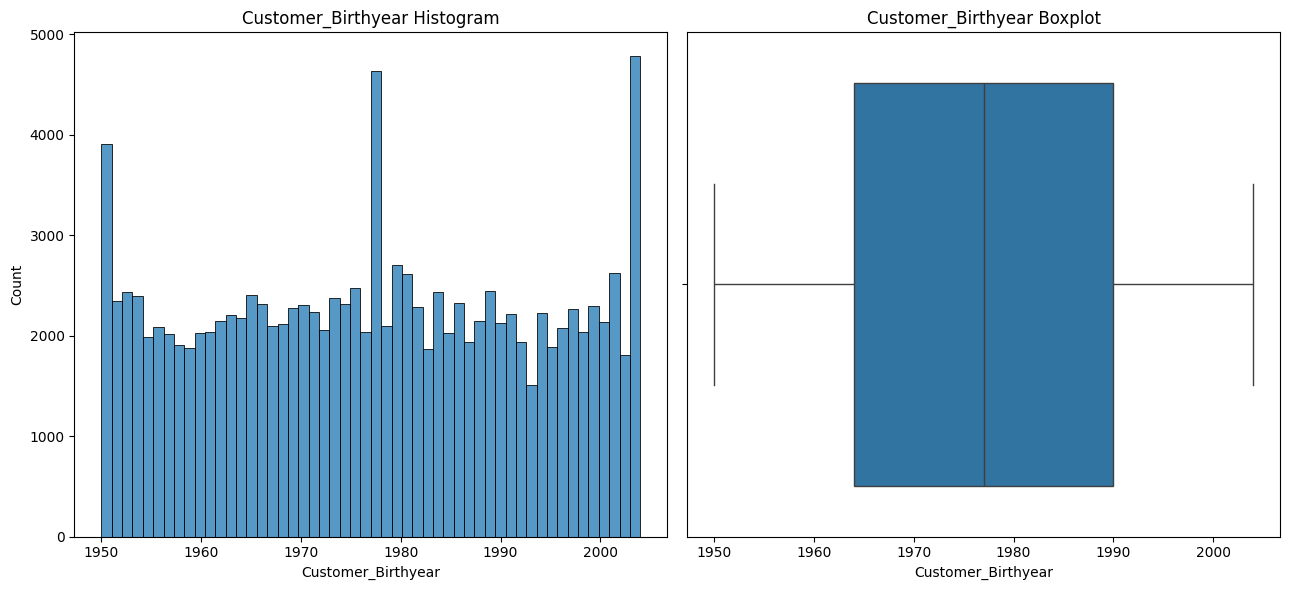

count    120000.000000
mean       1977.101658
std          15.773059
min        1950.000000
25%        1964.000000
50%        1977.000000
75%        1990.000000
max        2004.000000
Name: Customer_Birthyear, dtype: float64

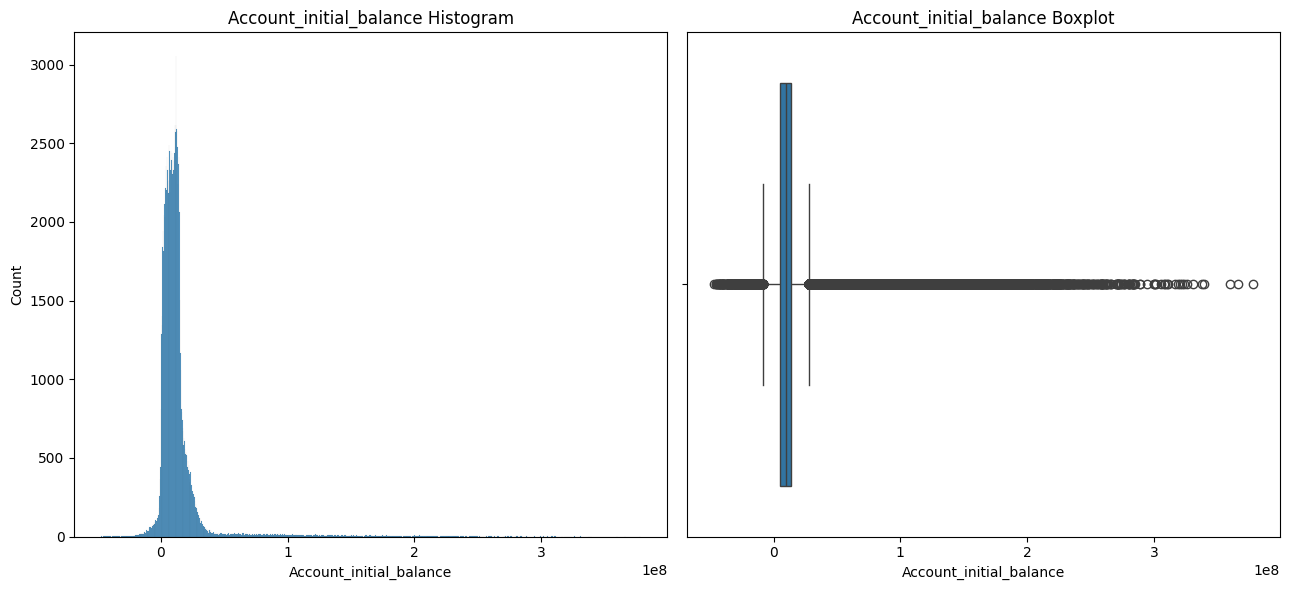

count    1.200000e+05
mean     1.330240e+07
std      2.199931e+07
min     -4.700236e+07
25%      4.981042e+06
50%      9.684951e+06
75%      1.406795e+07
max      3.782943e+08
Name: Account_initial_balance, dtype: float64

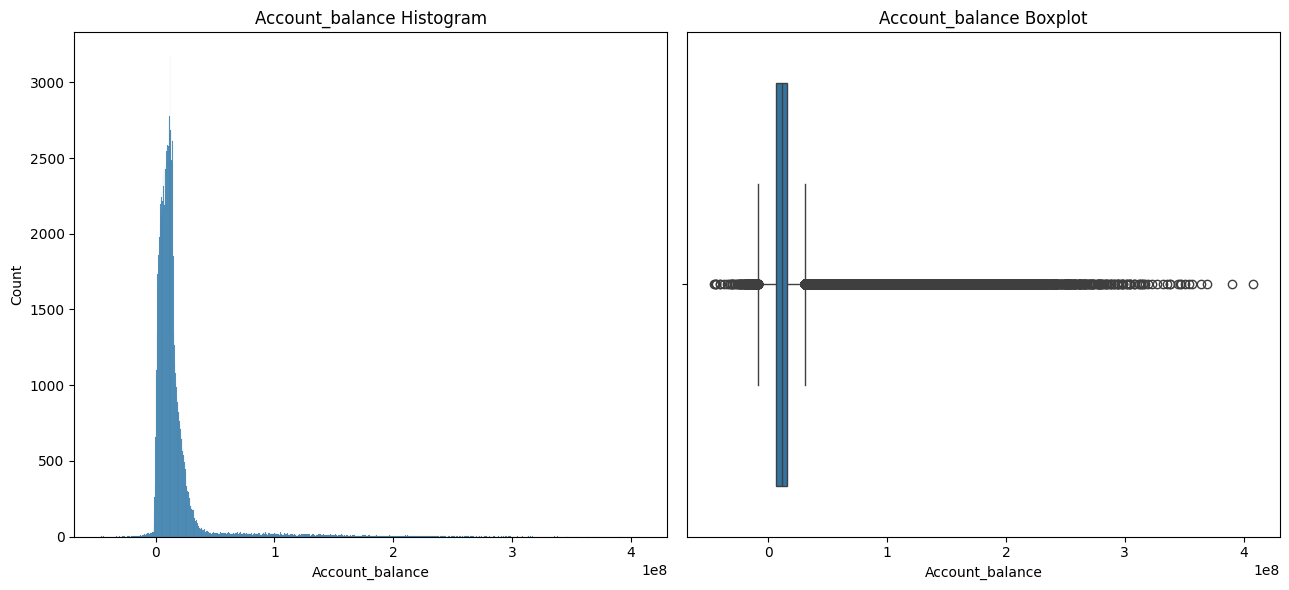

count    1.200000e+05
mean     1.660326e+07
std      2.693023e+07
min     -4.575656e+07
25%      6.161446e+06
50%      1.102199e+07
75%      1.592773e+07
max      4.080248e+08
Name: Account_balance, dtype: float64

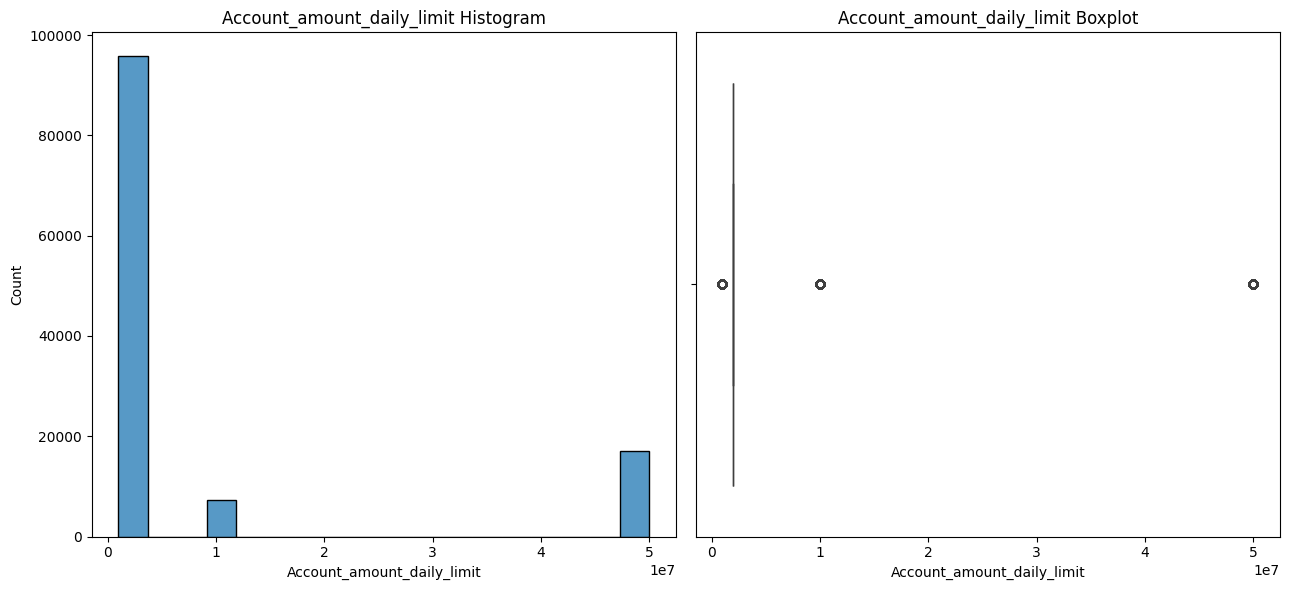

count    1.200000e+05
mean     9.053250e+06
std      1.677538e+07
min      1.000000e+06
25%      2.000000e+06
50%      2.000000e+06
75%      2.000000e+06
max      5.000000e+07
Name: Account_amount_daily_limit, dtype: float64

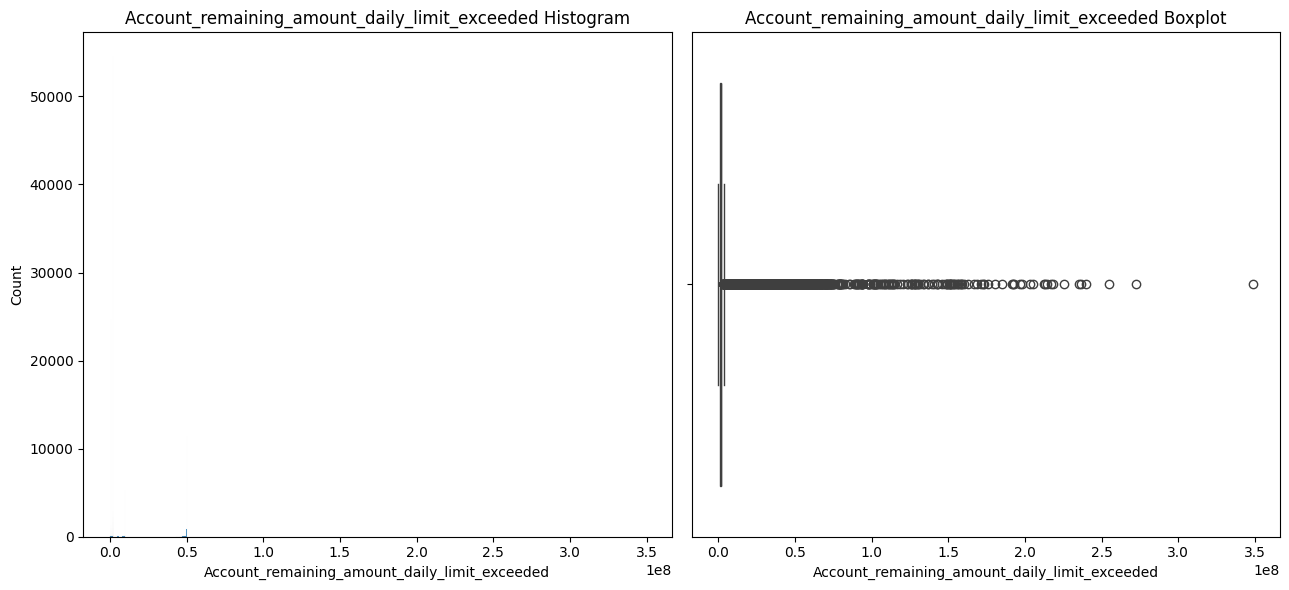

count    1.200000e+05
mean     8.911532e+06
std      1.698785e+07
min      0.000000e+00
25%      1.000000e+06
50%      2.000000e+06
75%      2.000000e+06
max      3.489200e+08
Name: Account_remaining_amount_daily_limit_exceeded, dtype: float64

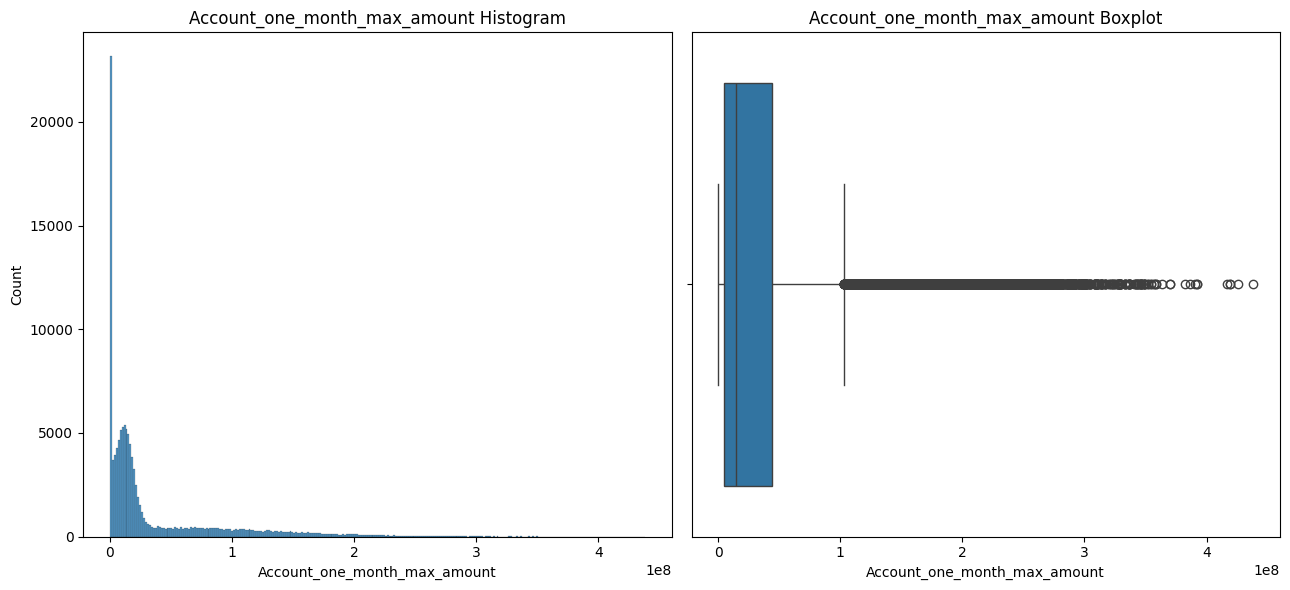

count    1.200000e+05
mean     3.694527e+07
std      5.350791e+07
min      0.000000e+00
25%      4.510000e+06
50%      1.415000e+07
75%      4.404500e+07
max      4.382600e+08
Name: Account_one_month_max_amount, dtype: float64

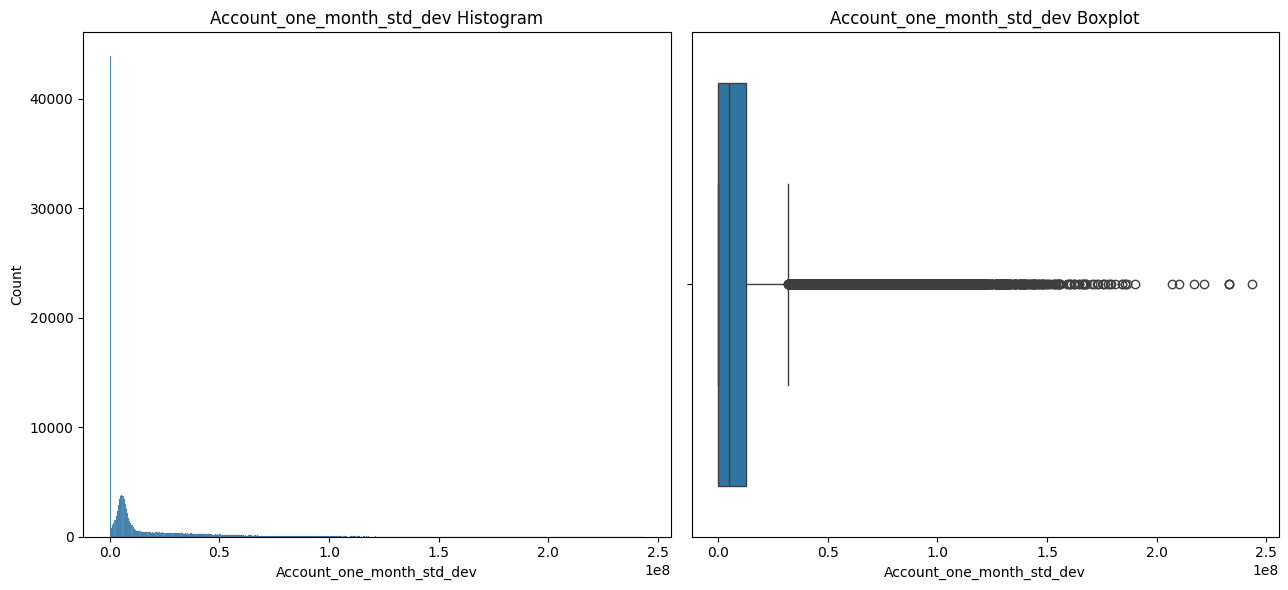

count    1.200000e+05
mean     1.217271e+07
std      1.966096e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.802289e+06
75%      1.282296e+07
max      2.435700e+08
Name: Account_one_month_std_dev, dtype: float64

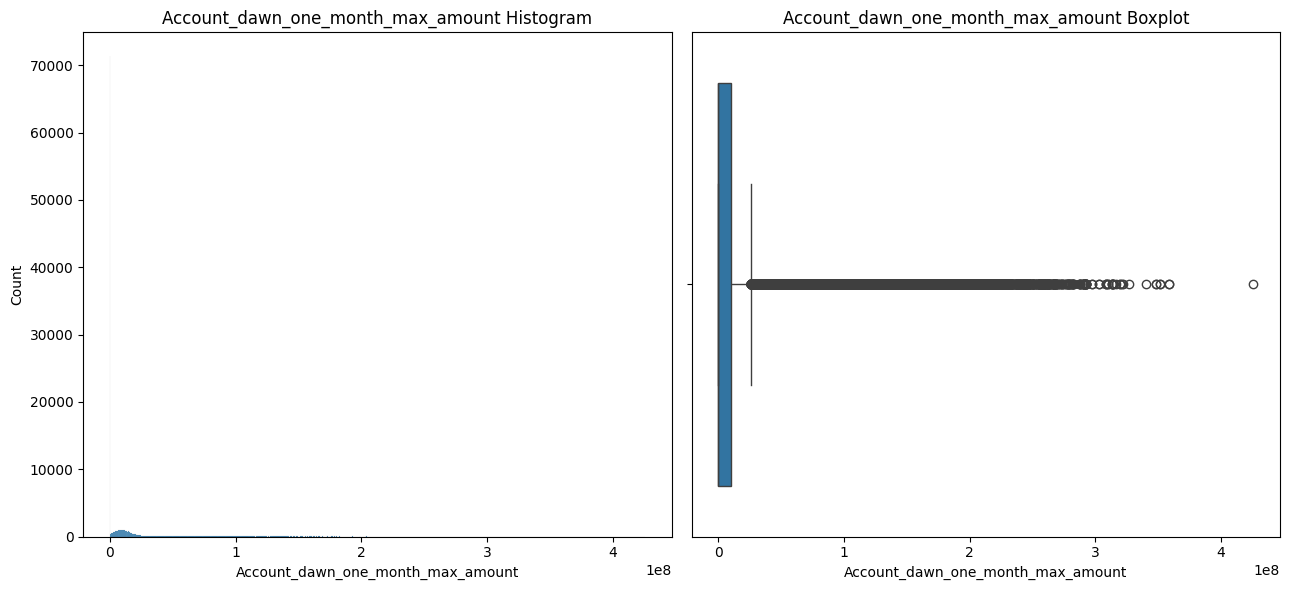

count    1.200000e+05
mean     1.242324e+07
std      3.242350e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.051000e+07
max      4.257800e+08
Name: Account_dawn_one_month_max_amount, dtype: float64

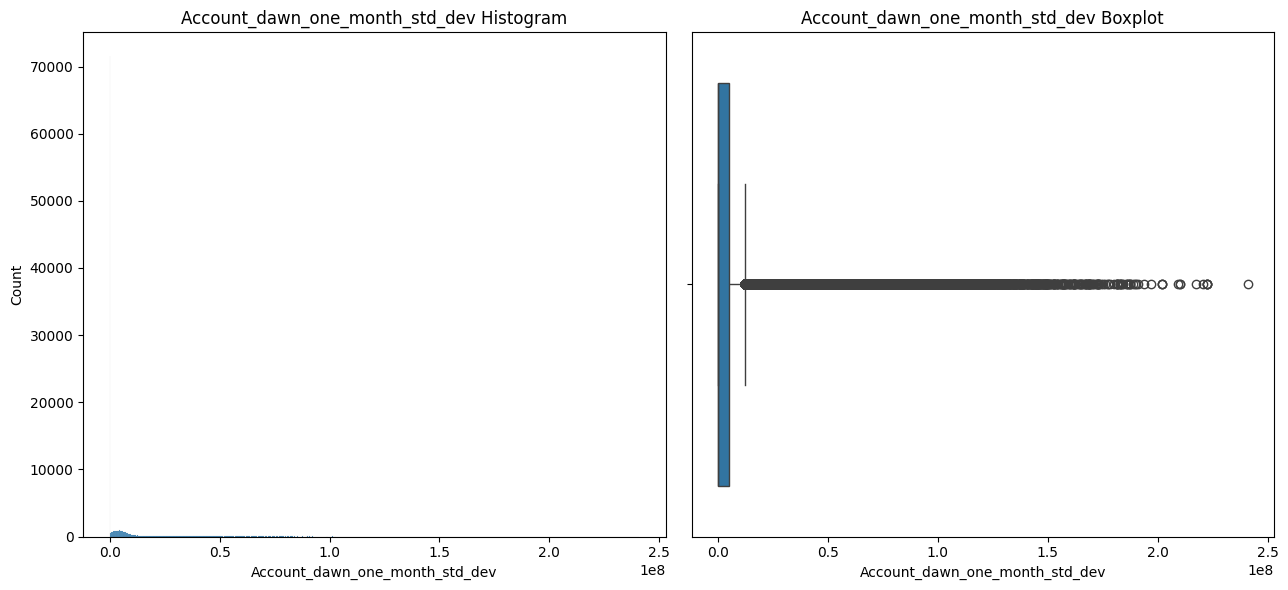

count    1.200000e+05
mean     6.326643e+06
std      1.745005e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.877202e+06
max      2.408052e+08
Name: Account_dawn_one_month_std_dev, dtype: float64

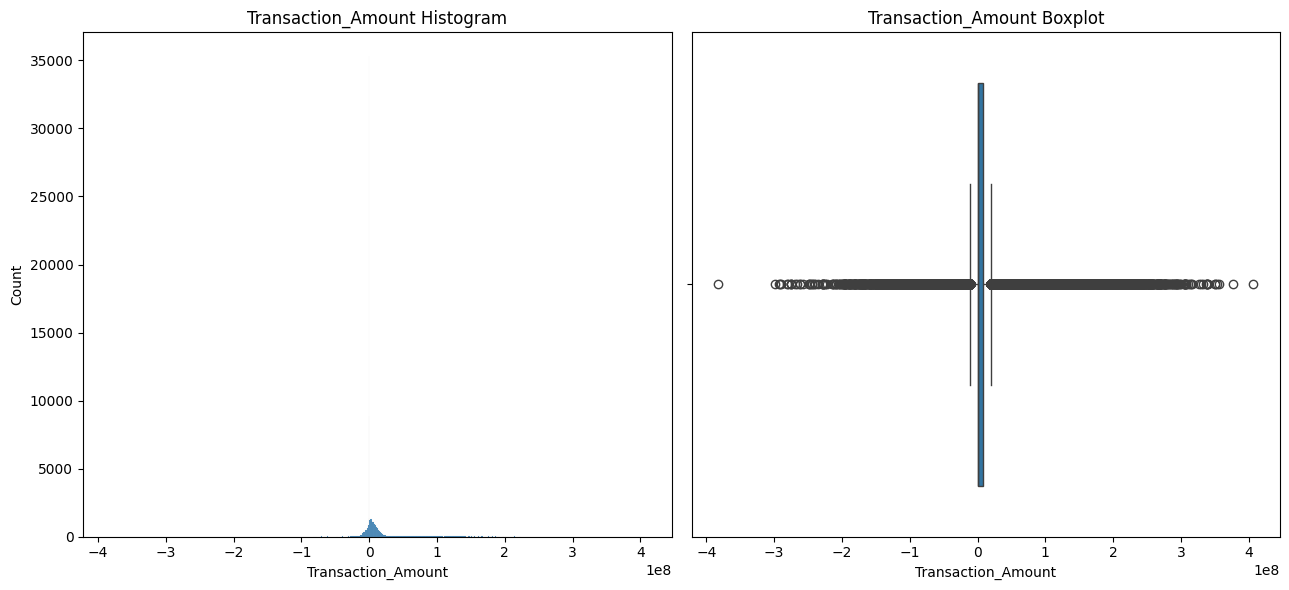

count    1.200000e+05
mean     7.506120e+06
std      2.891830e+07
min     -3.824800e+08
25%     -5.000000e+04
50%      1.600000e+05
75%      7.640000e+06
max      4.066900e+08
Name: Transaction_Amount, dtype: float64

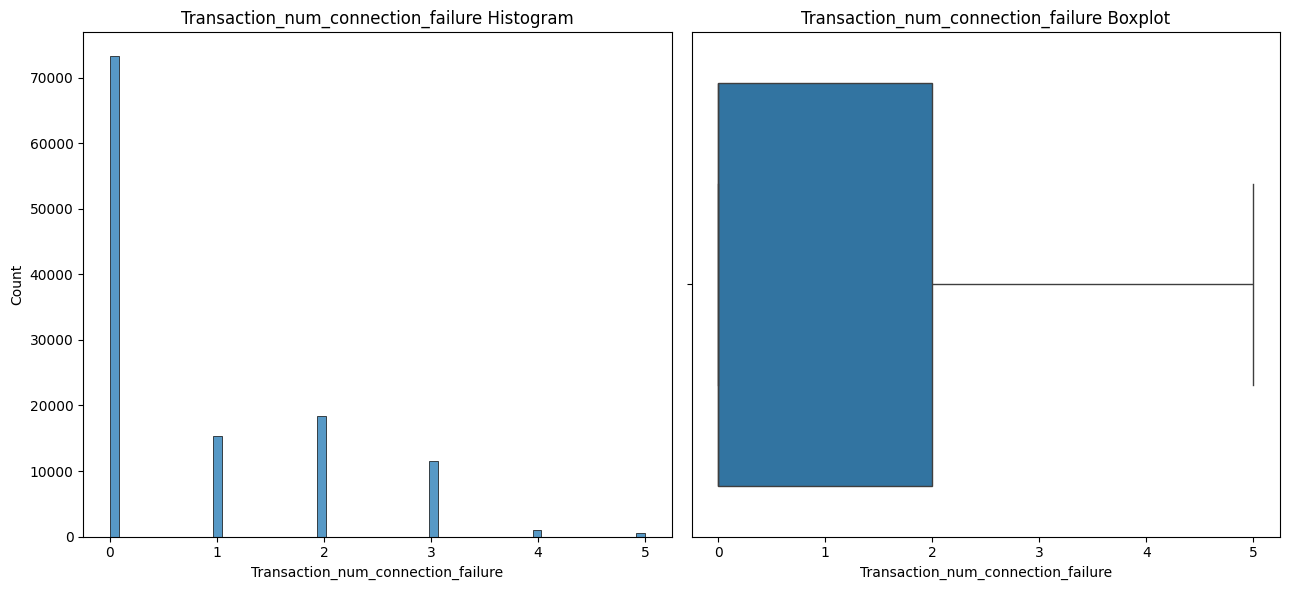

count    120000.000000
mean          0.776125
std           1.112938
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           5.000000
Name: Transaction_num_connection_failure, dtype: float64

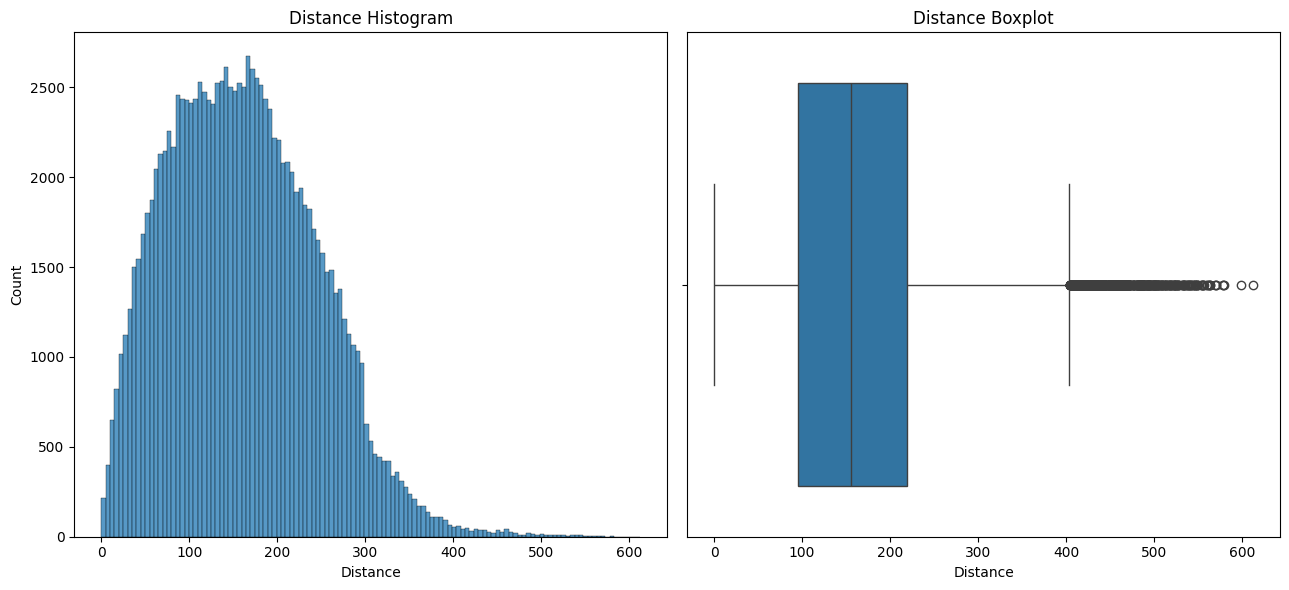

count    120000.000000
mean        161.156262
std          84.087296
min           0.000000
25%          95.530110
50%         155.802819
75%         218.893869
max         612.485680
Name: Distance, dtype: float64

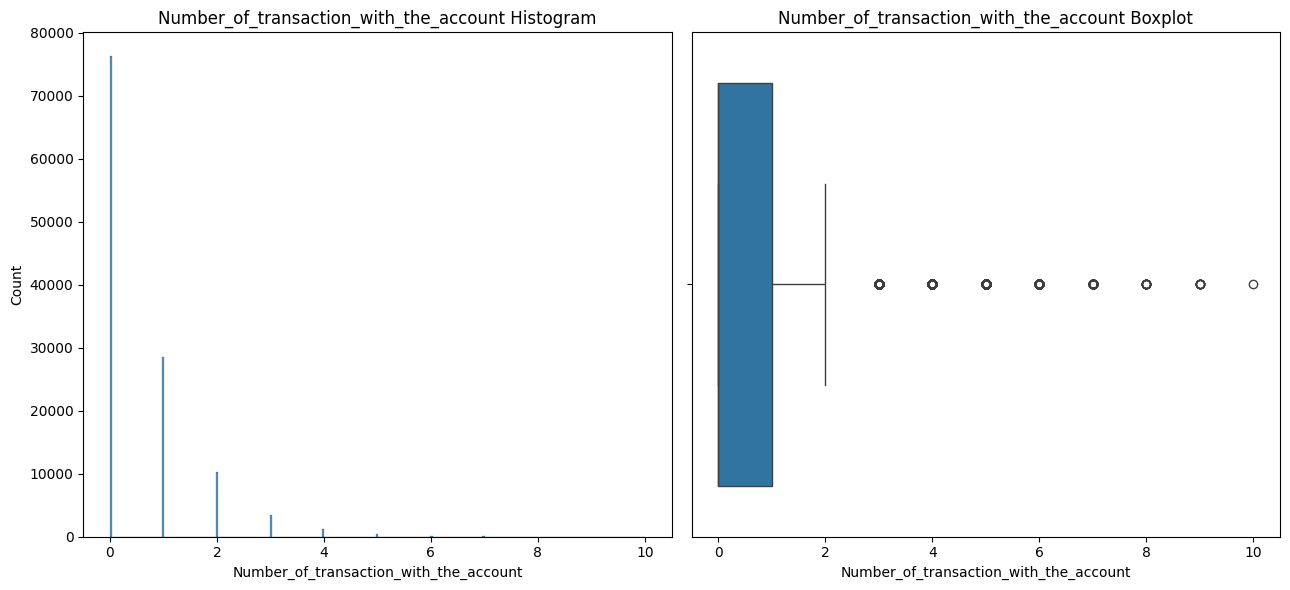

count    120000.000000
mean          0.557517
std           0.909211
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: Number_of_transaction_with_the_account, dtype: float64

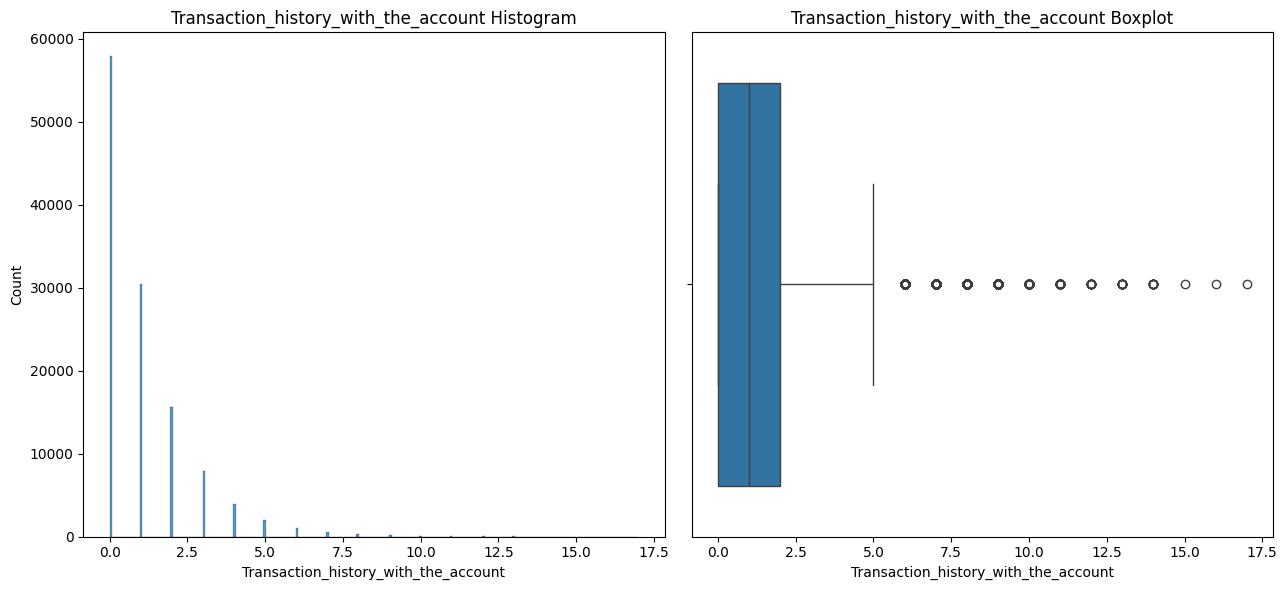

count    120000.000000
mean          1.053767
std           1.457519
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          17.000000
Name: Transaction_history_with_the_account, dtype: float64

In [25]:
for column, col_type in zip(cond_all['항목명'], cond_all['데이터 형태']):

    if col_type == '수치형' and column != 'Time_difference':

       fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

       sns.histplot(data=train_all,
                    x=column,
                    ax=ax[0])
       ax[0].set_title(f'{column} Histogram')

       sns.boxplot(data=train_all,
                   x=column,
                   ax=ax[1])
       ax[1].set_title(f'{column} Boxplot')

       plt.tight_layout()
       plt.show()

       print()
       display(train_all[column].describe())
       print()

### 시간형 변수

In [ ]:
def date_tempo(start_date, end_date, tempo):

    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    date_list = []
    current_date = start_date
    while current_date <= end_date:
        date_list.append(str(current_date.strftime("%Y-%m-%d")))
        current_date += timedelta(days=1)

    date_list = pd.to_datetime(date_list)
    return date_list[::tempo]

- Customer_registration_datetime : 2013Y ~ 2023Y 데이터 없음
- Account_creation_datetime : 2013Y ~ 2023Y 데이터 없음
- Transaction_Datetime : 2050Y 이후 데이터 수 극소수 (2018Y 부근으로 데이터 수 증가)
- Last_atm_transaction_datetime : 2050Y 이후 데이터 수 극소수 (2018Y 부근으로 데이터 수 증가)
- Last_bank_branch_transaction_datetime : 2050Y 이후 데이터 수 극소수 (2018Y 부근으로 데이터 수 증가)
- Transaction_resumed_date : 2050Y 이후 데이터 수 극소수 (2018Y 부근으로 데이터 수 증가)

- Transaction_Datetime : 00시 기준으로 데이터 수가 점차 증가 (00시 기준으로 데이터 수가 급감)

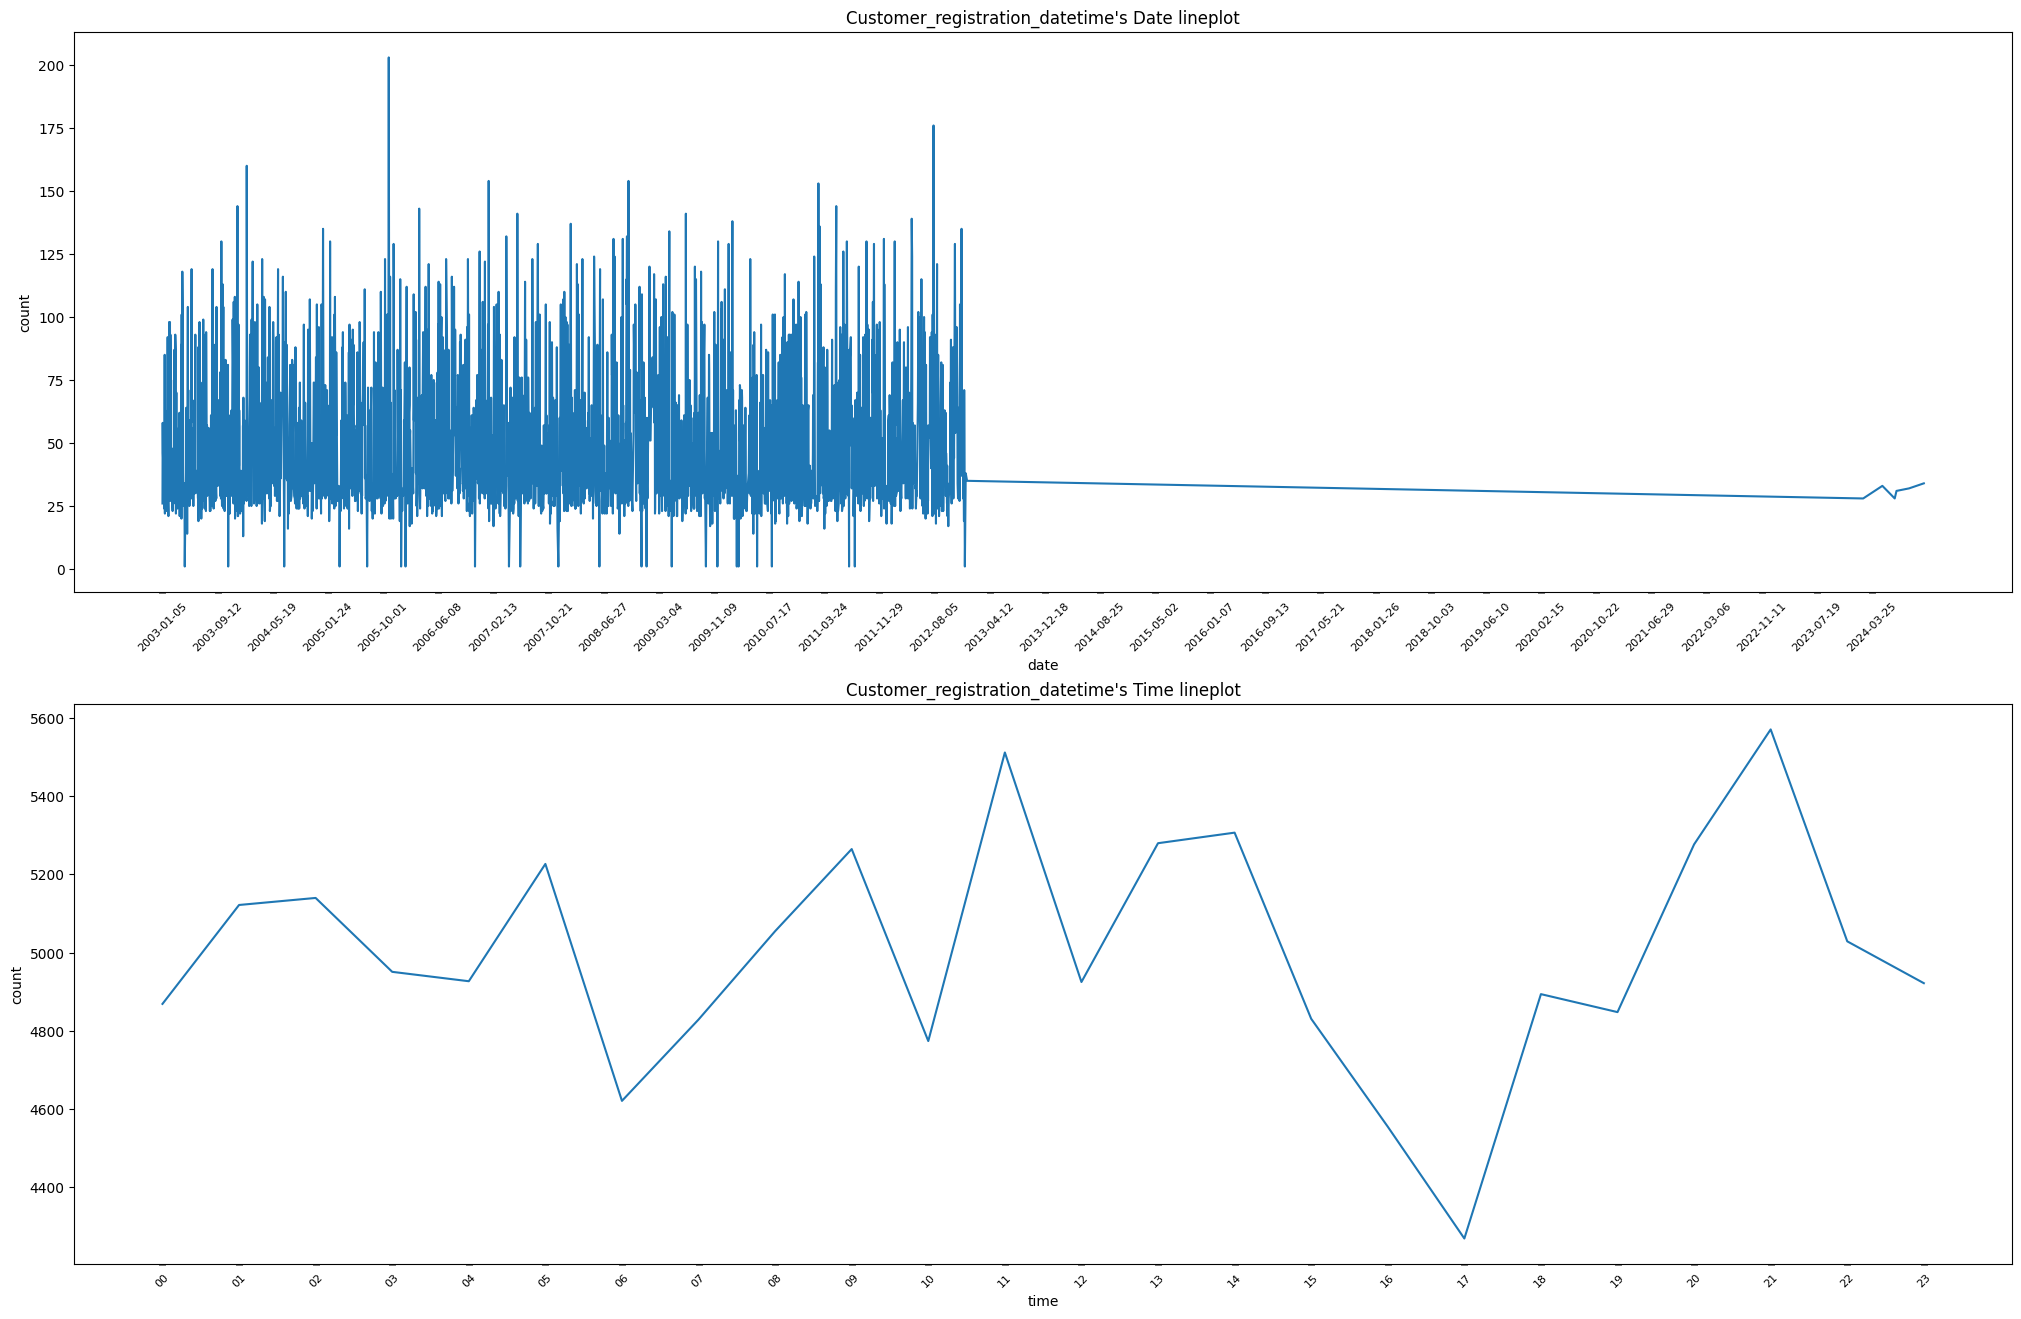

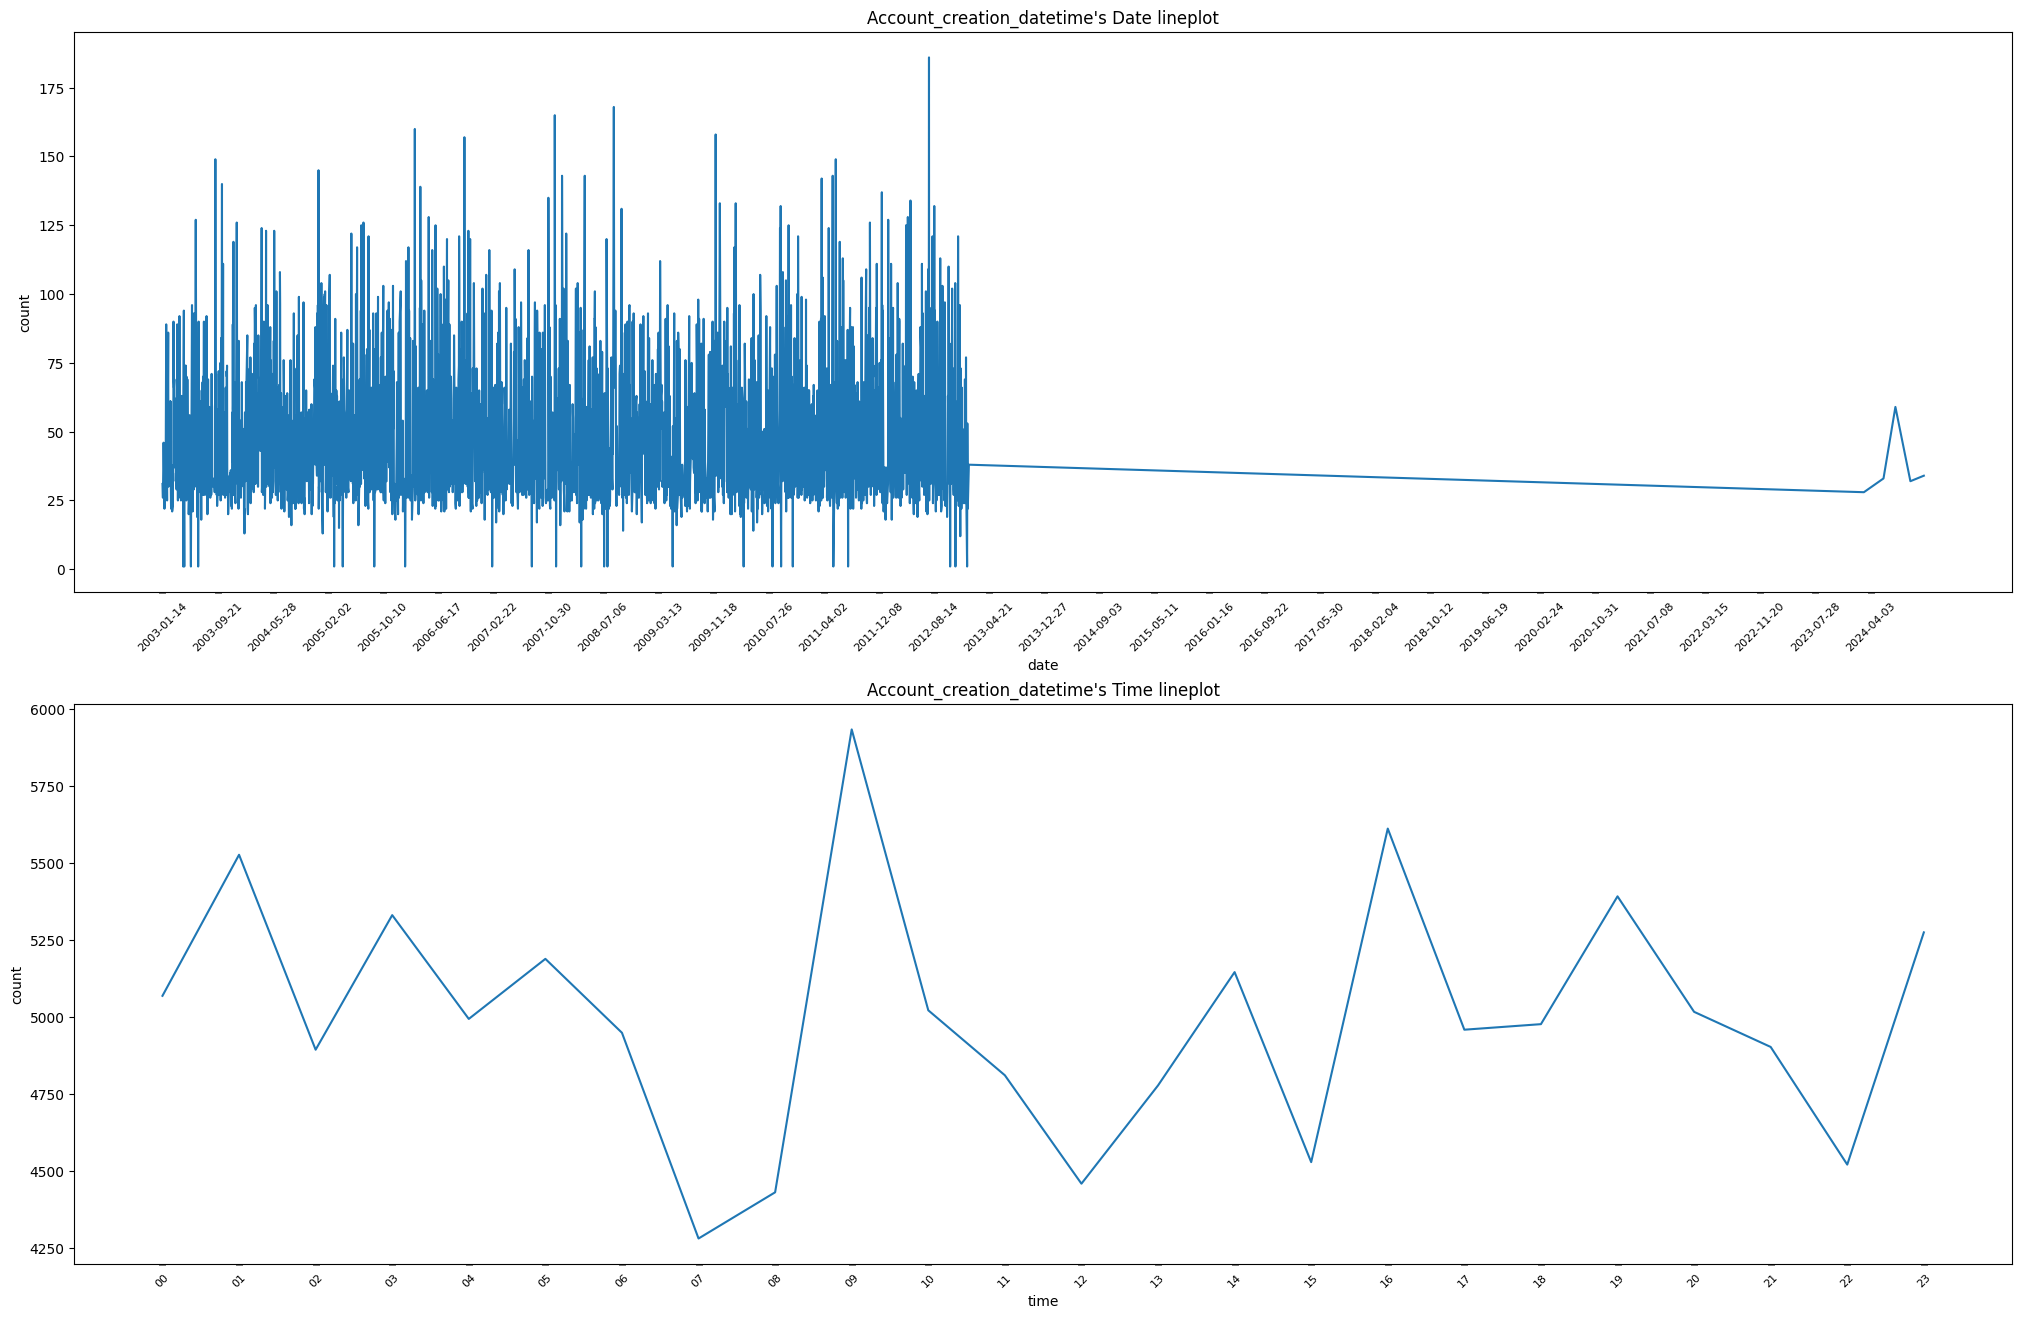

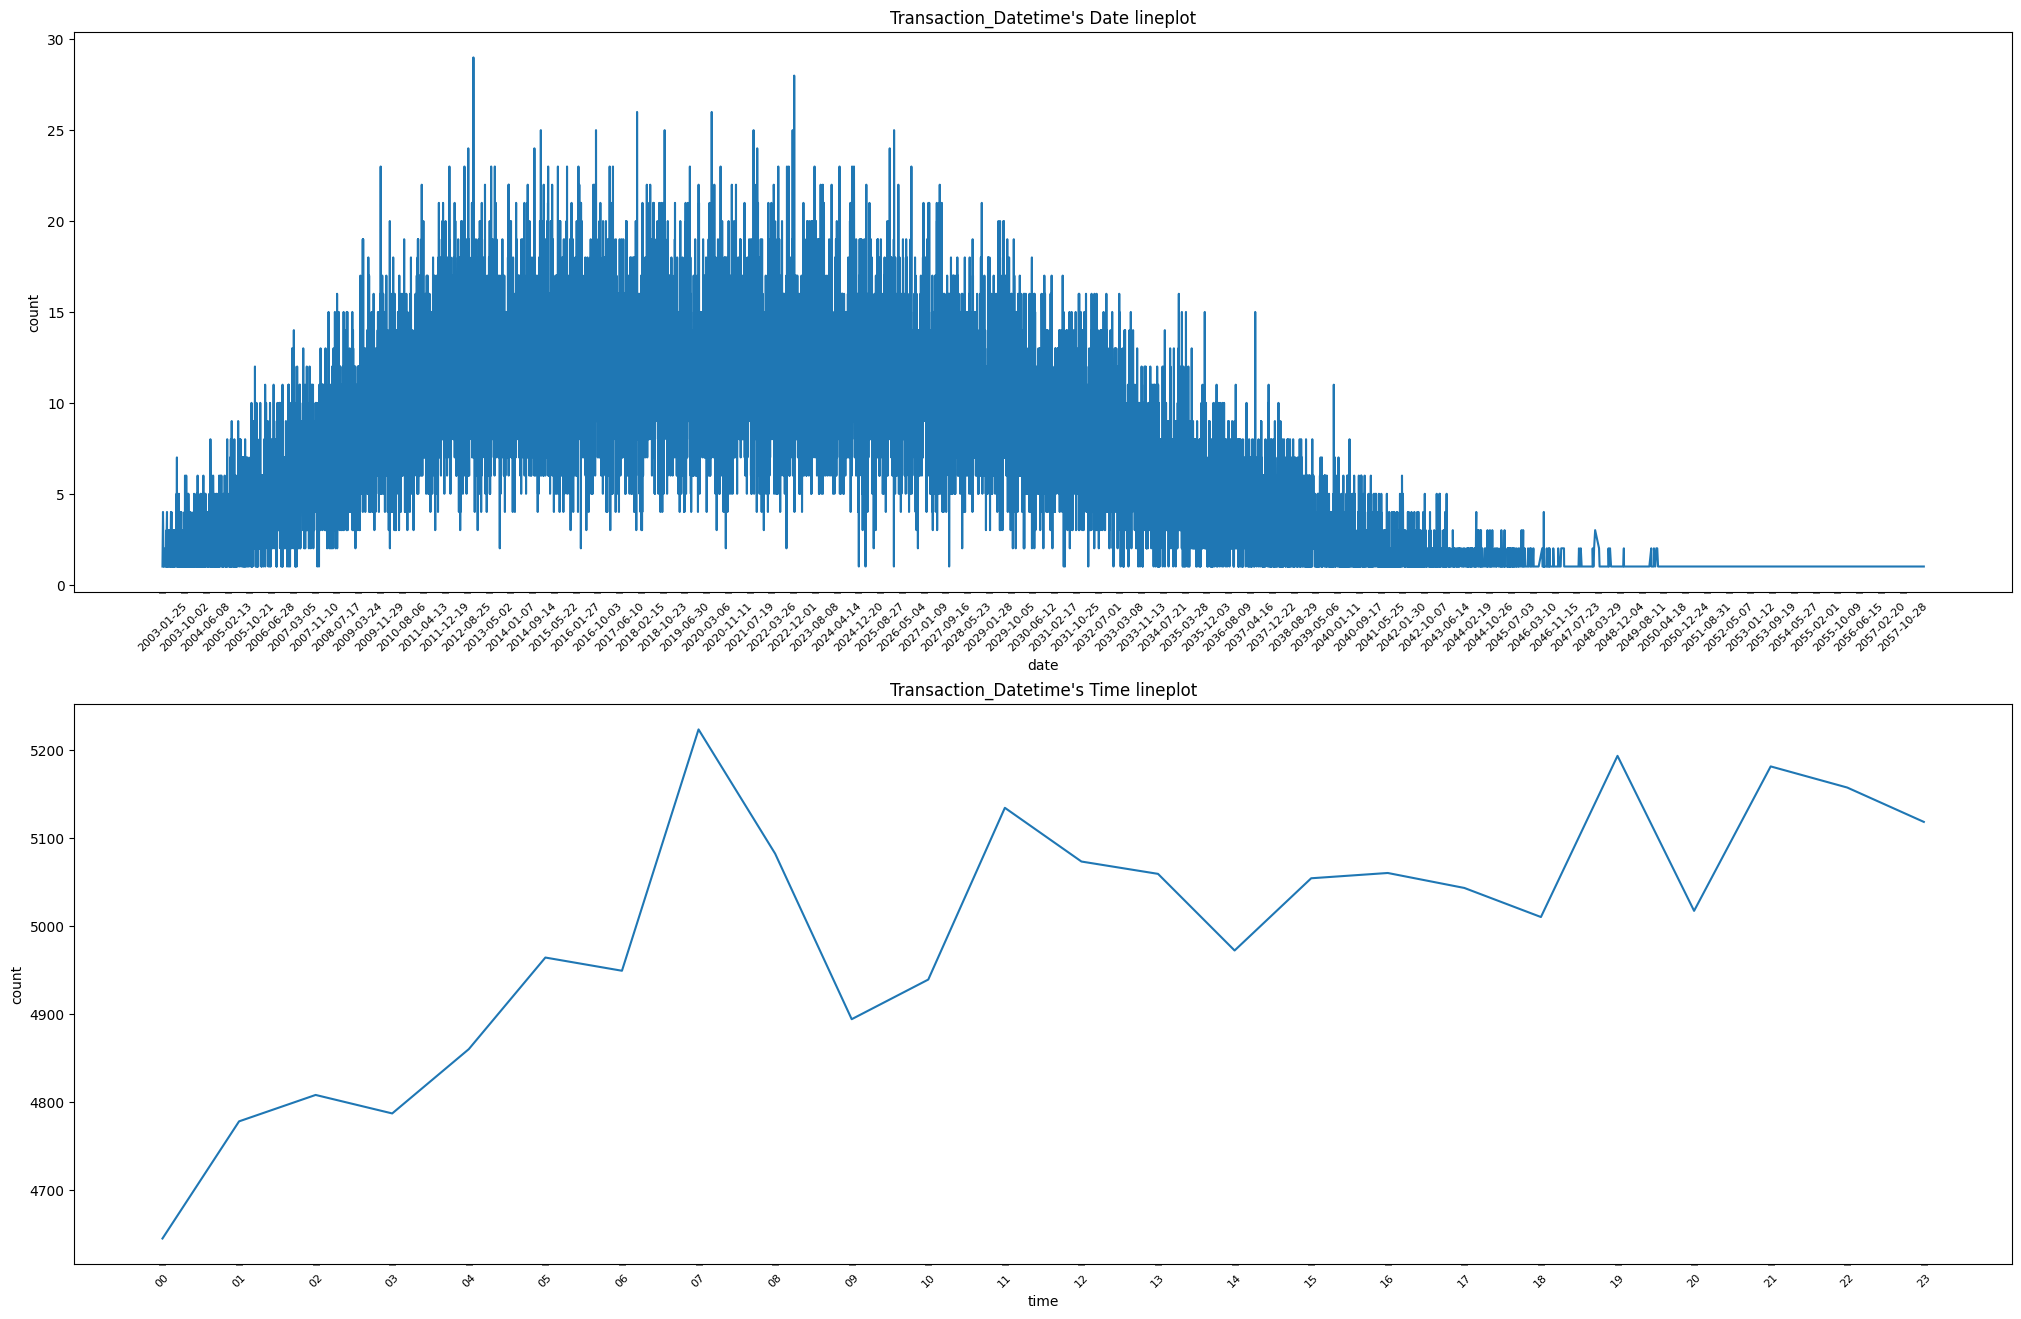

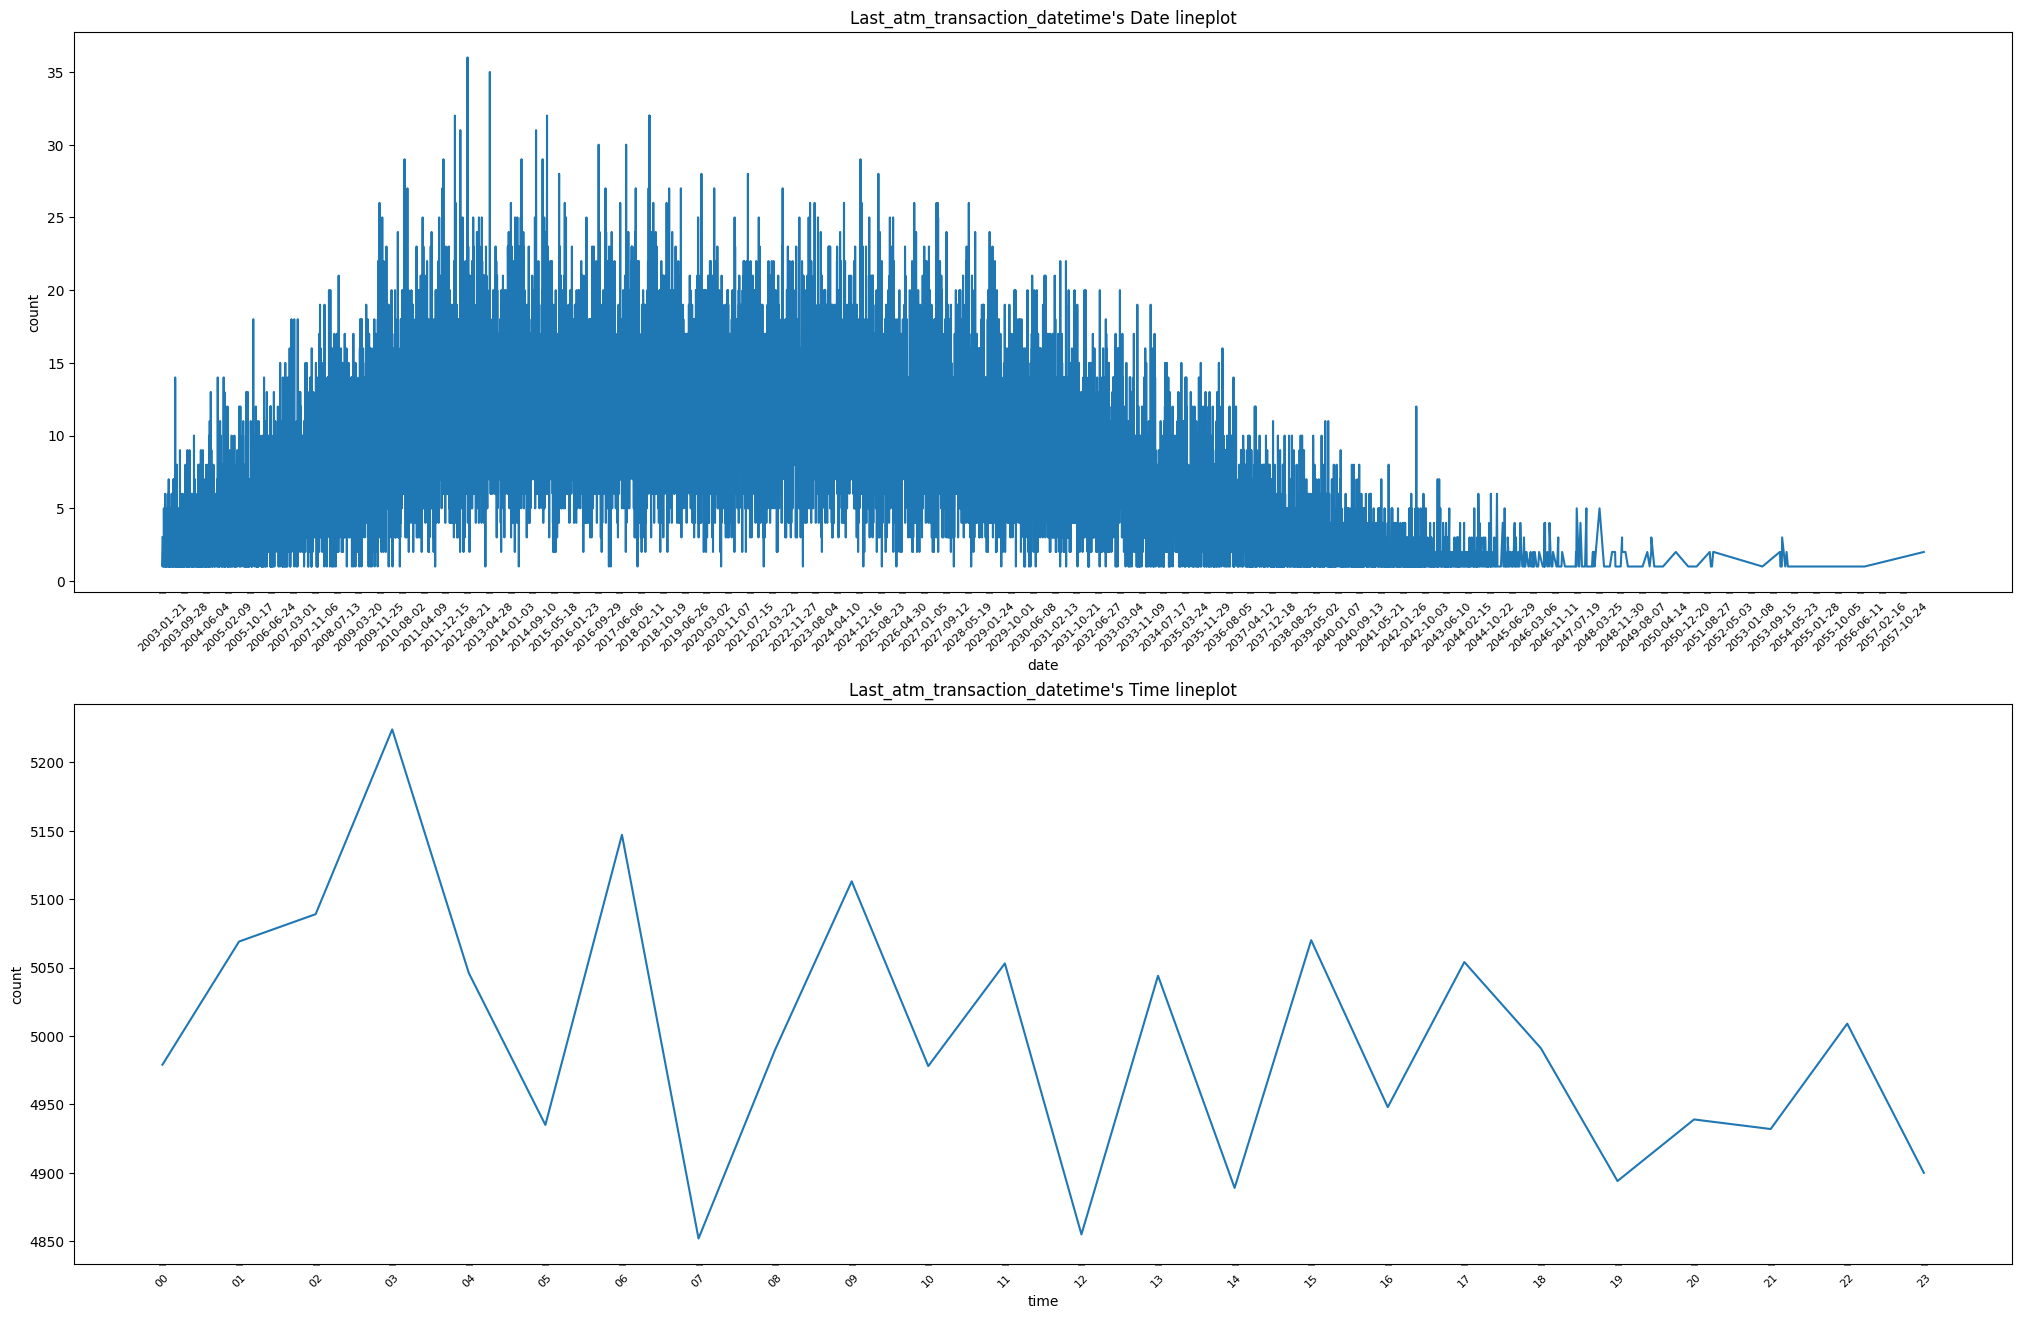

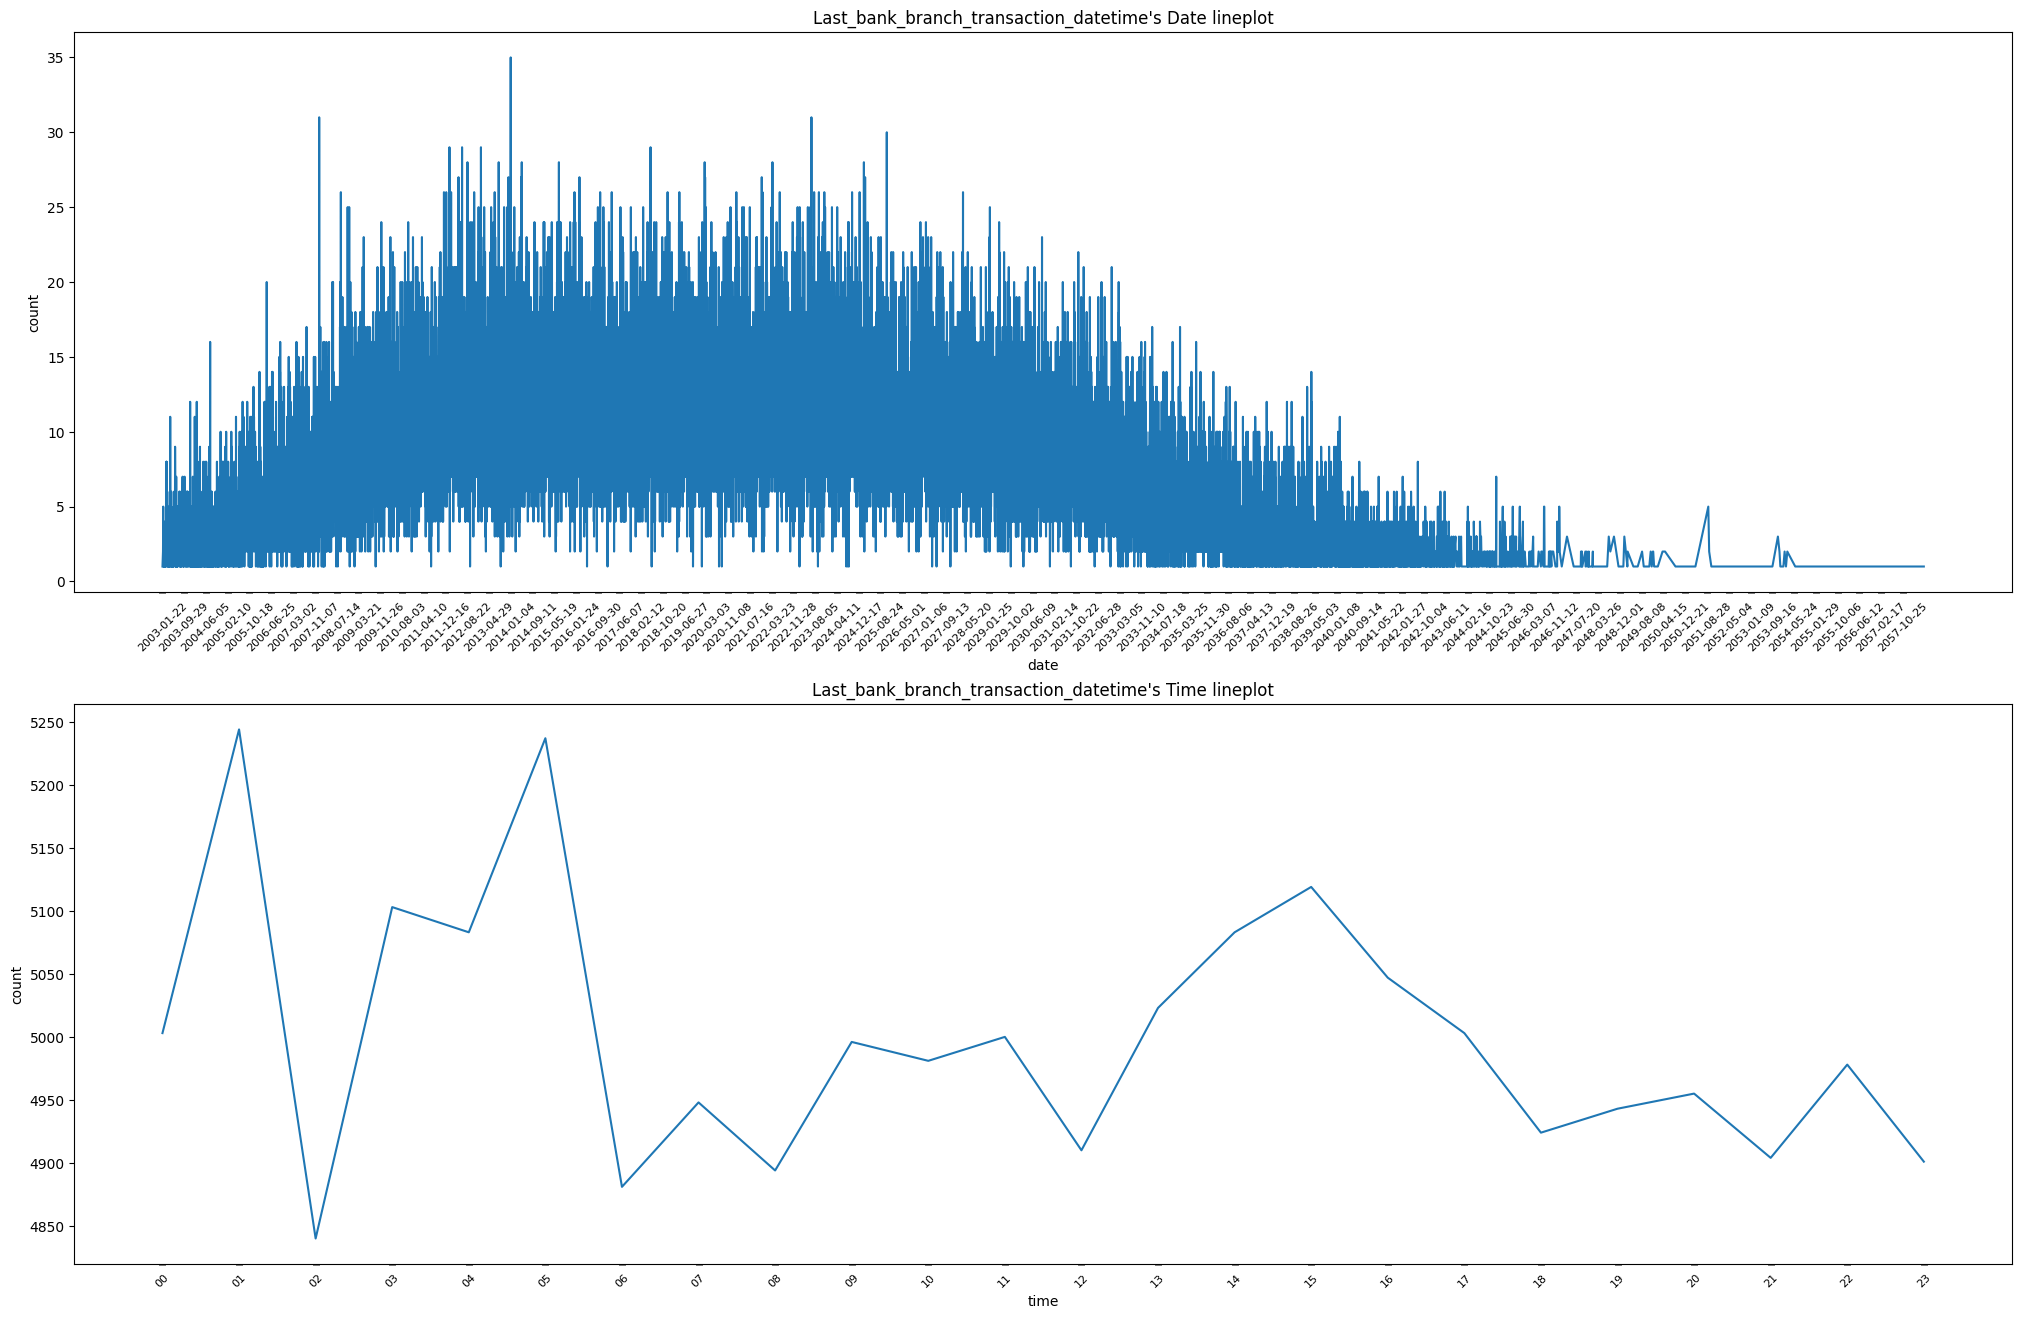

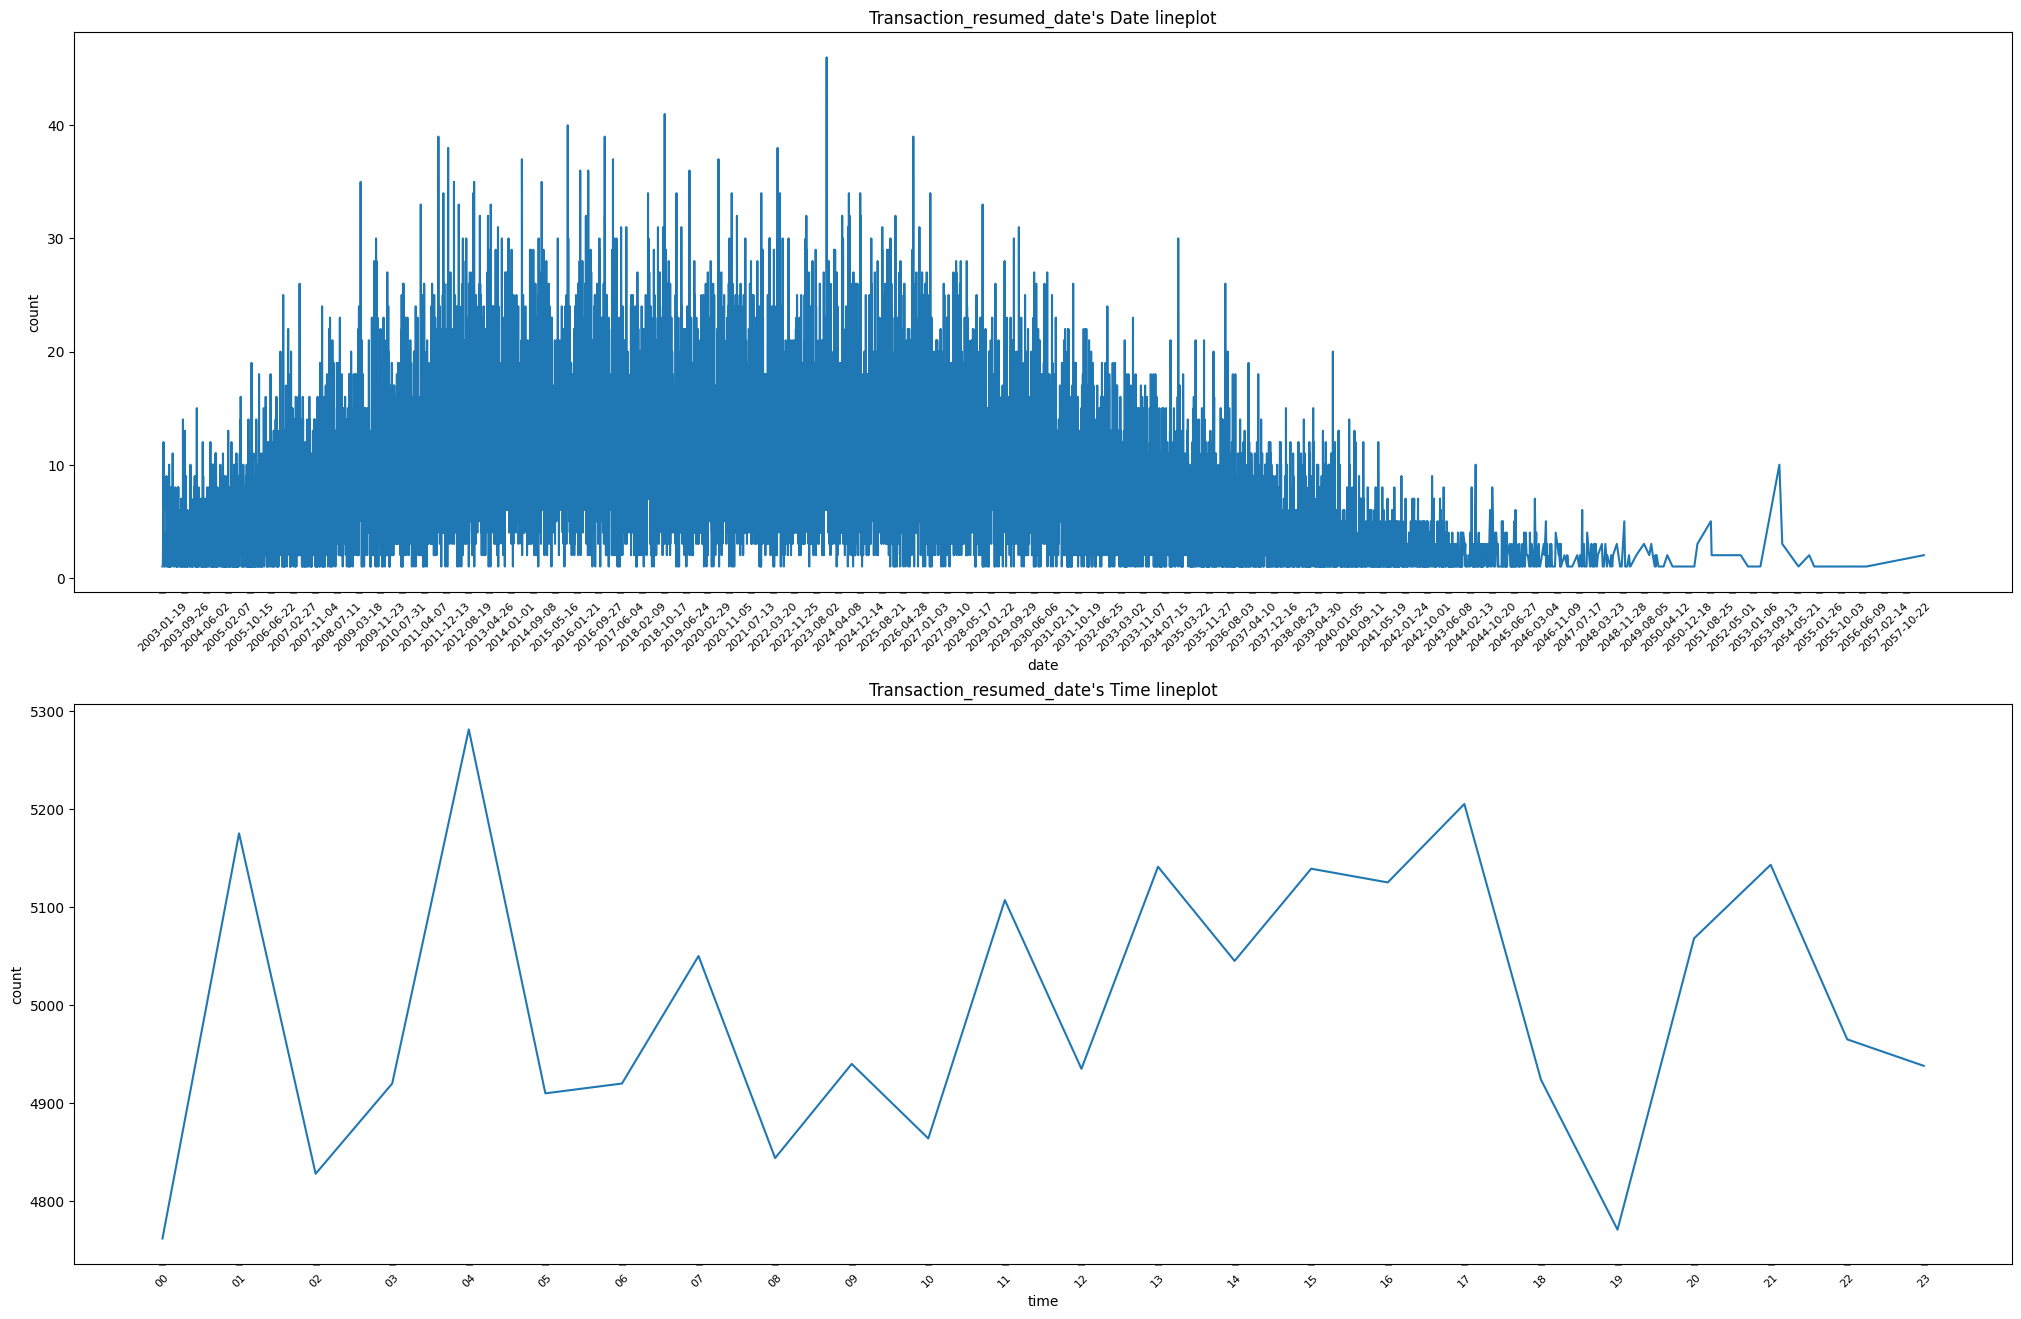

In [ ]:
list_time_columns = ['Customer_registration_datetime',
                     'Account_creation_datetime',
                     'Transaction_Datetime',
                     'Last_atm_transaction_datetime',
                     'Last_bank_branch_transaction_datetime',
                     'Transaction_resumed_date']

for column in list_time_columns:

    train_all['date'] = train_all[column].apply(lambda x : x.split(' ')[0])
    train_all['time'] = train_all[column].apply(lambda x : x.split(' ')[-1].split(':')[0])

    date_count = train_all['date'].value_counts().sort_index()
    time_count = train_all['time'].value_counts().sort_index()

    date_count = pd.DataFrame(date_count)
    time_count = pd.DataFrame(time_count)

    list_date = date_tempo(date_count.index[0], date_count.index[-1], 250)

    fig, ax = plt.subplots(nrows=2, figsize=(25, 16))

    sns.lineplot(data=date_count,
                x=pd.to_datetime(date_count.index),
                y='count',
                ax=ax[0])

    ax[0].set_xticks(list_date)

    ax[0].tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=5,
                  labelsize=8,
                  width=5)
    ax[0].set_title(f"{column}'s Date lineplot")

    sns.lineplot(data=time_count,
                x=time_count.index,
                y='count',
                ax=ax[1])

    ax[1].tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=5,
                  labelsize=8,
                  width=5)
    ax[1].set_title(f"{column}'s Time lineplot")

    plt.show()
    print()

    train_all.drop(columns=['date', 'time'], inplace=True)

In [ ]:
for column in list_time_columns:
    train_all['year'] = train_all[column].apply(lambda x : x.split('-')[0])
    print(f'{column}')
    print(train_all['year'].value_counts().sort_index())
    print()

    train_all.drop(columns=['year'], inplace=True)

Customer_registration_datetime
year
2003    11842
2004    11957
2005    11795
2006    13141
2007    11311
2008    12214
2009    10836
2010    12021
2011    12637
2012    12060
2024      186
Name: count, dtype: int64

Account_creation_datetime
year
2003    11548
2004    11586
2005    12102
2006    12889
2007    11413
2008    12123
2009    10889
2010    12185
2011    12596
2012    12030
2013      453
2024      186
Name: count, dtype: int64

Transaction_Datetime
year
2003     487
2004     813
2005    1292
2006    1688
2007    2149
2008    2670
2009    3144
2010    3448
2011    4041
2012    4458
2013    4470
2014    4416
2015    4437
2016    4479
2017    4224
2018    4460
2019    4247
2020    4313
2021    4368
2022    4421
2023    4308
2024    4297
2025    4237
2026    4039
2027    3963
2028    3785
2029    3619
2030    3383
2031    3083
2032    2862
2033    2570
2034    2082
2035    1913
2036    1636
2037    1443
2038    1190
2039     954
2040     767
2041     509
2042     432
2043     28

In [ ]:
train_all['Time_difference_seconds'] = pd.to_timedelta(train_all['Time_difference']).dt.total_seconds()
train_all['Time_difference_seconds'] = train_all['Time_difference_seconds'].astype(int)

train_all_positive = train_all[train_all['Time_difference_seconds'] > 0]
train_all_negative = train_all[train_all['Time_difference_seconds'] < 0]

- Time_difference : 극단적인 양의 값들을 가지고 있음

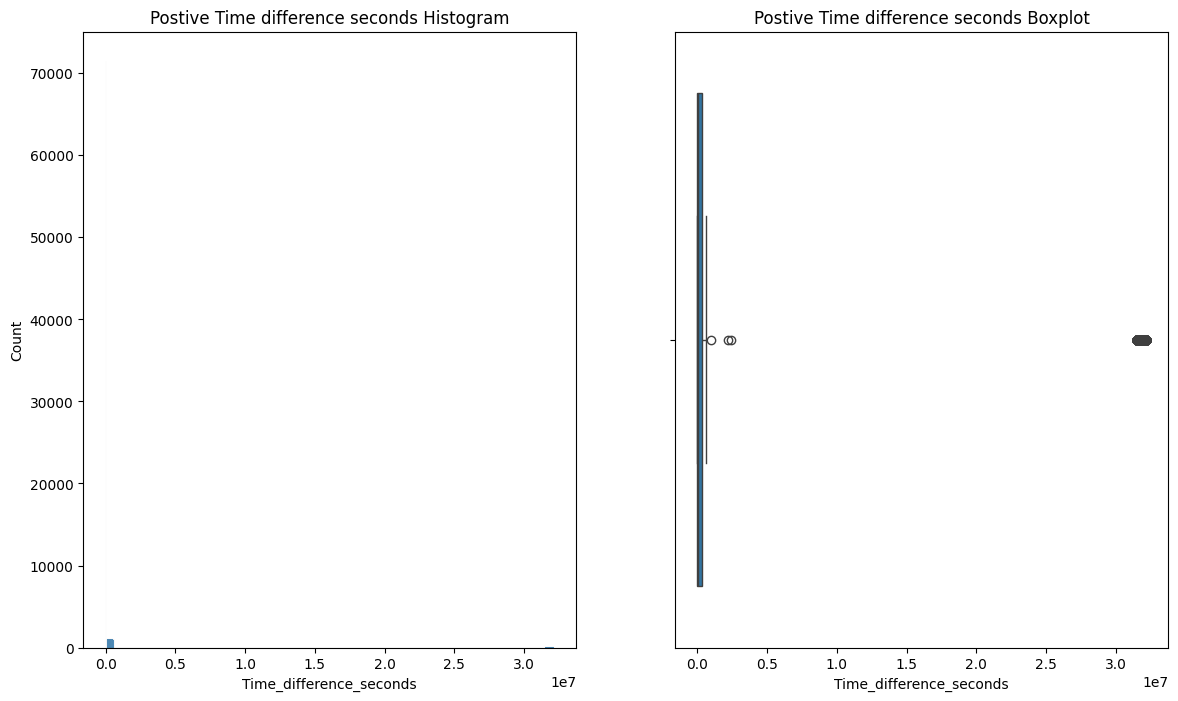

Time_difference_seconds
count             1.198440e+05
mean              1.352704e+06
std               6.096397e+06
min               6.000000e+01
25%               4.700000e+03
50%               9.181500e+03
75%               3.038180e+05
max               3.214080e+07

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

sns.histplot(data=train_all_positive,
             x='Time_difference_seconds',
             ax=ax[0])

ax[0].set_title(f"Postive Time difference seconds Histogram")

sns.boxplot(data=train_all_positive,
             x='Time_difference_seconds',
             ax=ax[1])

ax[1].set_title(f"Postive Time difference seconds Boxplot")

plt.show()

display(train_all_positive[['Time_difference_seconds']].describe())

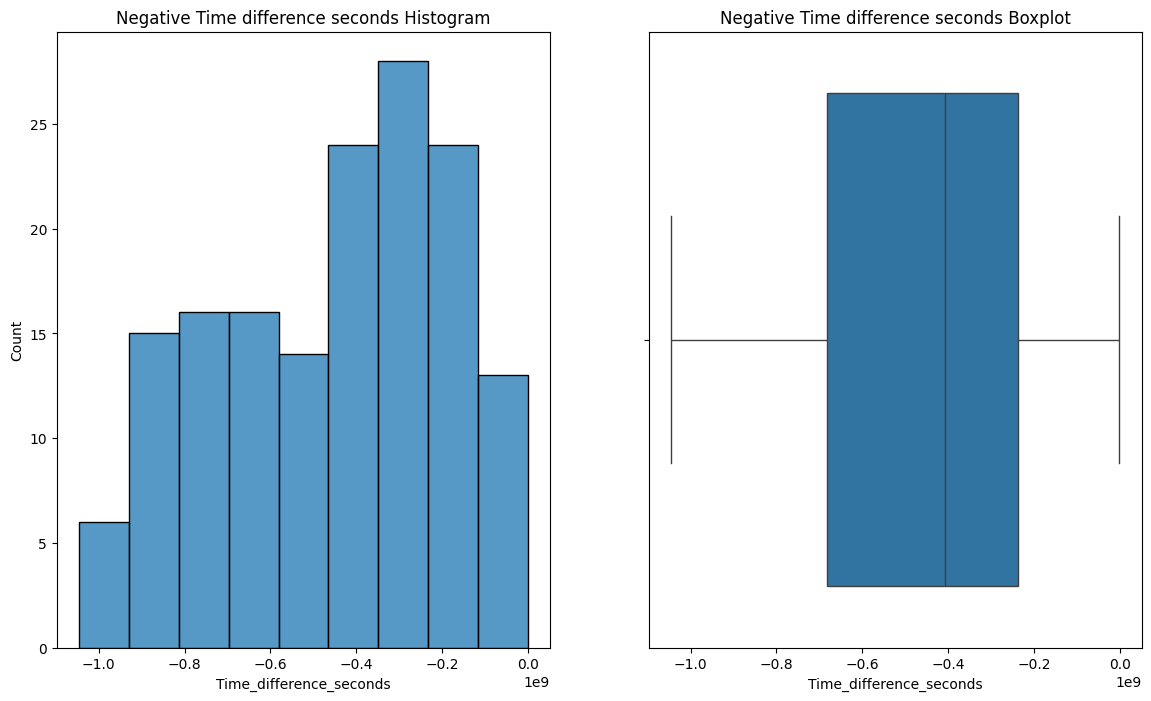

Time_difference_seconds
count             1.560000e+02
mean             -4.562225e+08
std               2.677275e+08
min              -1.045256e+09
25%              -6.816409e+08
50%              -4.072373e+08
75%              -2.378106e+08
max              -3.671010e+05

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

sns.histplot(data=train_all_negative,
             x='Time_difference_seconds',
             ax=ax[0])

ax[0].set_title(f"Negative Time difference seconds Histogram")

sns.boxplot(data=train_all_negative,
             x='Time_difference_seconds',
             ax=ax[1])

ax[1].set_title(f"Negative Time difference seconds Boxplot")

plt.show()

display(train_all_negative[['Time_difference_seconds']].describe())

In [ ]:
q3 = train_all_positive['Time_difference_seconds'].quantile(0.75)
q1 = train_all_positive['Time_difference_seconds'].quantile(0.25)

iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

train_all_positive_outlier = train_all_positive[(train_all_positive['Time_difference_seconds'] >= upper_bound)]
print(train_all_positive_outlier.shape[0])

4607


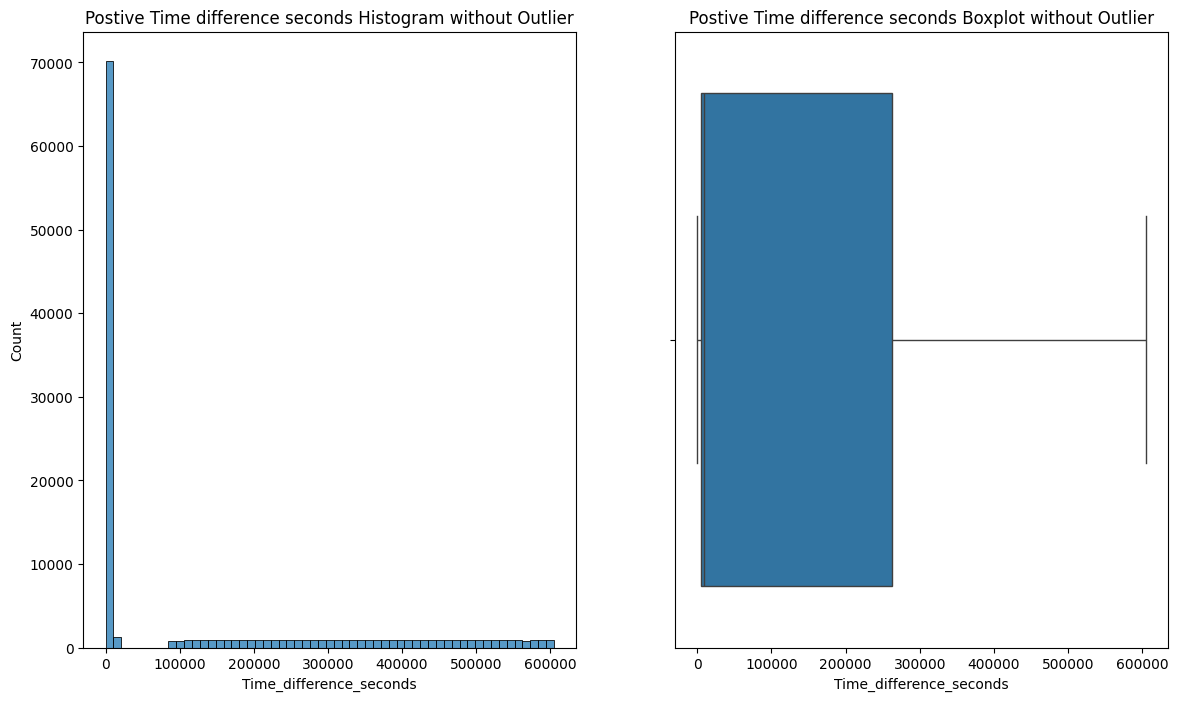

Time_difference_seconds
count            115237.000000
mean             134710.382629
std              189071.815258
min                  60.000000
25%                4534.000000
50%                8845.000000
75%              263133.000000
max              604849.000000

In [ ]:
train_all_positive_normality = train_all_positive[(train_all_positive['Time_difference_seconds'] < upper_bound)]

fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

sns.histplot(data=train_all_positive_normality,
             x='Time_difference_seconds',
             ax=ax[0])

ax[0].set_title(f"Postive Time difference seconds Histogram without Outlier")

sns.boxplot(data=train_all_positive_normality,
             x='Time_difference_seconds',
             ax=ax[1])

ax[1].set_title(f"Postive Time difference seconds Boxplot without Outlier")

plt.show()

display(train_all_positive_normality[['Time_difference_seconds']].describe())

In [ ]:
train_all.drop(columns=['Time_difference_seconds'], inplace=True)

## 이상 거래 변수

In [ ]:
train_all['Fraud_Type'].value_counts().sort_index()

Fraud_Type
a       100
b       100
c       100
d       100
e       100
f       100
g       100
h       100
i       100
j       100
k       100
l       100
m    118800
Name: count, dtype: int64

In [ ]:
train_all_m = train_all[(train_all['Fraud_Type'] == 'm')]
train_all_non_m = train_all[(train_all['Fraud_Type'] != 'm')]

In [ ]:
hue_order = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

**사기 유형이 M인 경우** (아에 없는 데이터도 함께 고려할 것)
- Customer_credit_rating : S, D, E 경우가 상대적으로 적음
- Customer_flag_change_of_authentication_1 : 0인 경우가 상대적으로 적음
- Customer_flag_change_of_authentication_2 : 0인 경우가 상대적으로 적음
- Customer_flag_change_of_authentication_3 : 0인 경우가 상대적으로 적음
- Customer_flag_change_of_authentication_4 : 0인 경우가 상대적으로 적음
- Customer_rooting_jailbreak_indicator : 1인 경우가 상대적으로 적음
- Customer_mobile_roaming_indicator : 1인 경우가 상대적으로 적음
- Customer_VPN_Indicator : 1인 경우가 상대적으로 적음
- Customer_loan_type : e, d인 경우가 상대적으로 적음
- Customer_flag_terminal_malicious_behavior_1 : 1인 경우가 상대적으로 적음
- Customer_flag_terminal_malicious_behavior_2 : 1인 경우가 상대적으로 적음
- Customer_flag_terminal_malicious_behavior_3 : 1인 경우가 상대적으로 적음
- Customer_flag_terminal_malicious_behavior_4 : 1인 경우가 상대적으로 적음
- Customer_flag_terminal_malicious_behavior_5 : 1인 경우가 상대적으로 적음
- Customer_flag_terminal_malicious_behavior_6 : 1인 경우가 상대적으로 적음
- Customer_inquery_atm_limit : 0인 경우가 상대적으로 적음
- Customer_increase_atm_limit : 0인 경우가 상대적으로 적음
- Account_indicator_release_limit_excess : 1인 경우가 상대적으로 적음
- Account_indicator_Openbanking : 0인 경우가 상대적으로 적음
- Operating_System : Android, Linux, iOS, macOS인 경우가 상대적으로 적음
- Error_Code : c인 경우가 상대적으로 적음
-Transaction_Failure_Status : 1인 경우가 상대적으로 적음
- Type_General_Automatic : automatic인 경우가 상대적으로 적음
- Access_Medium : c, d, e, f, g인 경우가 상대적으로 적음
- Unused_terminal_status : 0인 경우가 상대적으로 적음
- First_time_iOS_by_vulnerable_user : 1인 경우가 상대적으로 적음


변수 명 : Customer_Gender


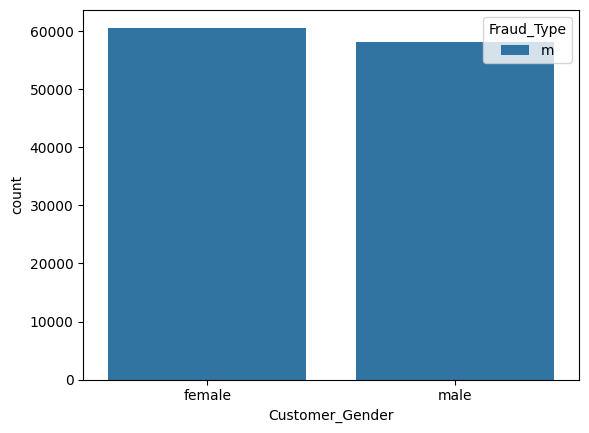


변수 명 : Customer_credit_rating


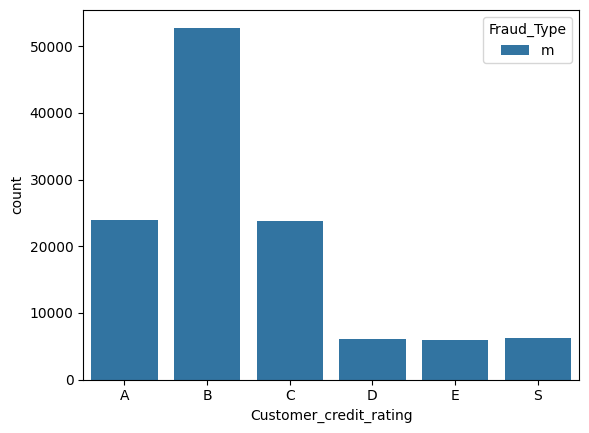


변수 명 : Customer_flag_change_of_authentication_1


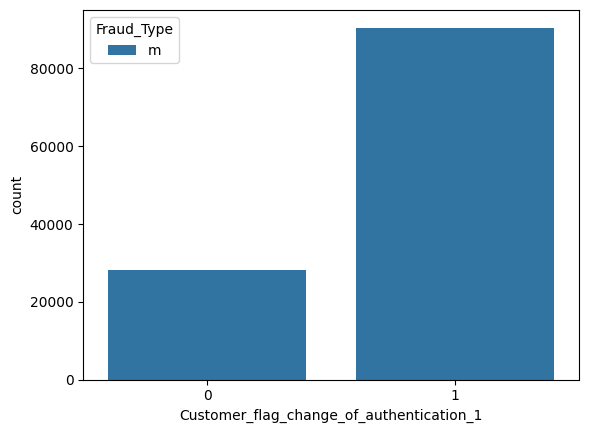


변수 명 : Customer_flag_change_of_authentication_2


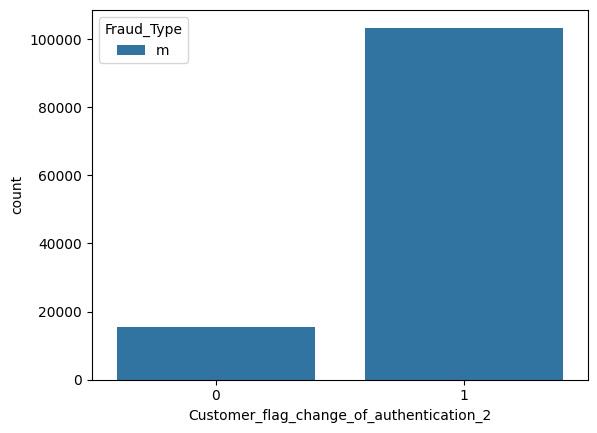


변수 명 : Customer_flag_change_of_authentication_3


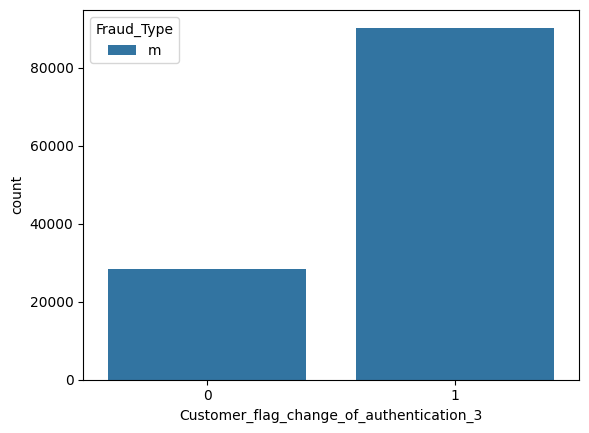


변수 명 : Customer_flag_change_of_authentication_4


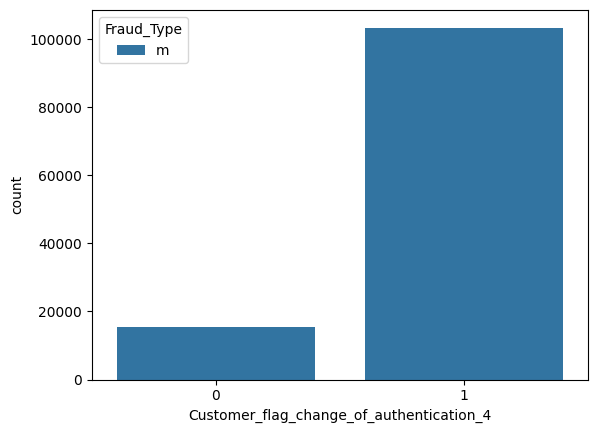


변수 명 : Customer_rooting_jailbreak_indicator


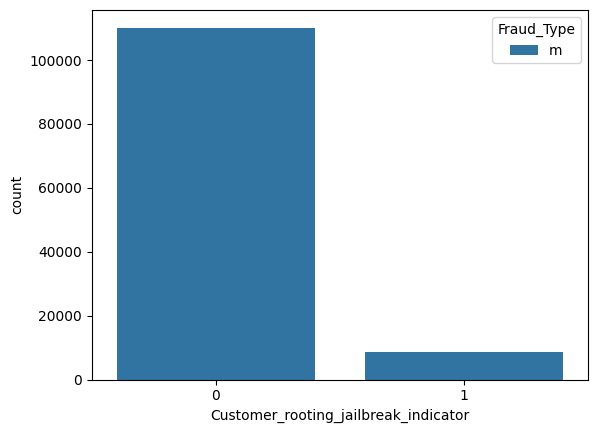


변수 명 : Customer_mobile_roaming_indicator


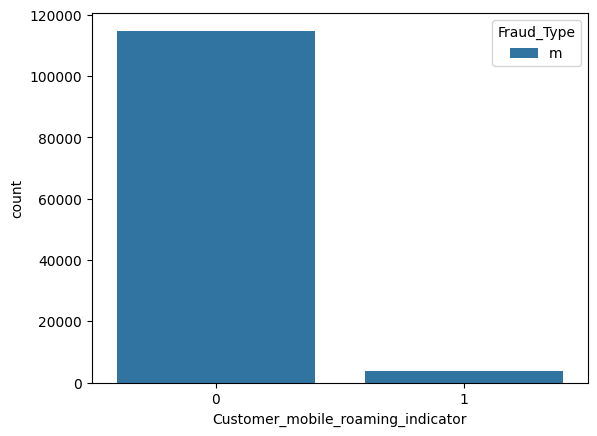


변수 명 : Customer_VPN_Indicator


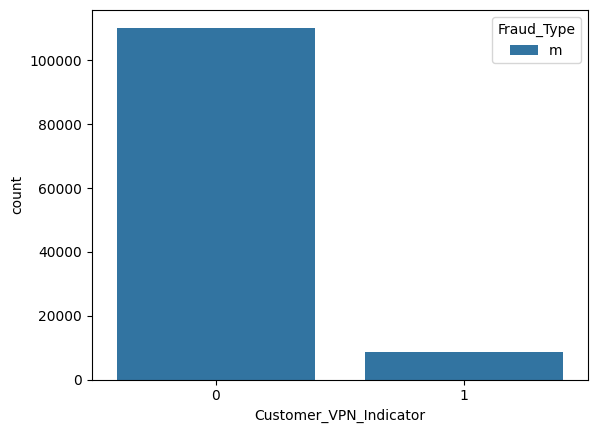


변수 명 : Customer_loan_type


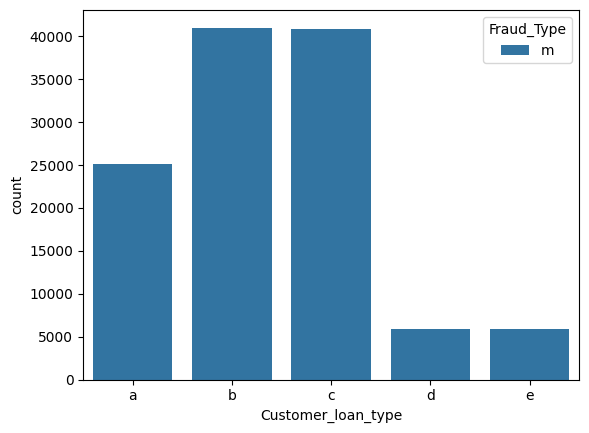


변수 명 : Customer_flag_terminal_malicious_behavior_1


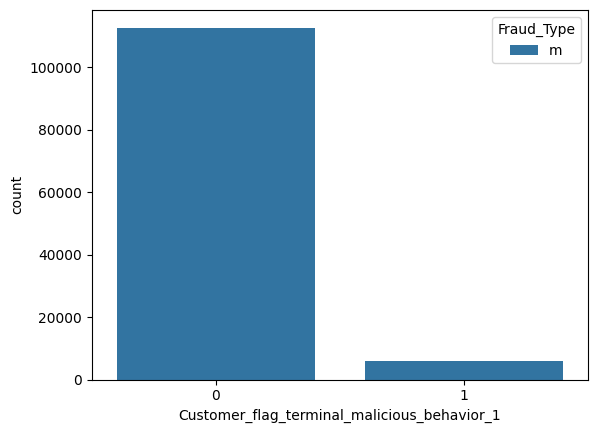


변수 명 : Customer_flag_terminal_malicious_behavior_2


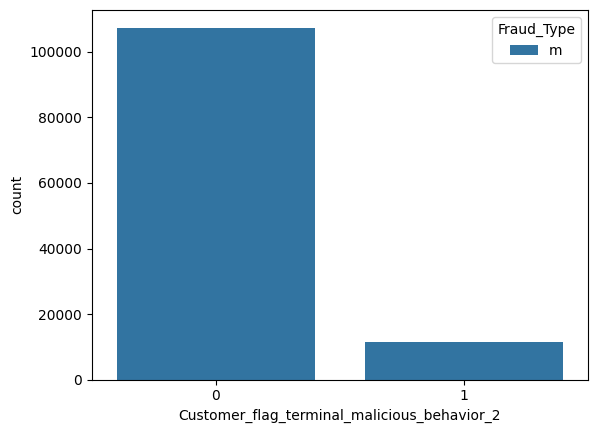


변수 명 : Customer_flag_terminal_malicious_behavior_3


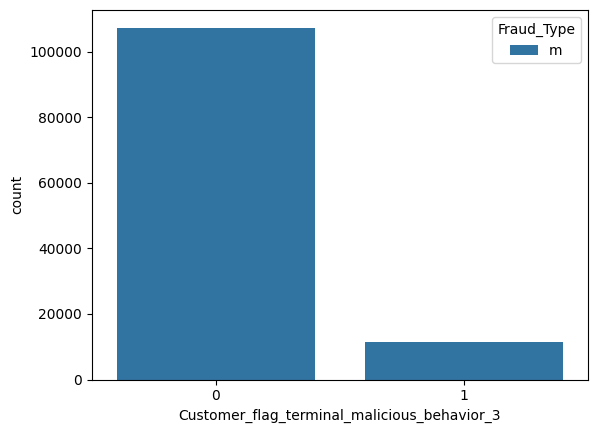


변수 명 : Customer_flag_terminal_malicious_behavior_4


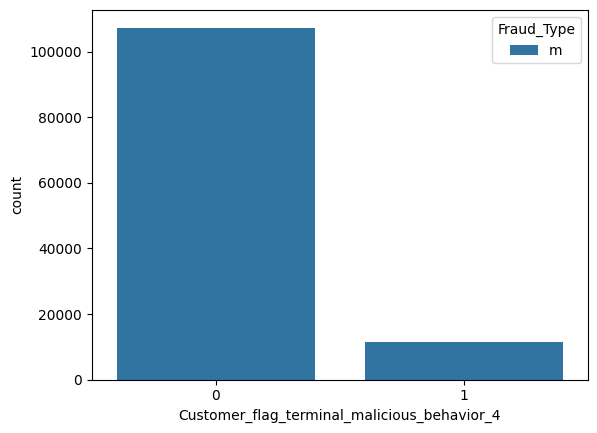


변수 명 : Customer_flag_terminal_malicious_behavior_5


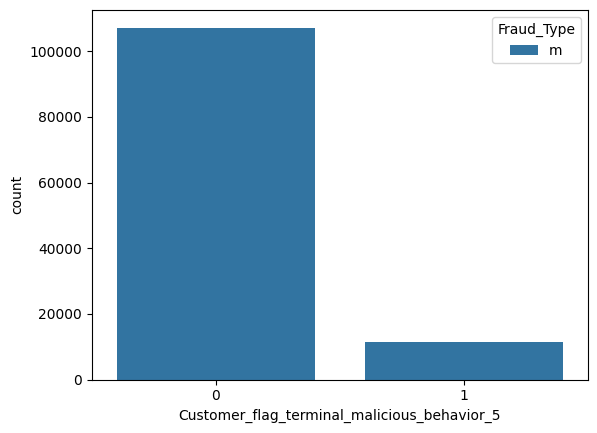


변수 명 : Customer_flag_terminal_malicious_behavior_6


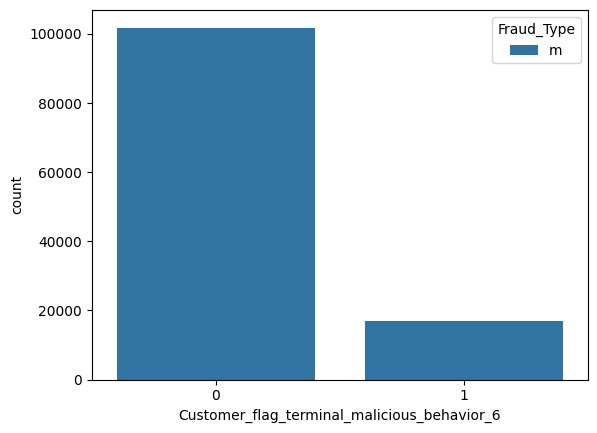


변수 명 : Customer_inquery_atm_limit


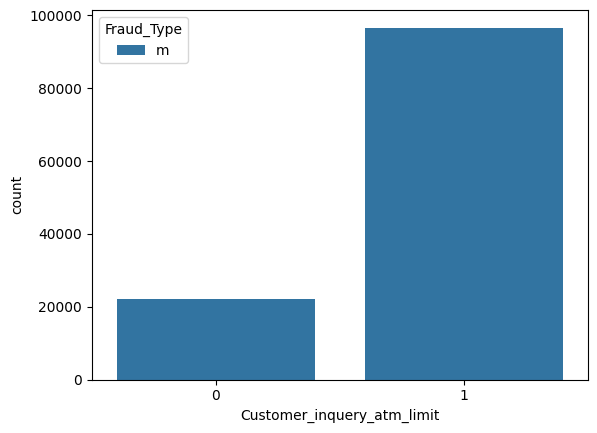


변수 명 : Customer_increase_atm_limit


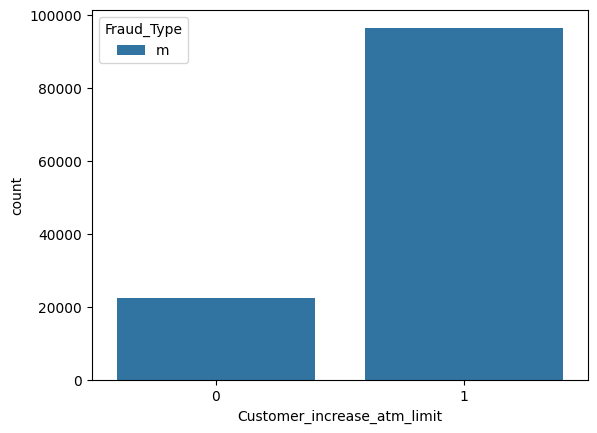


변수 명 : Account_account_type


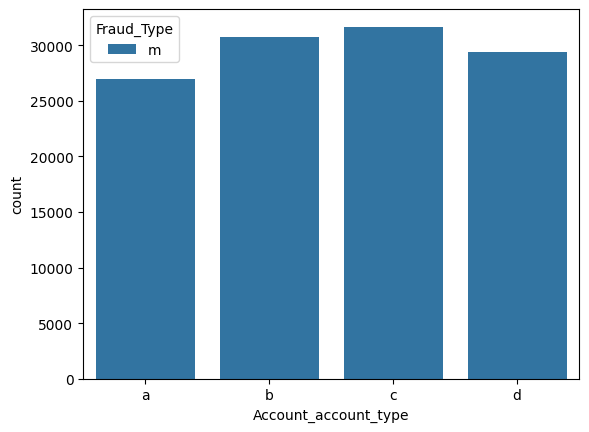


변수 명 : Account_indicator_release_limit_excess


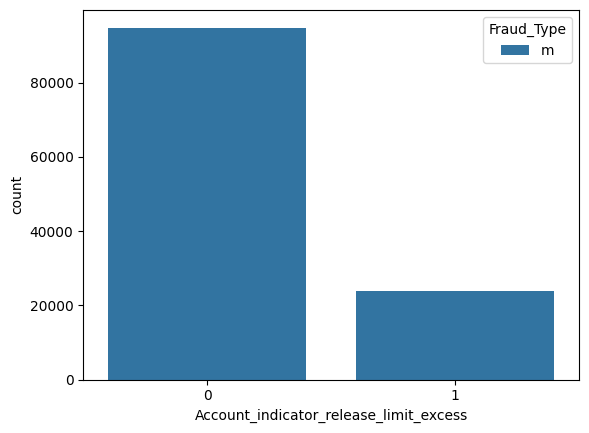


변수 명 : Account_indicator_Openbanking


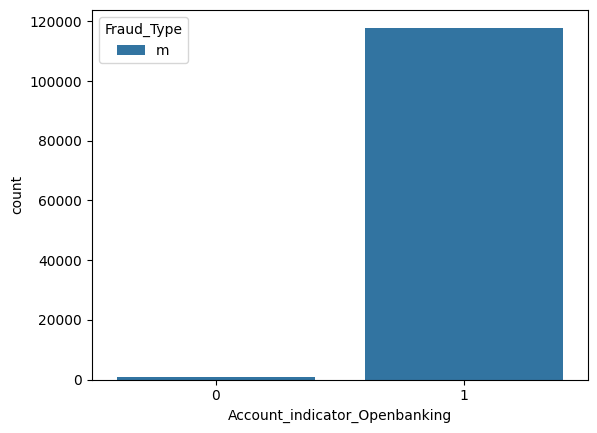


변수 명 : Account_release_suspention


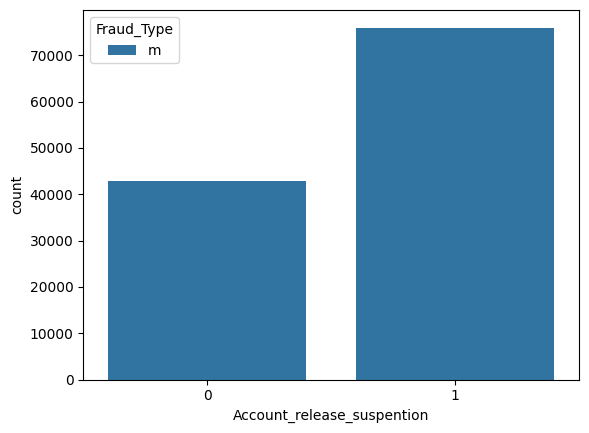


변수 명 : Channel


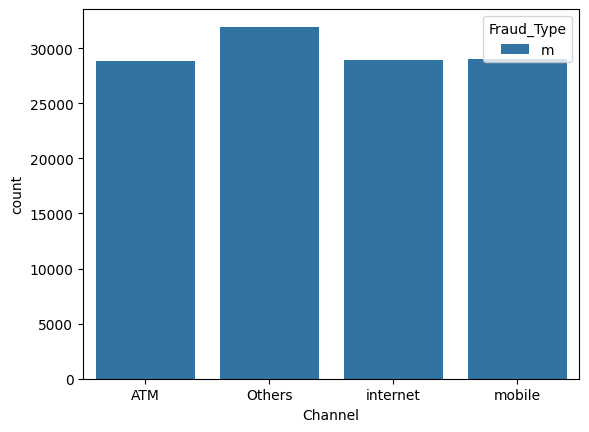


변수 명 : Operating_System


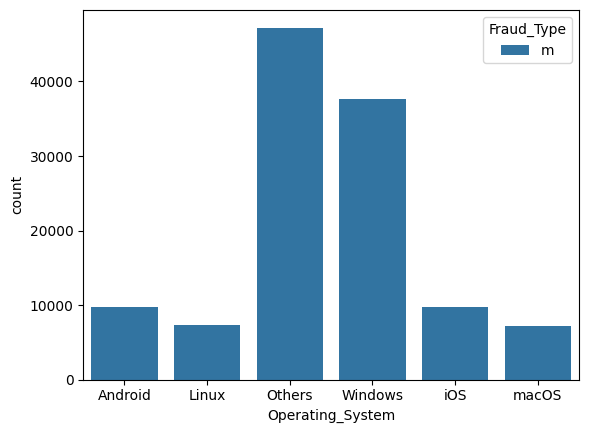


변수 명 : Error_Code


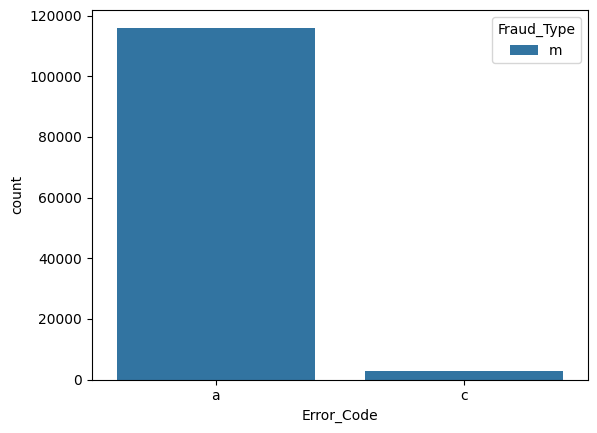


변수 명 : Transaction_Failure_Status


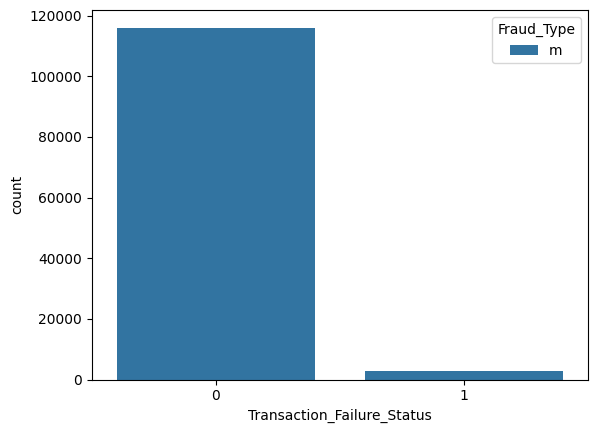


변수 명 : Type_General_Automatic


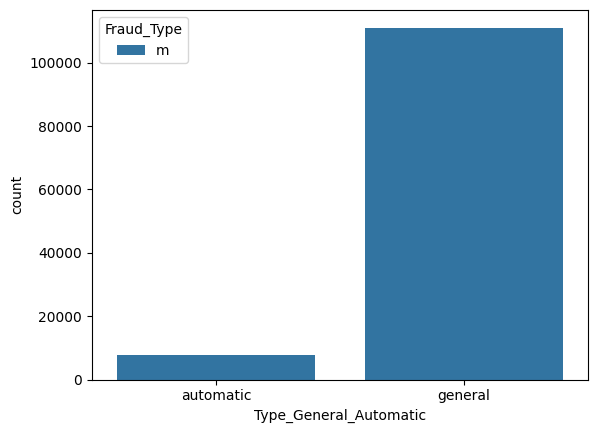


변수 명 : Access_Medium


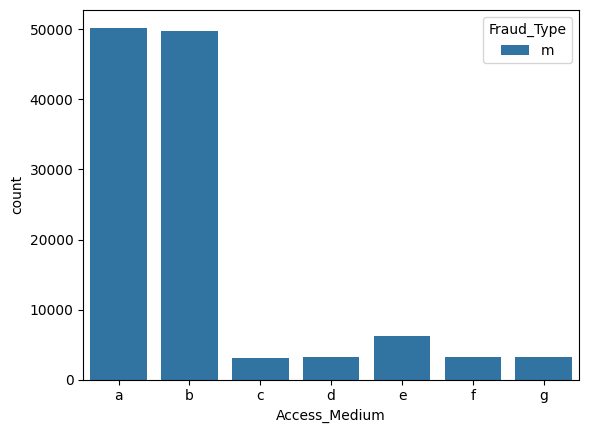


변수 명 : Another_Person_Account


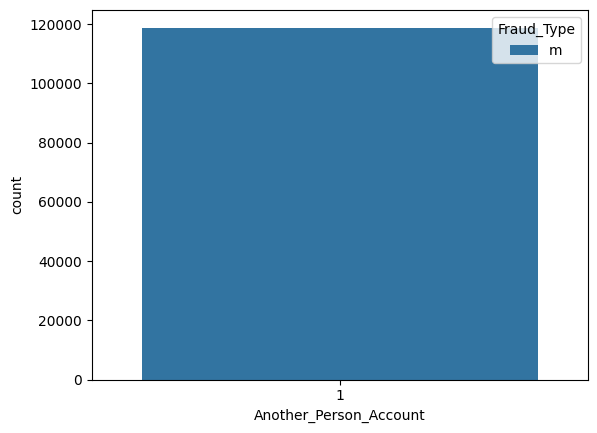


변수 명 : Unused_terminal_status


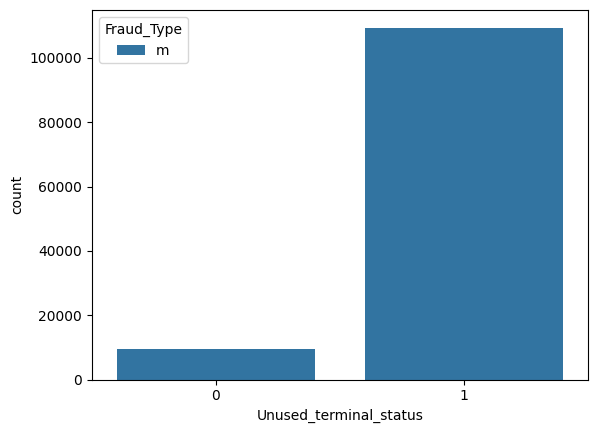


변수 명 : Flag_deposit_more_than_tenMillion


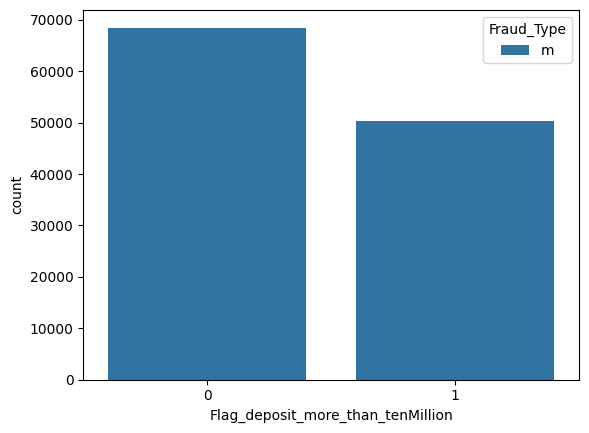


변수 명 : Unused_account_status


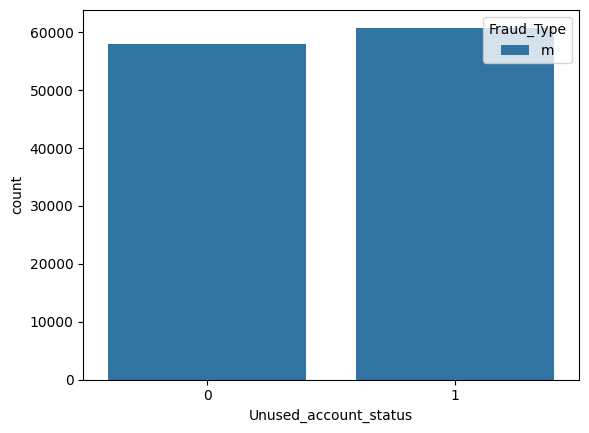


변수 명 : Recipient_account_suspend_status


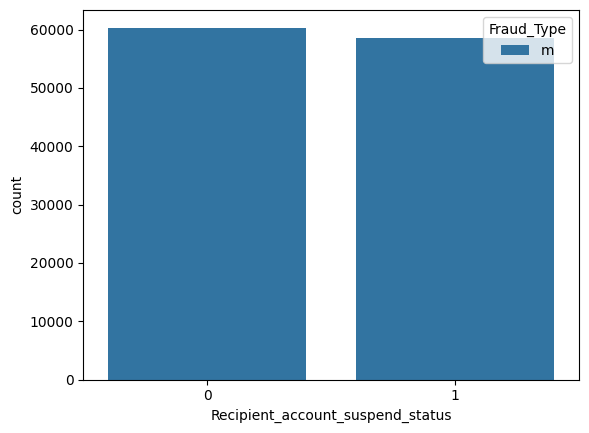


변수 명 : First_time_iOS_by_vulnerable_user


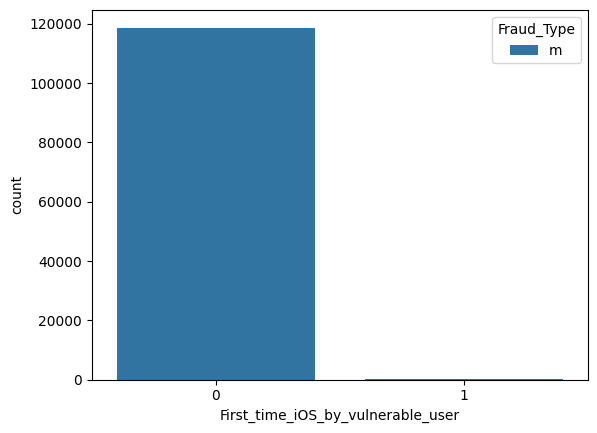

In [ ]:
for column, col_type, col_range in zip(cond_all['항목명'],
                                       cond_all['데이터 형태'],
                                       cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-' and column != 'Fraud_Type':
     print(f'변수 명 : {column}')

     order = list(train_all_m[column].unique())
     order = sorted(order)

     sns.countplot(data=train_all_m,
                 x=column,
                 hue='Fraud_Type',
                 order=order)
     plt.show()

     print()

변수 명 : Customer_Gender


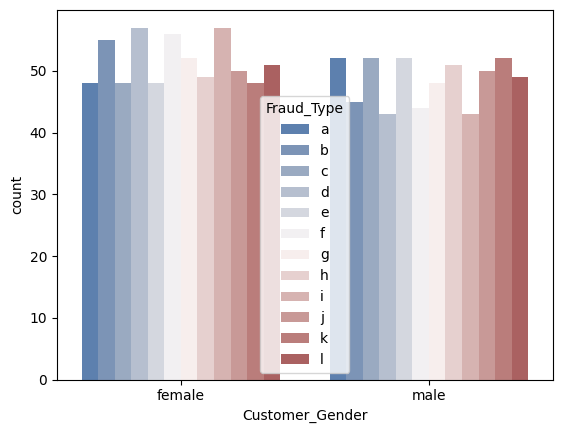


변수 명 : Customer_credit_rating


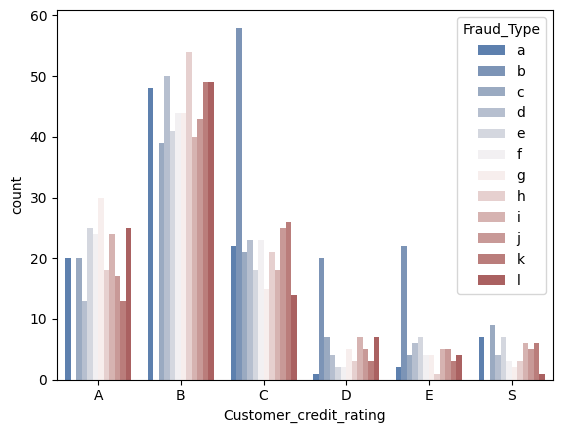


변수 명 : Customer_flag_change_of_authentication_1


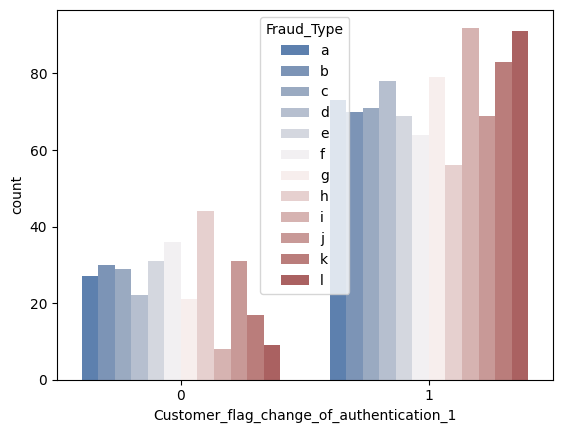


변수 명 : Customer_flag_change_of_authentication_2


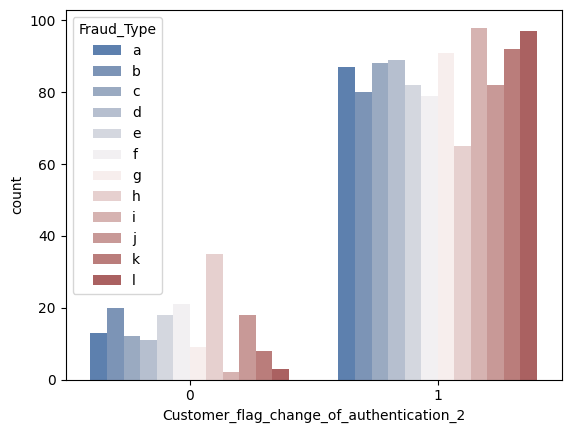


변수 명 : Customer_flag_change_of_authentication_3


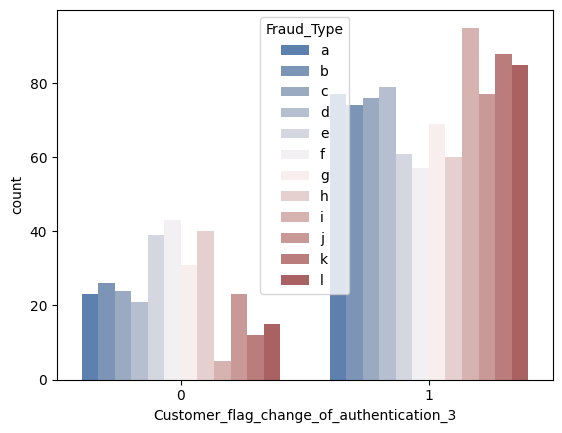


변수 명 : Customer_flag_change_of_authentication_4


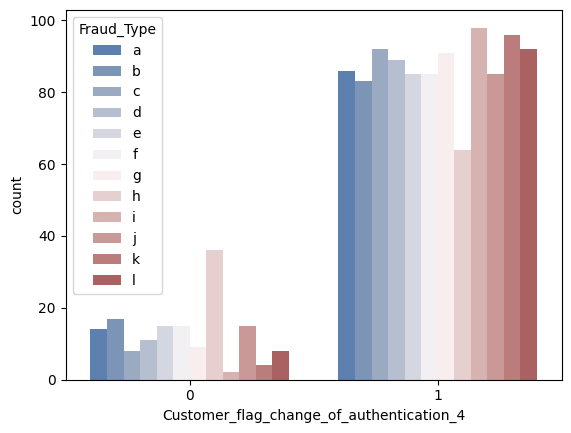


변수 명 : Customer_rooting_jailbreak_indicator


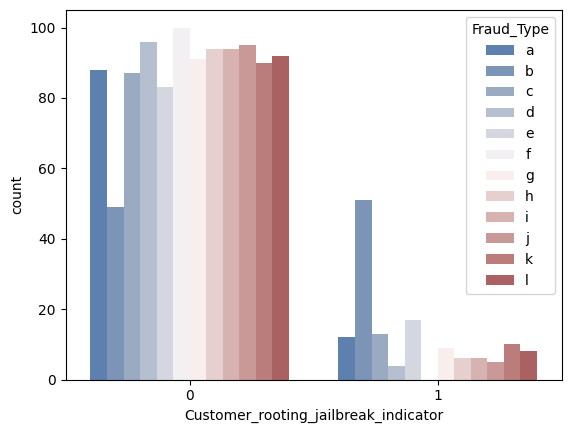


변수 명 : Customer_mobile_roaming_indicator


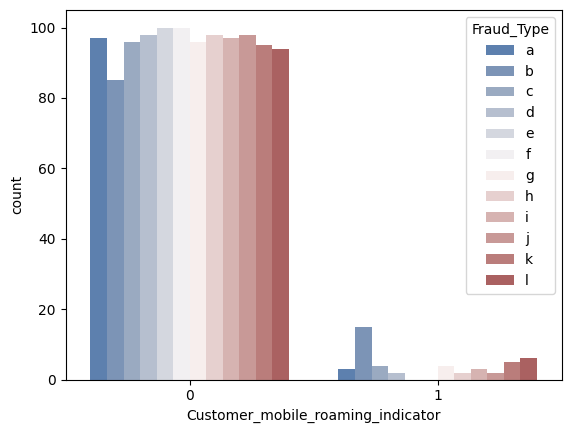


변수 명 : Customer_VPN_Indicator


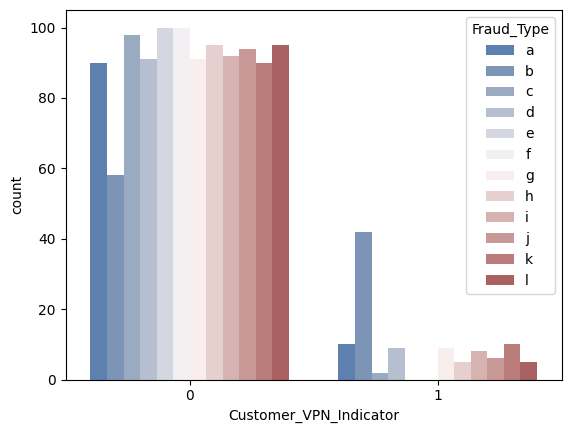


변수 명 : Customer_loan_type


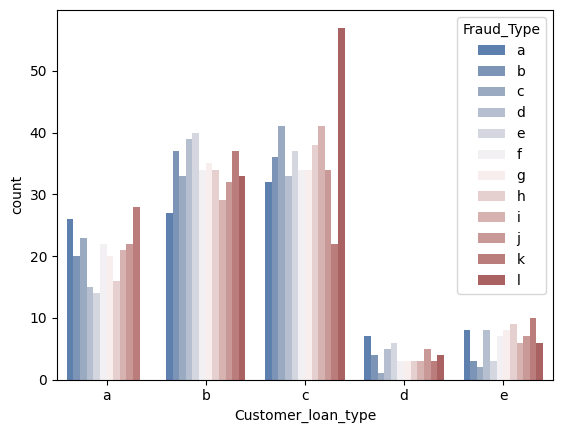


변수 명 : Customer_flag_terminal_malicious_behavior_1


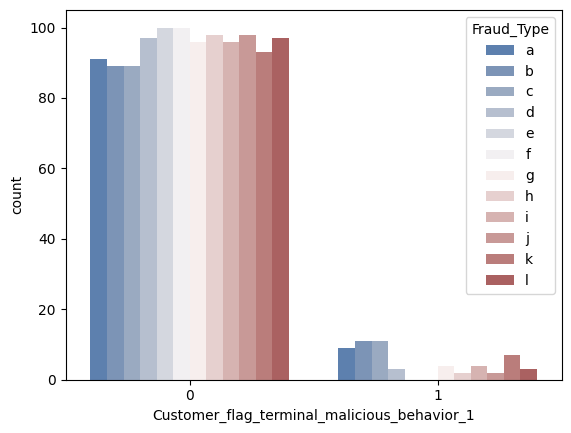


변수 명 : Customer_flag_terminal_malicious_behavior_2


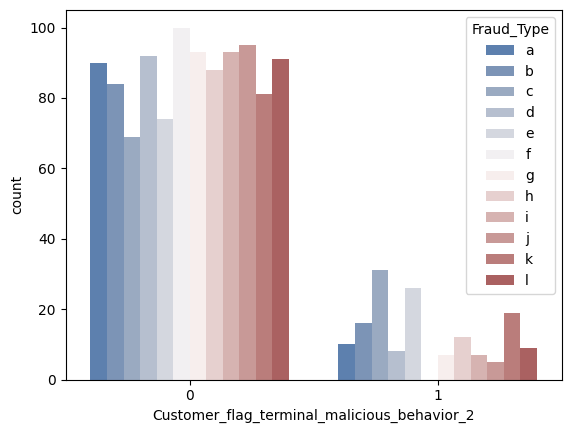


변수 명 : Customer_flag_terminal_malicious_behavior_3


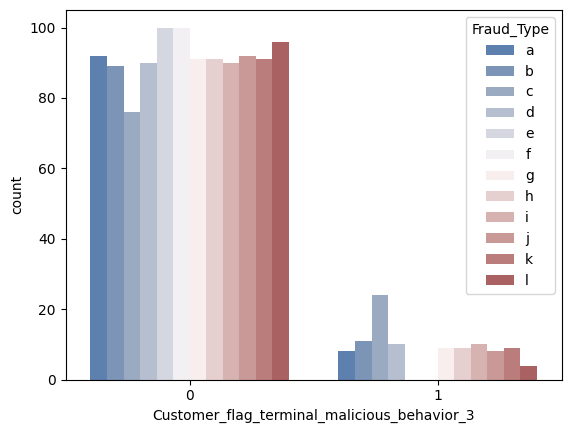


변수 명 : Customer_flag_terminal_malicious_behavior_4


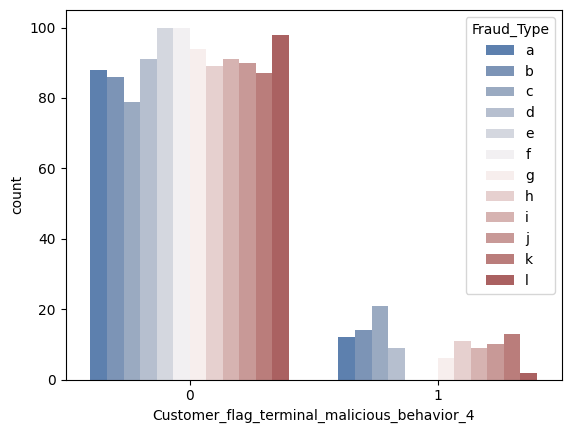


변수 명 : Customer_flag_terminal_malicious_behavior_5


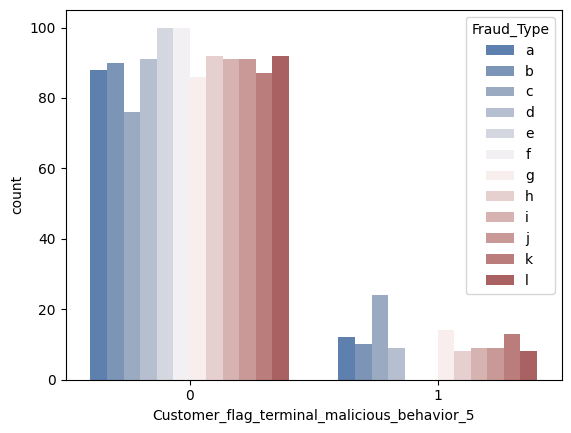


변수 명 : Customer_flag_terminal_malicious_behavior_6


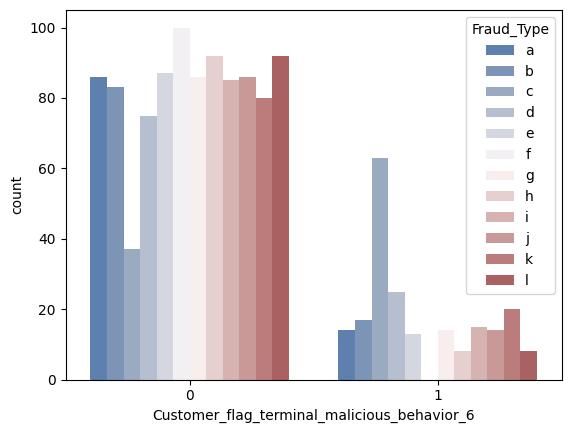


변수 명 : Customer_inquery_atm_limit


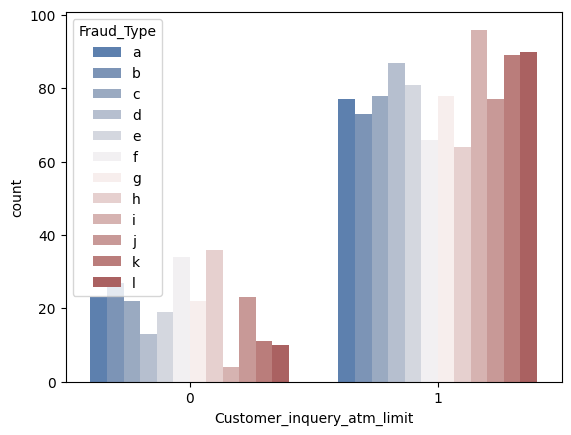


변수 명 : Customer_increase_atm_limit


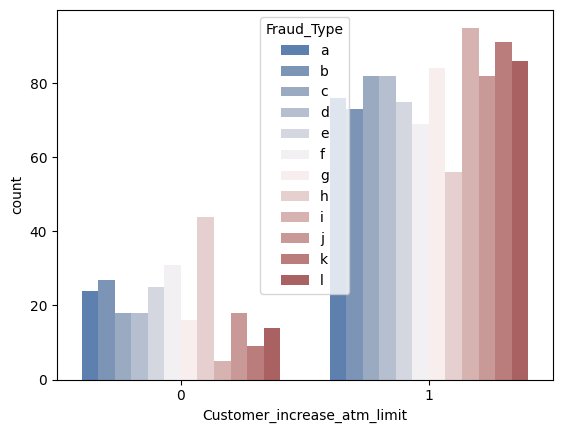


변수 명 : Account_account_type


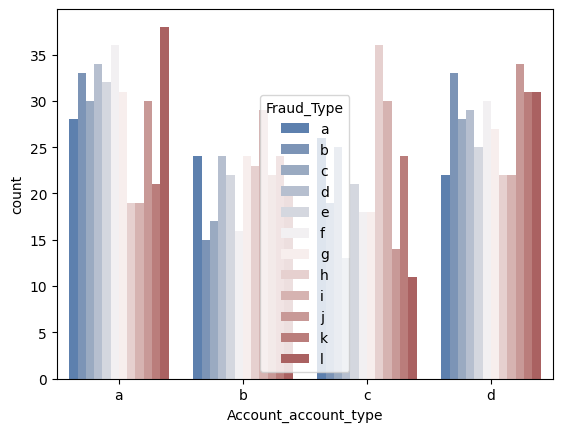


변수 명 : Account_indicator_release_limit_excess


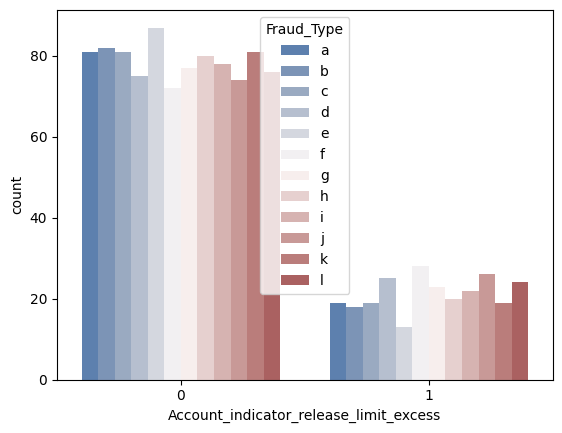


변수 명 : Account_indicator_Openbanking


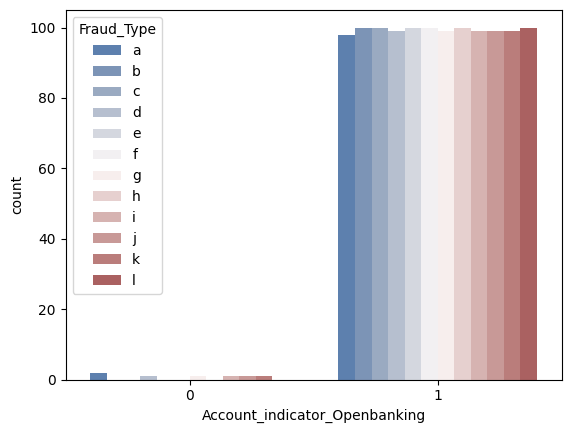


변수 명 : Account_release_suspention


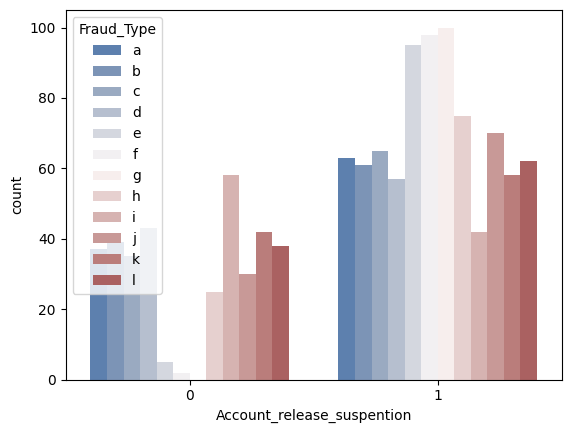


변수 명 : Channel


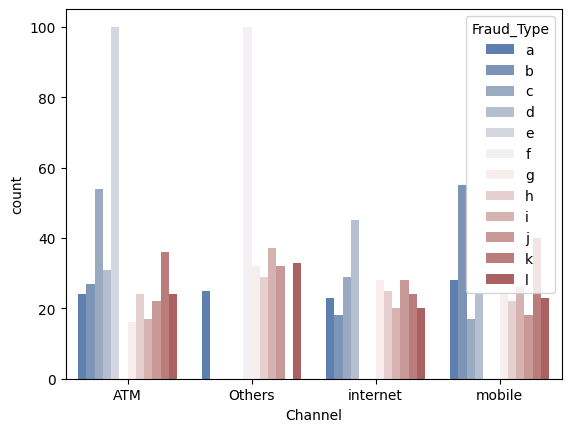


변수 명 : Operating_System


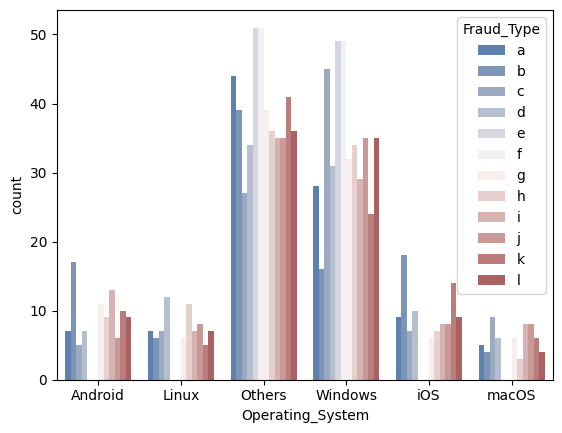


변수 명 : Error_Code


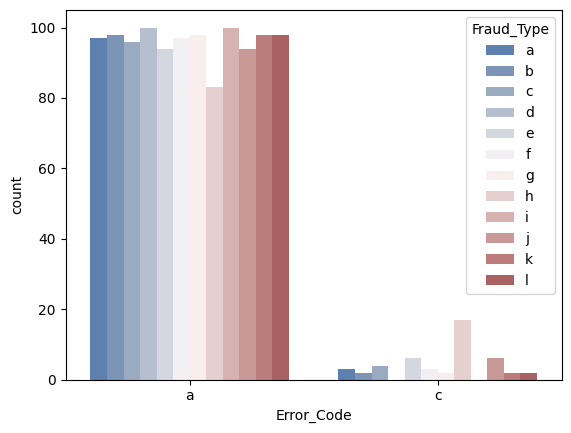


변수 명 : Transaction_Failure_Status


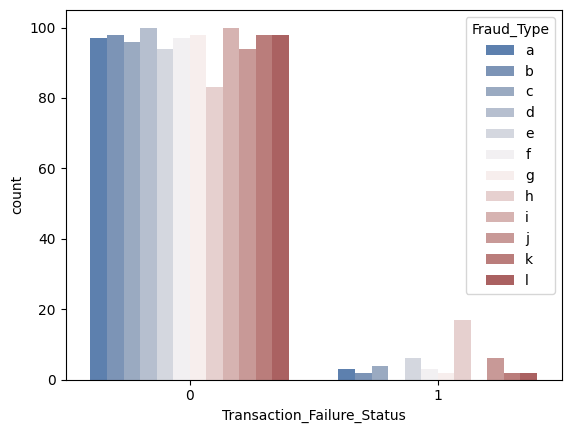


변수 명 : Type_General_Automatic


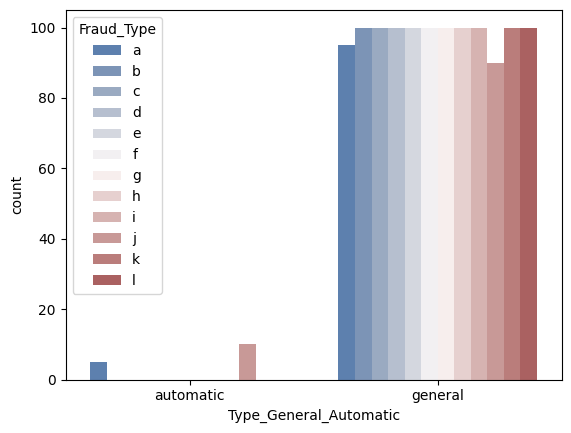


변수 명 : Access_Medium


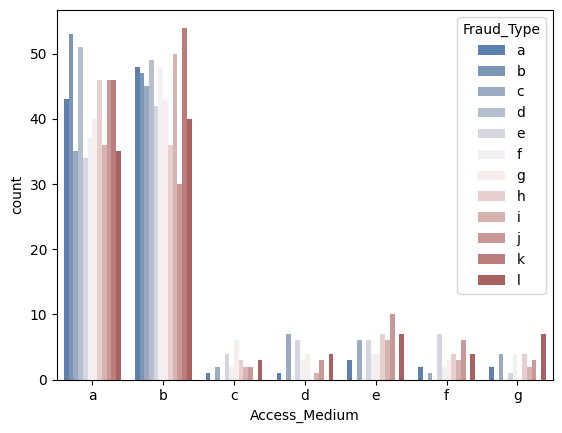


변수 명 : Another_Person_Account


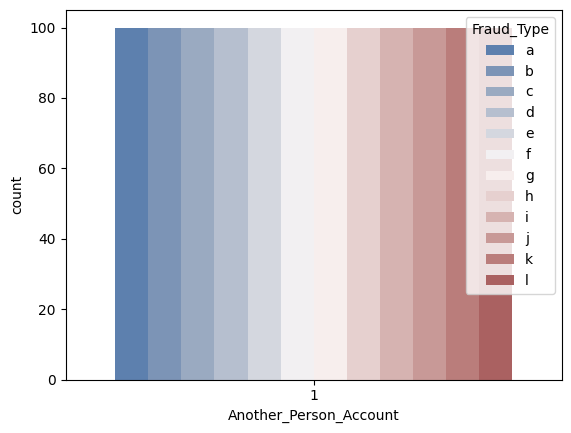


변수 명 : Unused_terminal_status


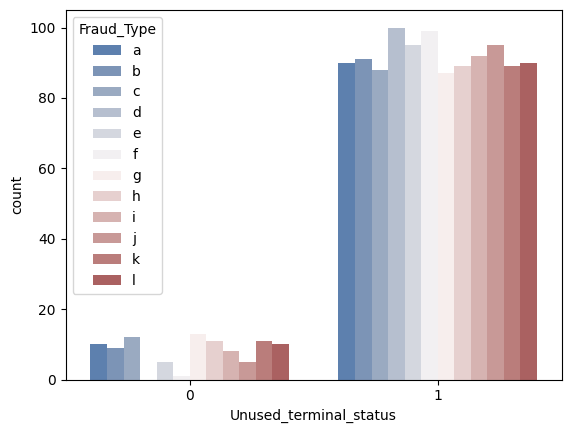


변수 명 : Flag_deposit_more_than_tenMillion


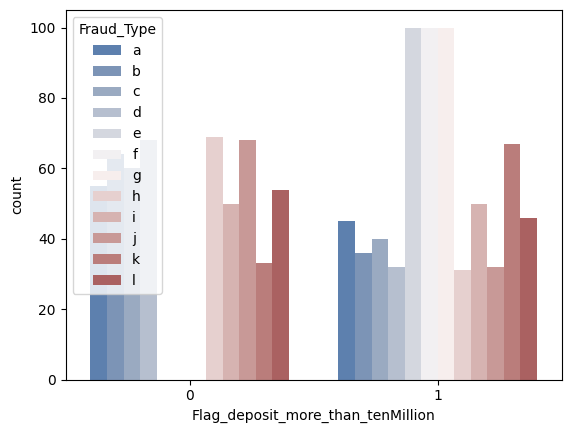


변수 명 : Unused_account_status


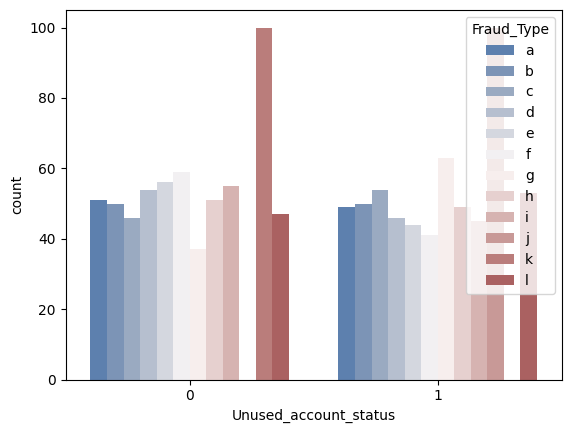


변수 명 : Recipient_account_suspend_status


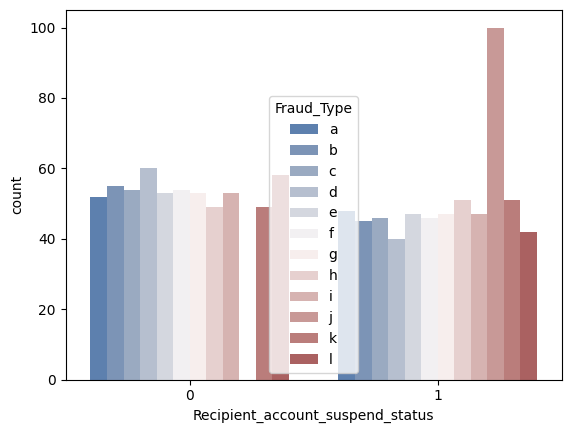


변수 명 : First_time_iOS_by_vulnerable_user


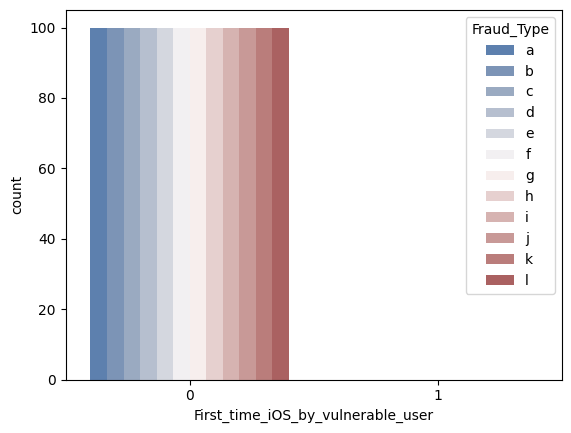

In [ ]:
for column, col_type, col_range in zip(cond_all['항목명'],
                                       cond_all['데이터 형태'],
                                       cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-' and column != 'Fraud_Type':
     print(f'변수 명 : {column}')

     order = list(train_all_m[column].unique())
     order = sorted(order)

     sns.countplot(data=train_all_non_m,
                    x=column,
                    hue='Fraud_Type',
                    palette='vlag',
                    hue_order=hue_order,
                    order=order)

     plt.show()

     print()

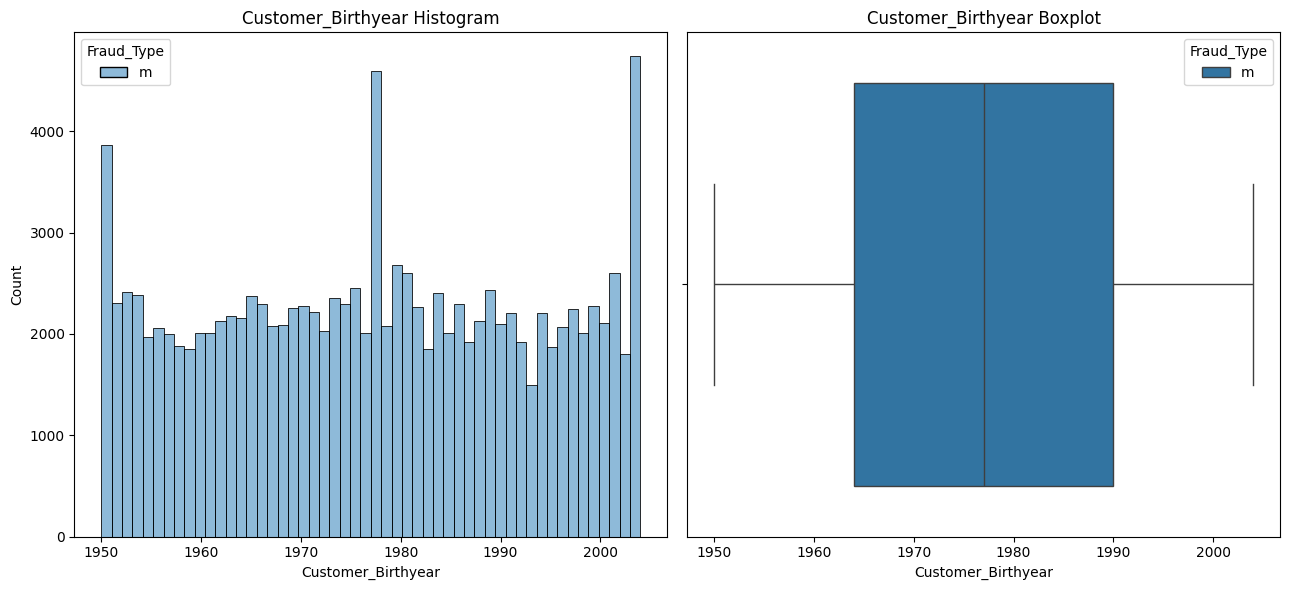

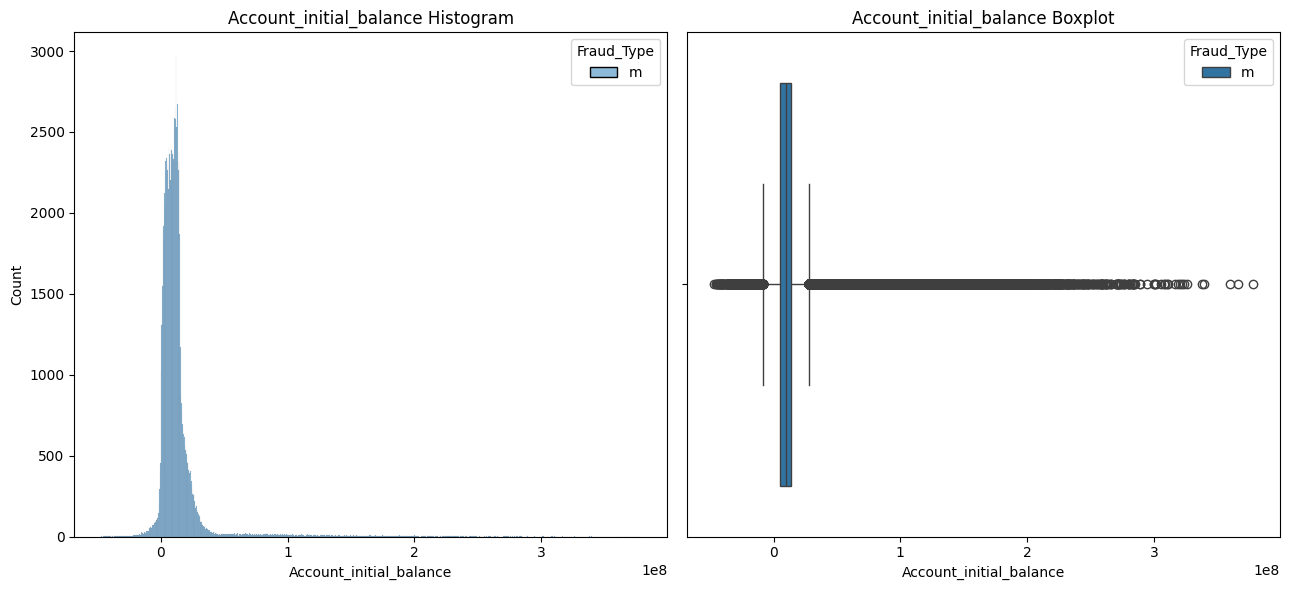

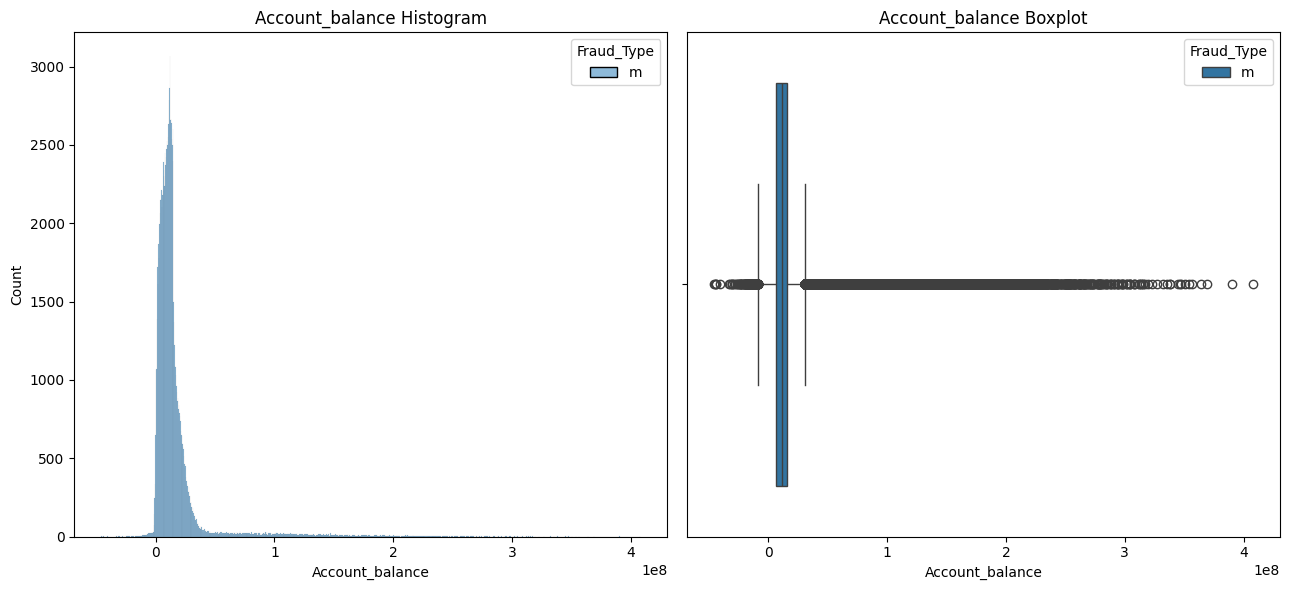

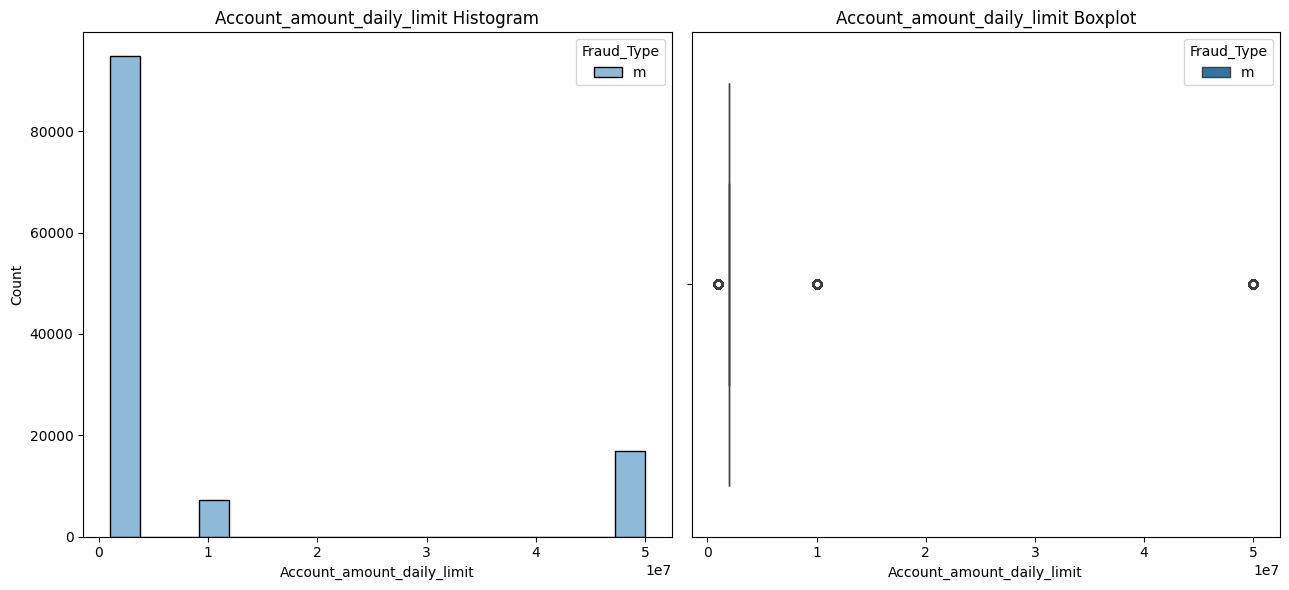

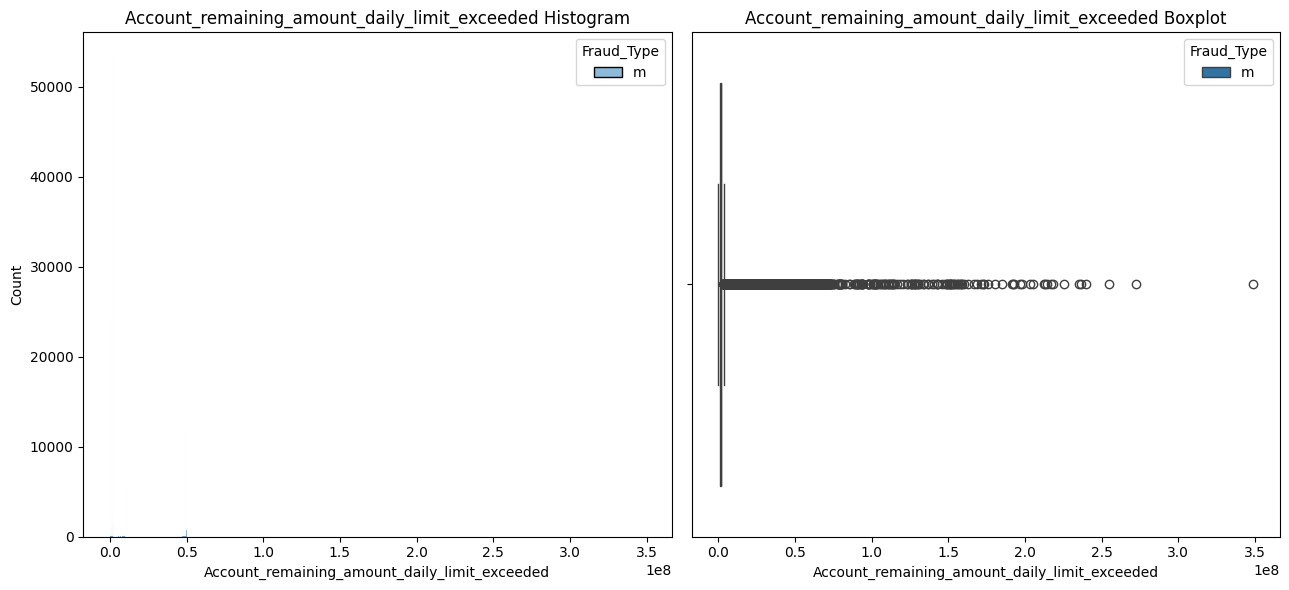

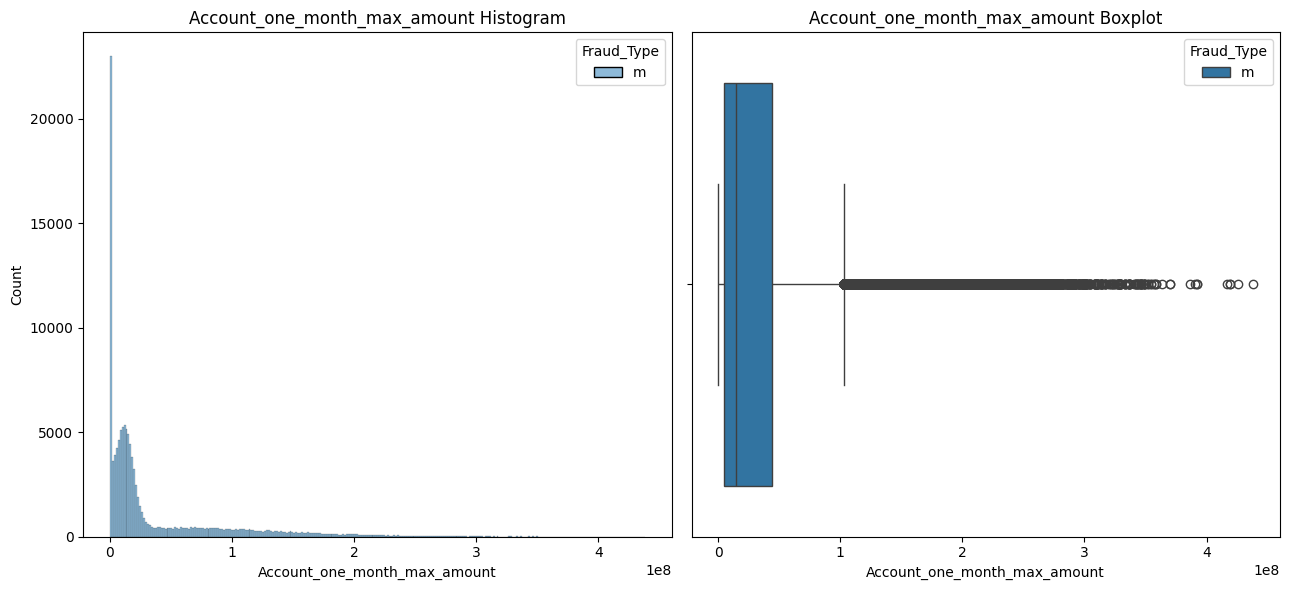

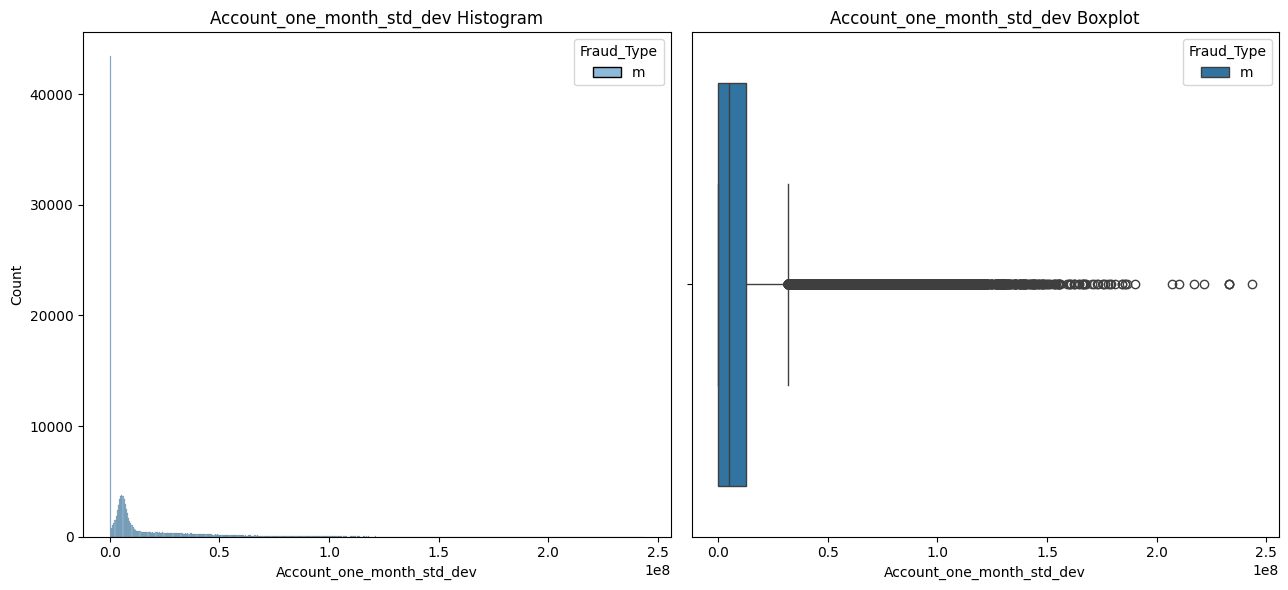

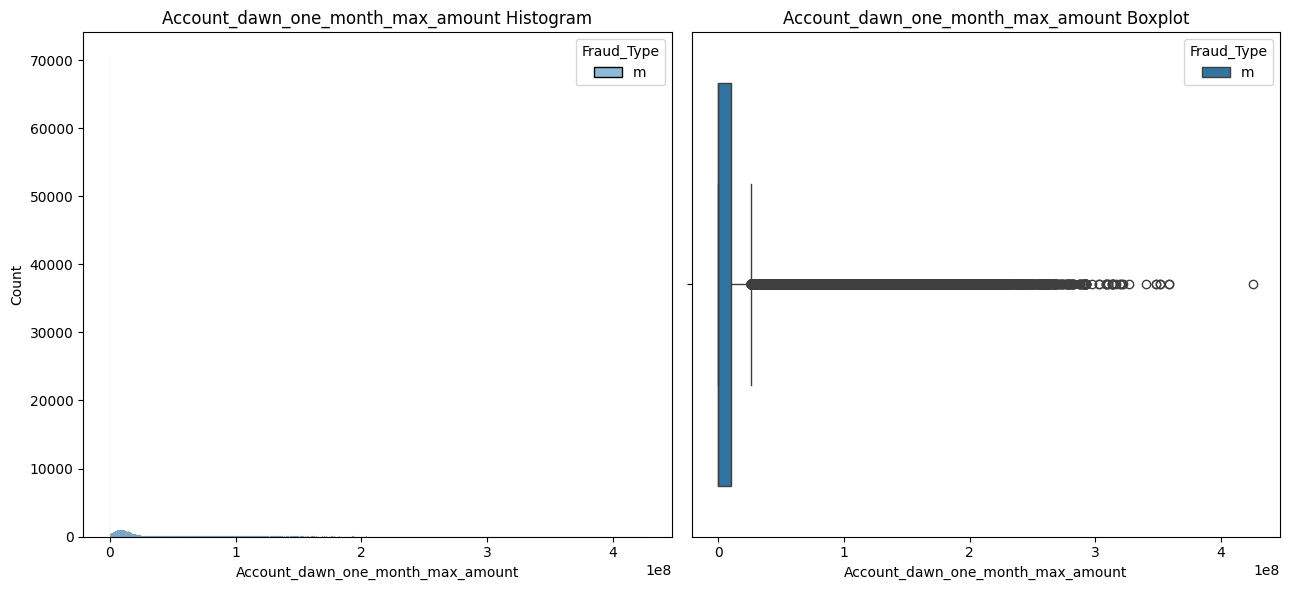

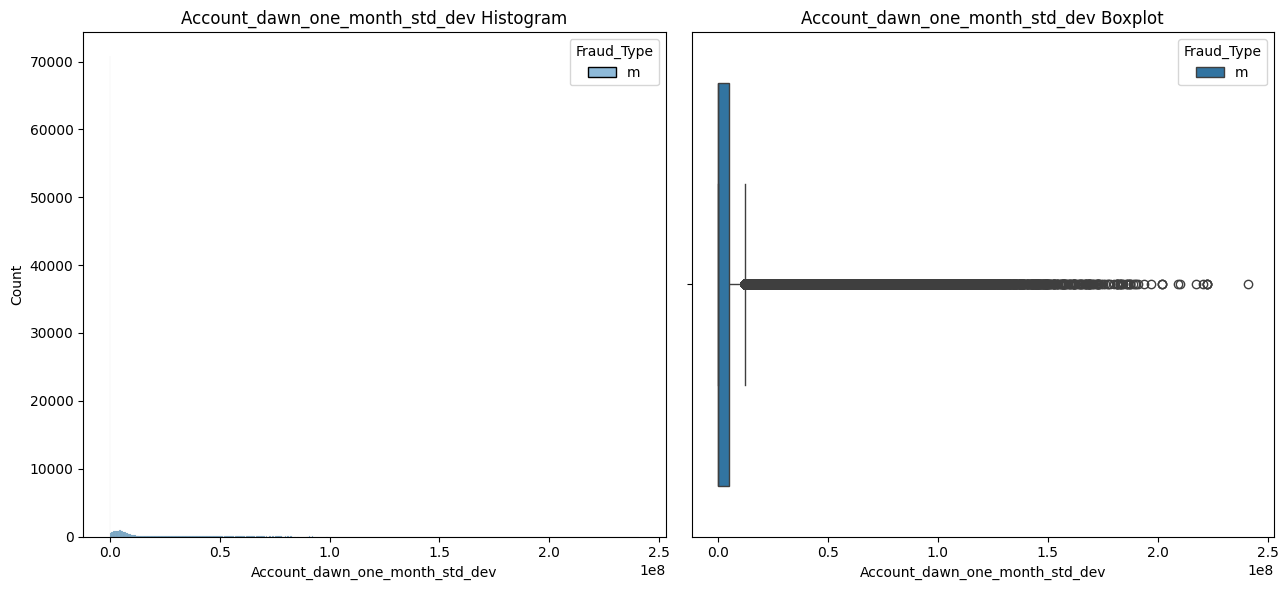

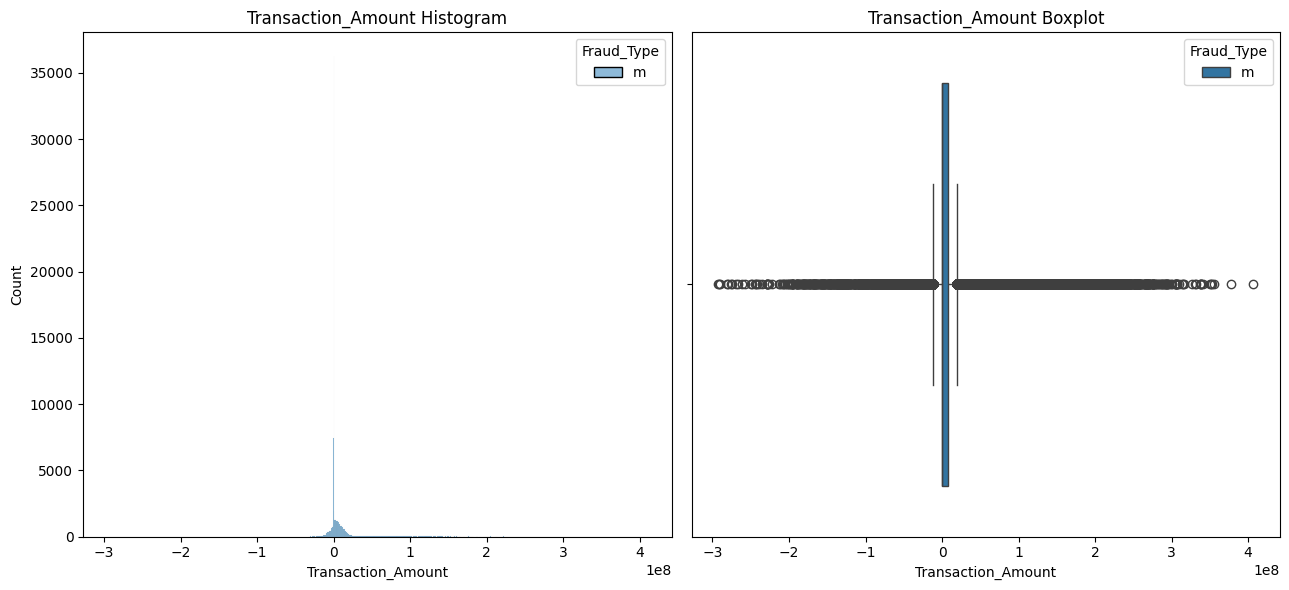

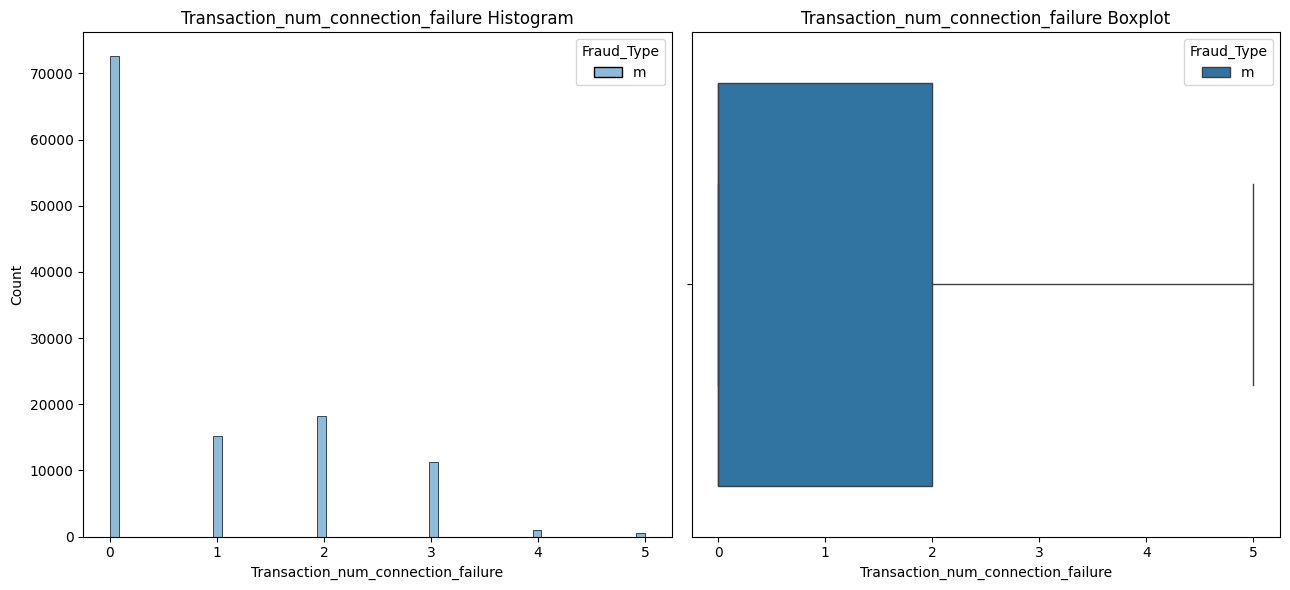

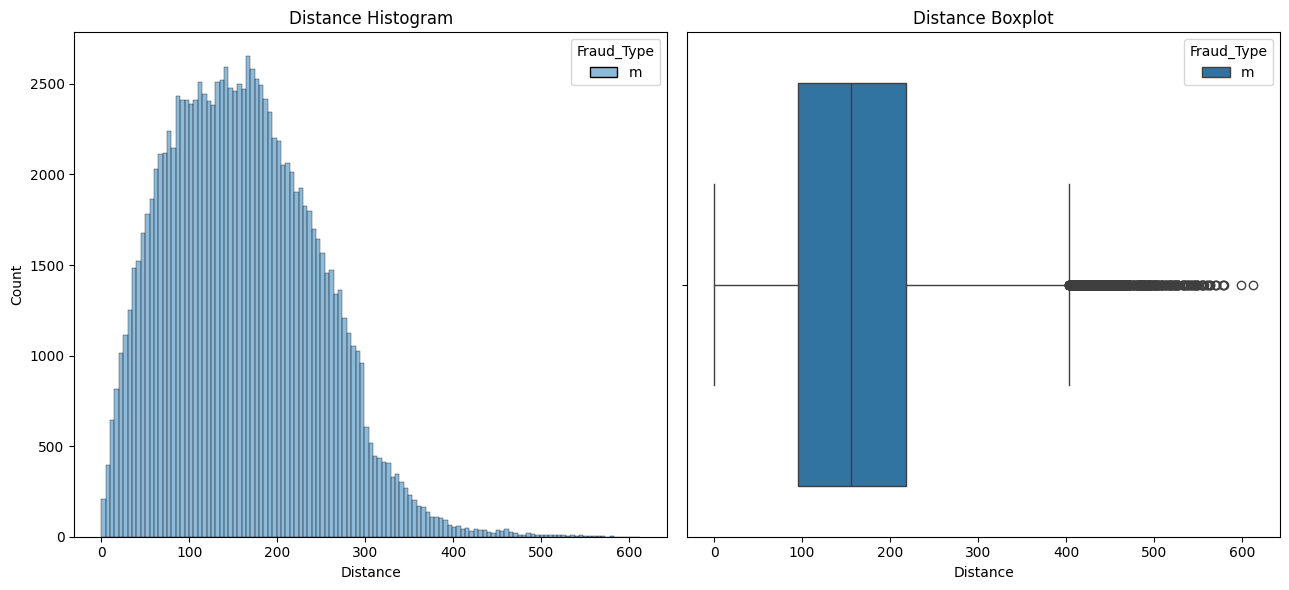

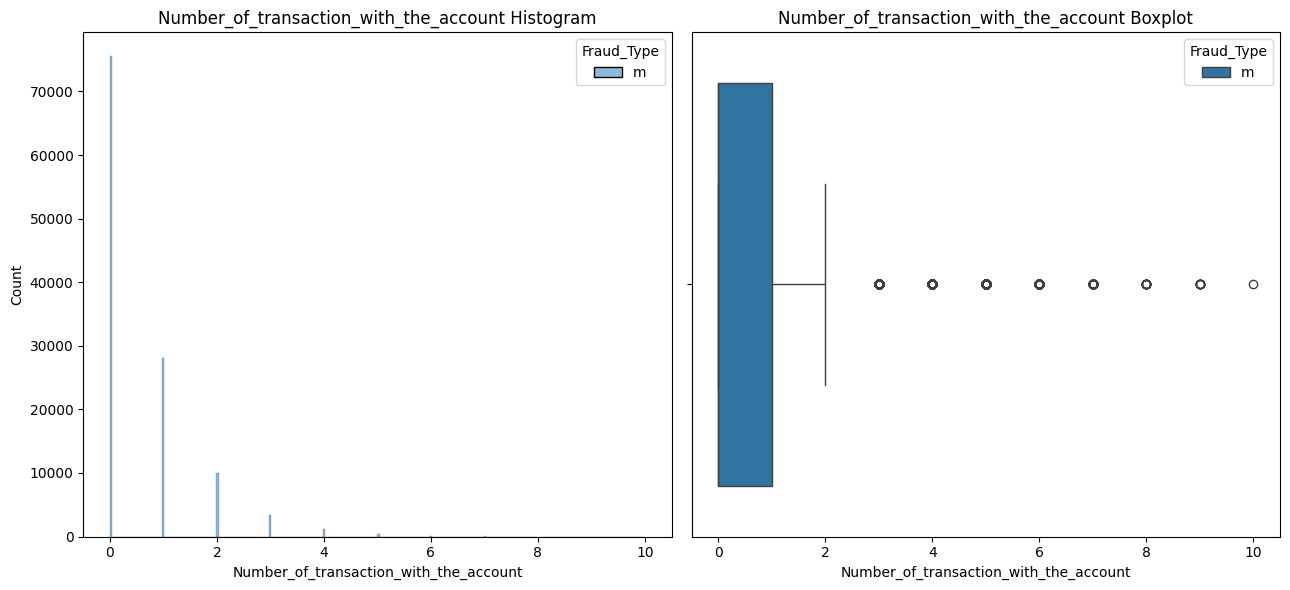

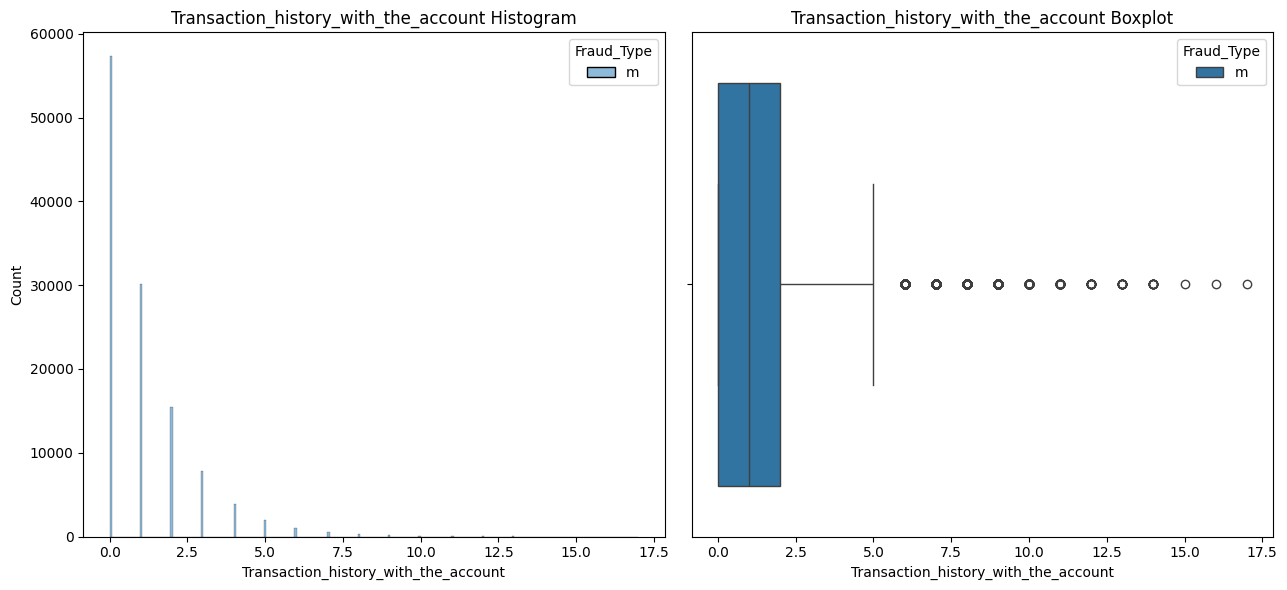

In [ ]:
for column, col_type in zip(cond_all['항목명'], cond_all['데이터 형태']):

    if col_type == '수치형' and column != 'Time_difference':

       fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

       sns.histplot(data=train_all_m,
                    x=column,
                    hue='Fraud_Type',
                    ax=ax[0])
       ax[0].set_title(f'{column} Histogram')

       sns.boxplot(data=train_all_m,
                   x=column,
                   hue='Fraud_Type',
                   ax=ax[1])
       ax[1].set_title(f'{column} Boxplot')

       plt.tight_layout()
       plt.show()

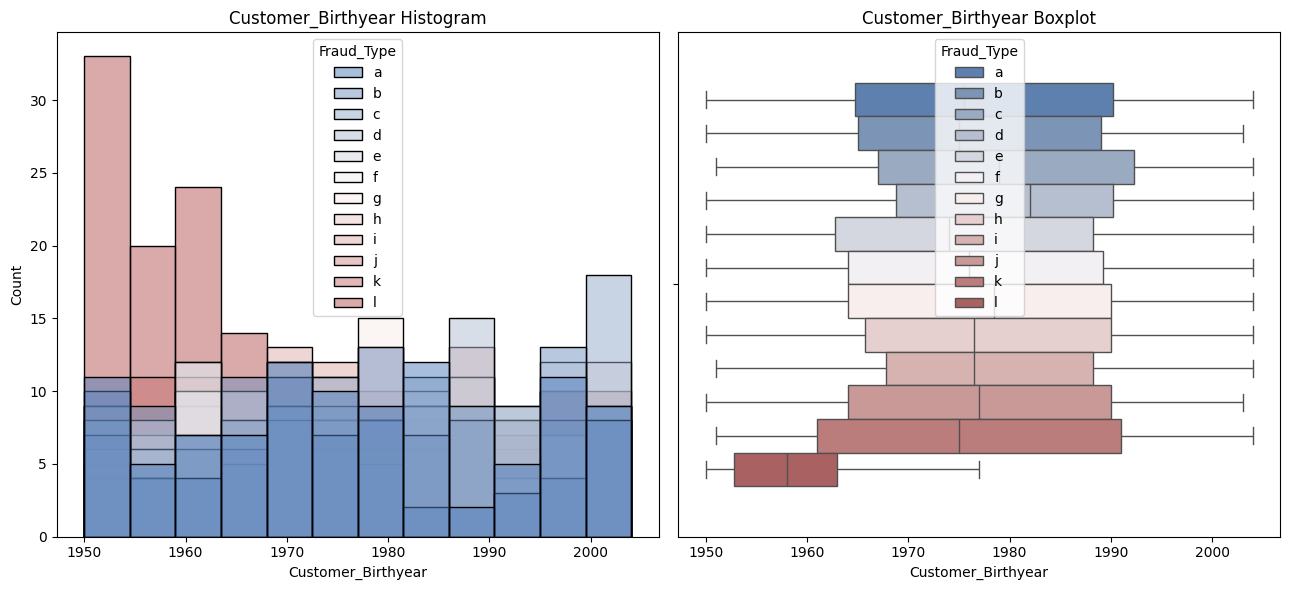

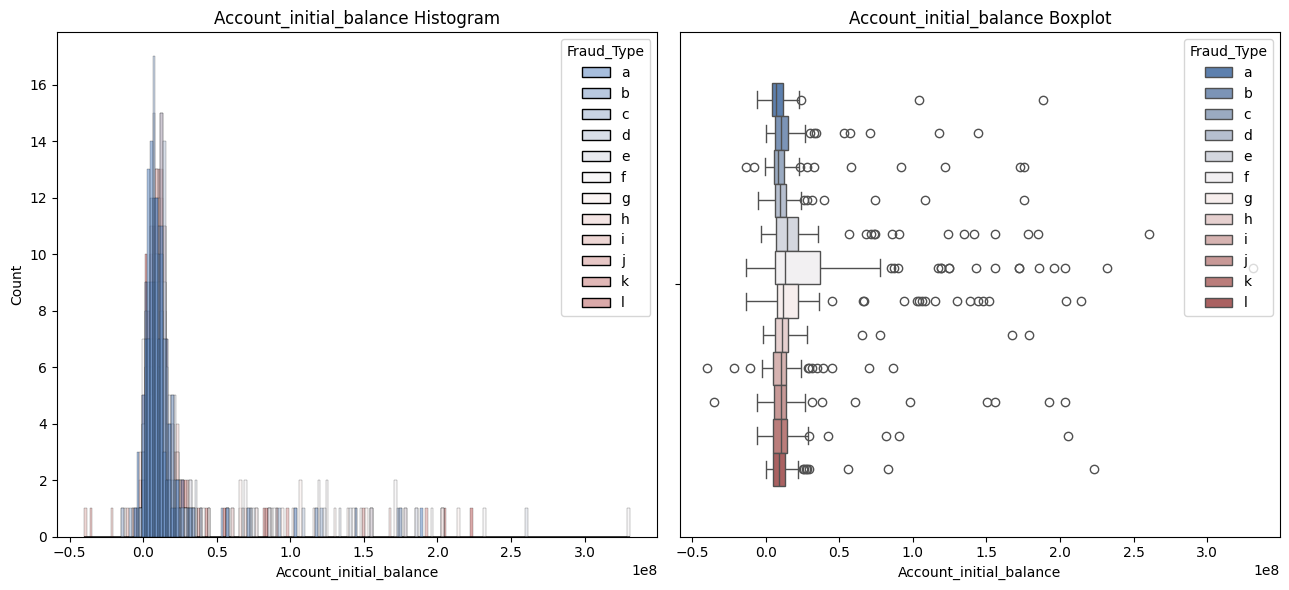

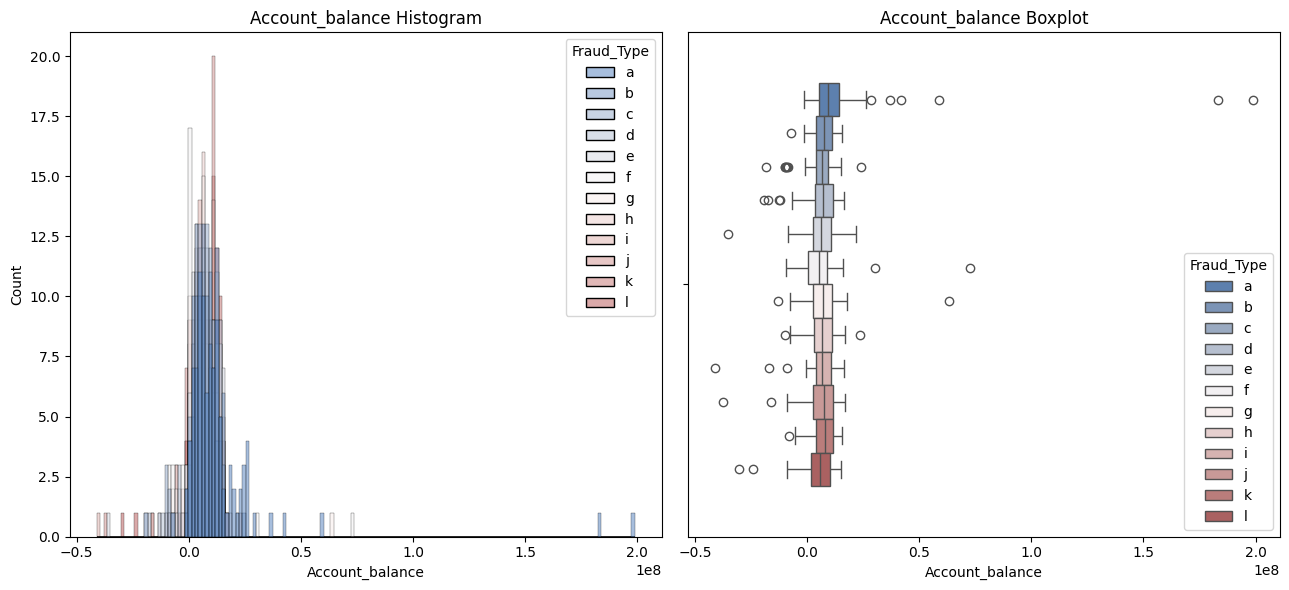

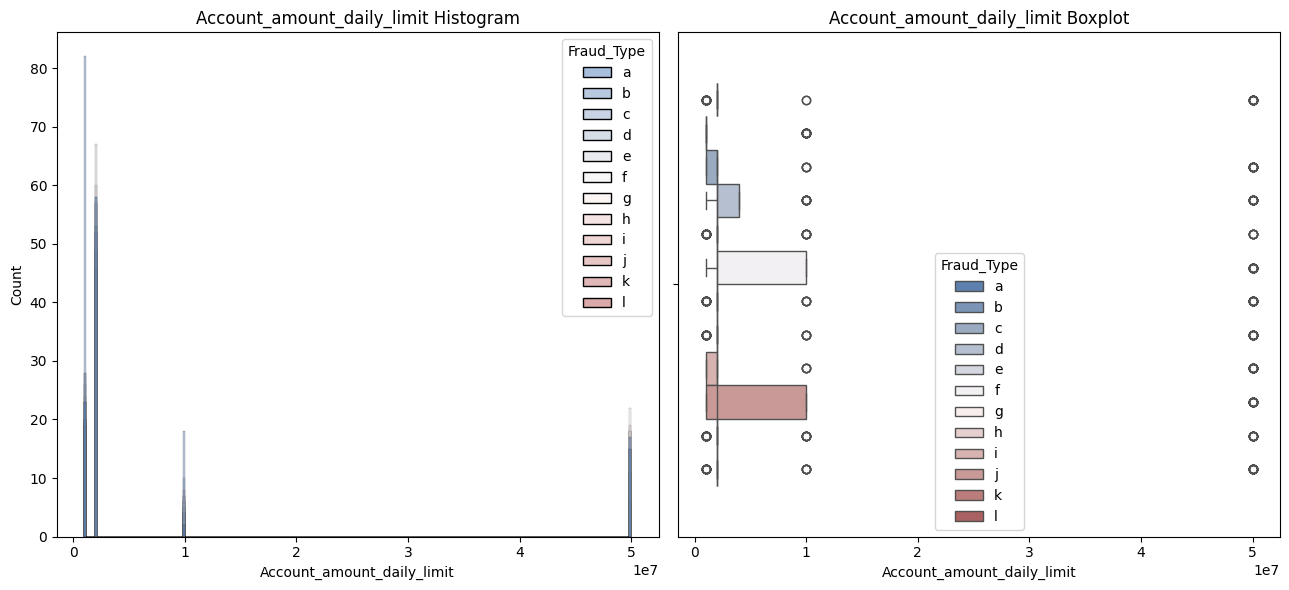

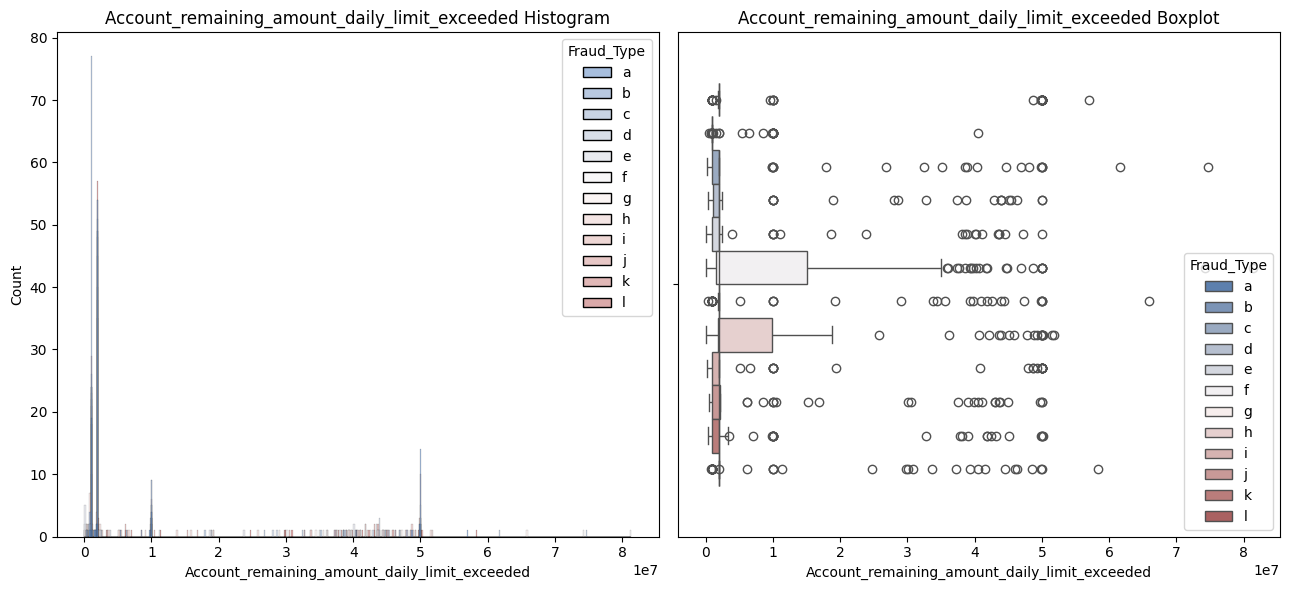

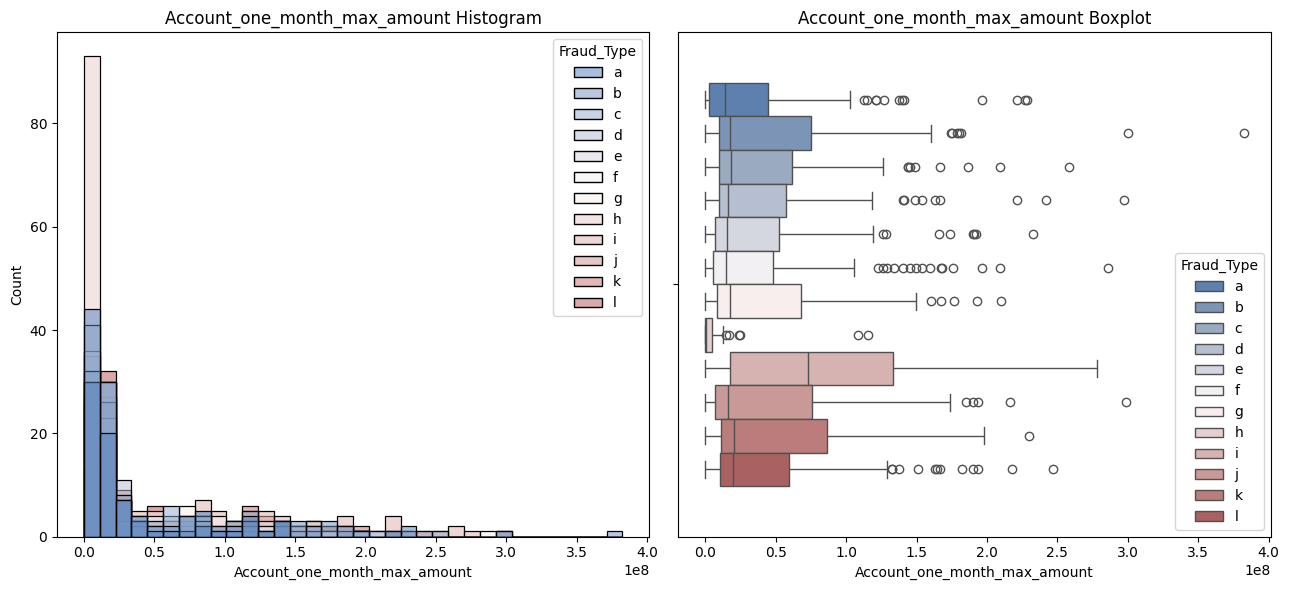

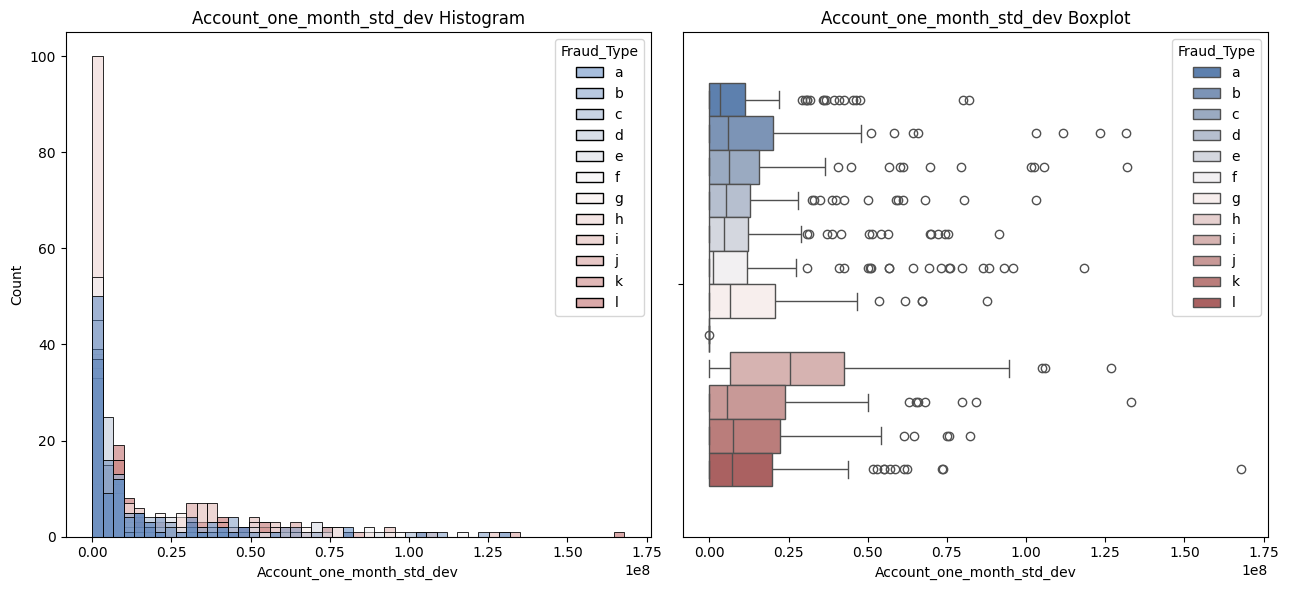

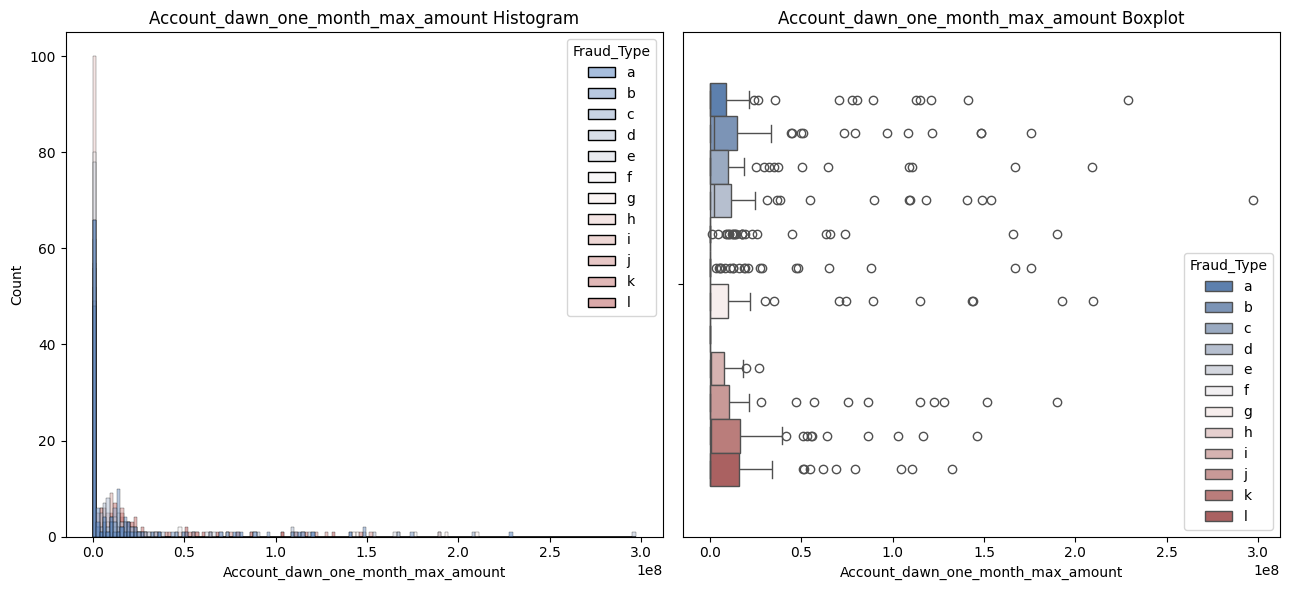

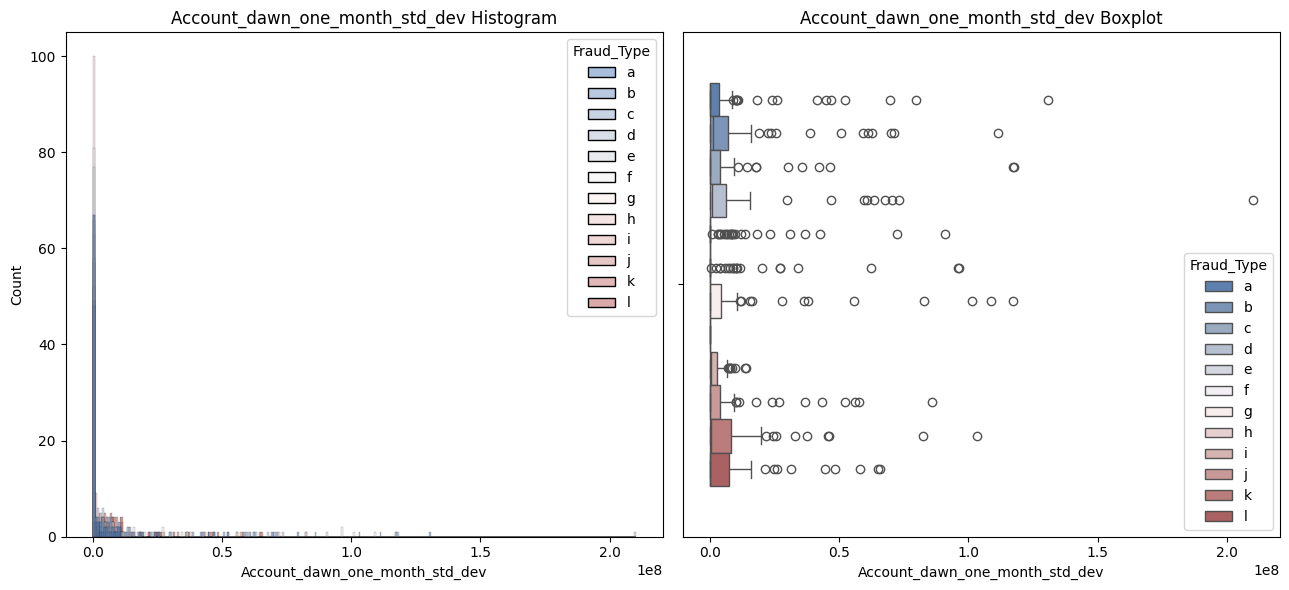

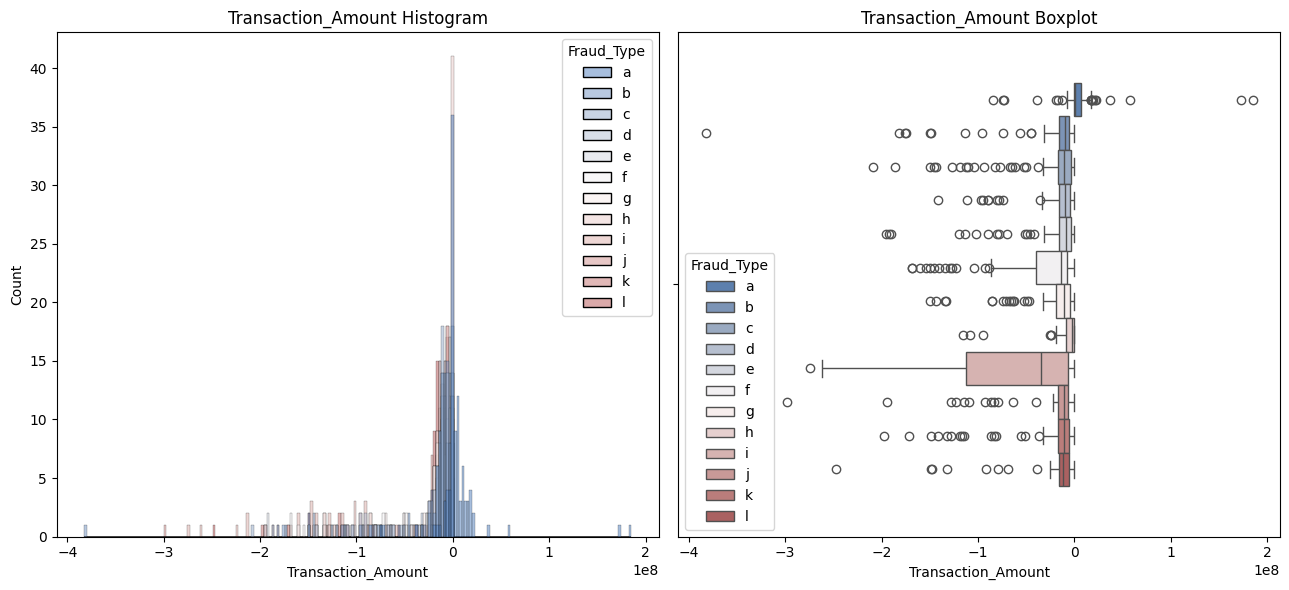

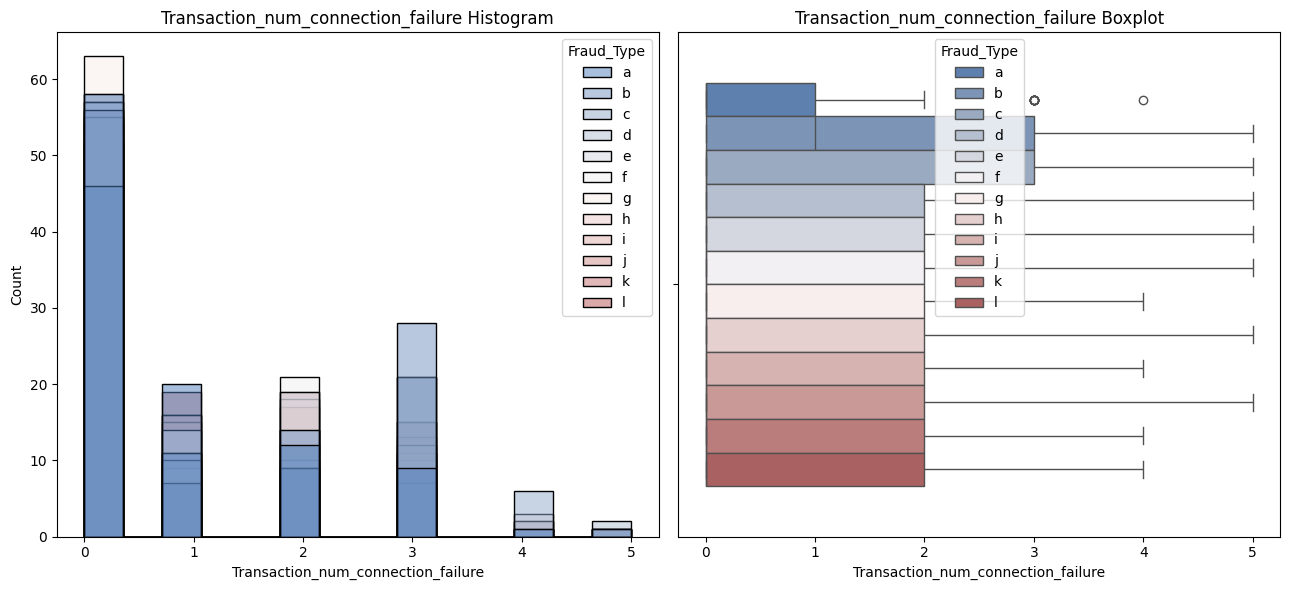

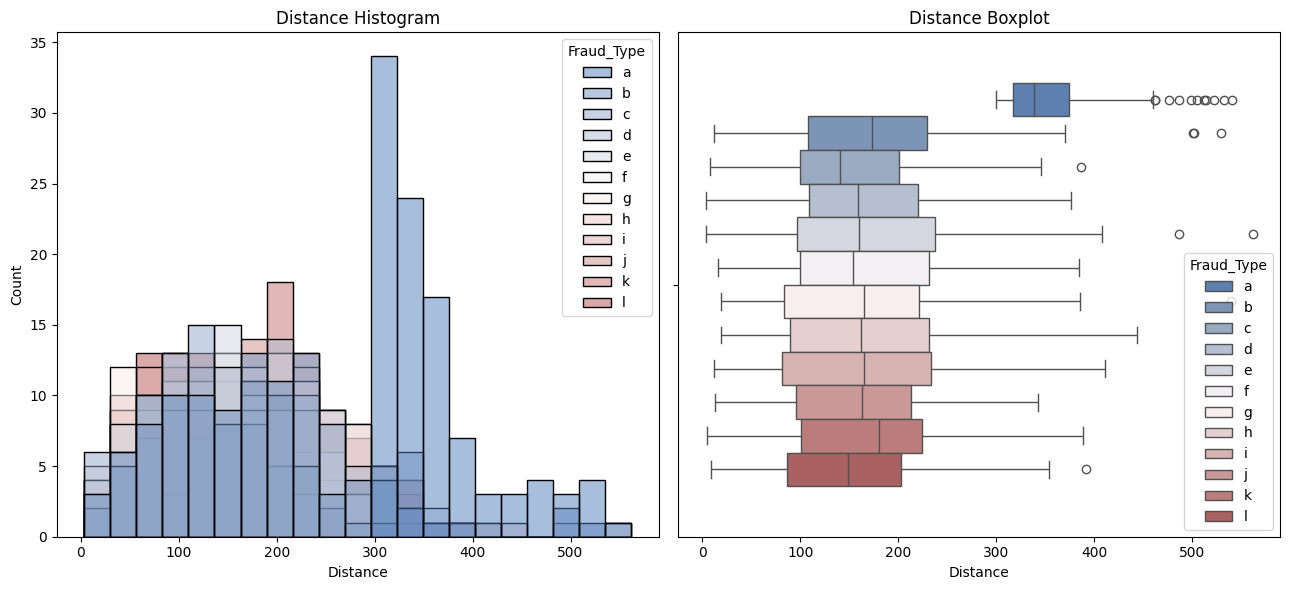

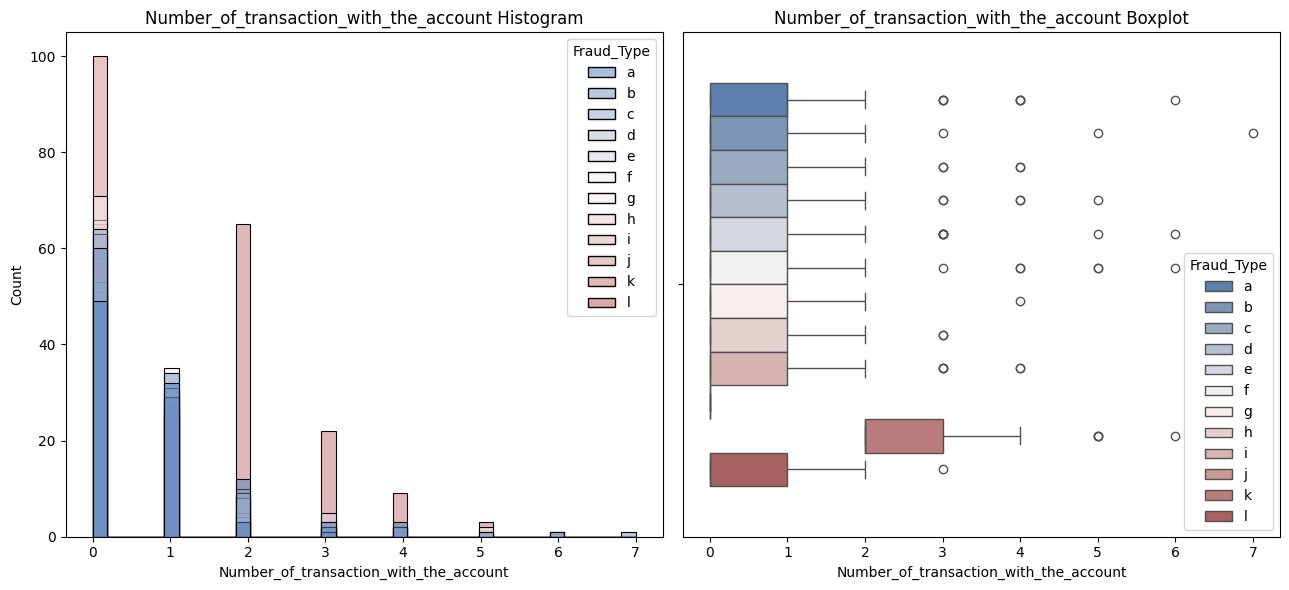

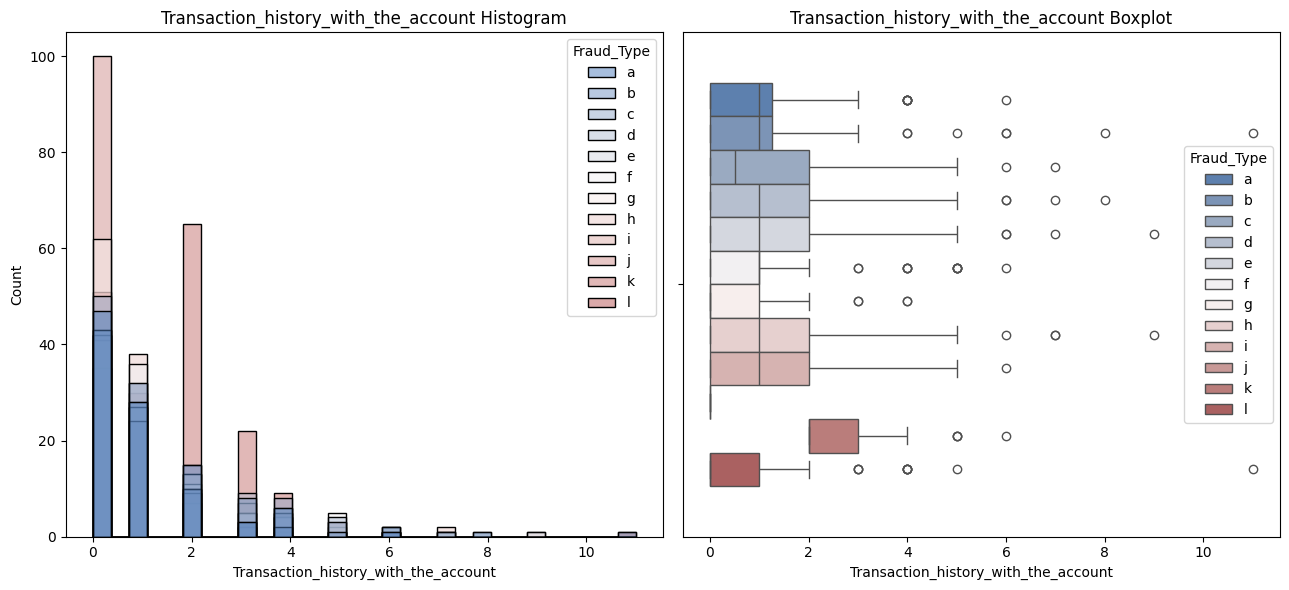

In [ ]:
for column, col_type in zip(cond_all['항목명'], cond_all['데이터 형태']):

    if col_type == '수치형' and column != 'Time_difference':

       fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

       sns.histplot(data=train_all_non_m,
                    x=column,
                    hue='Fraud_Type',
                    palette='vlag',
                    hue_order=hue_order,
                    ax=ax[0])
       ax[0].set_title(f'{column} Histogram')

       sns.boxplot(data=train_all_non_m,
                   x=column,
                   hue='Fraud_Type',
                   palette='vlag',
                    hue_order=hue_order,
                   ax=ax[1])
       ax[1].set_title(f'{column} Boxplot')

       plt.tight_layout()
       plt.show()